# Prédiction sur le dépôt à terme des clients d'une banque
### Introduction

Dans cette notebook nous allons faire la prédiction concernant la solvabilité des clients d'une banque.
Sur ce nous allons suivre les étapes suivantes:
1.  Importation de données
2.  Analyse exploratoire
3.  Pretraitement
4.  evaluation du model
5.  Enregistrement du model pour le deploiement



### 1.  Importation de données

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as pn 
import plotly.express as pl 
import seaborn as sn
data = pd.read_csv(r"D:\fraude\donnees\bank.csv")

 ### 2.  Analyse exploratoire

In [2]:
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
def analyse(dataframe) :
    dataframe.info()
    print("----------------------------------------------------")
    dataframe.duplicated().value_counts()
    if (dataframe.duplicated==True) :
        data=data.drop_duplicated
    print("----------------------------------------------------")  
    da= dataframe.deposit.value_counts().reset_index()
    fig ,ax = plt.subplots()
    print("varaible cible default")
    dataframe.deposit.value_counts().plot.pie(autopct="%.0f%%")
    plt.show()
    print(dataframe.describe())

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
----------------------------------------------------
----------------------------------------------

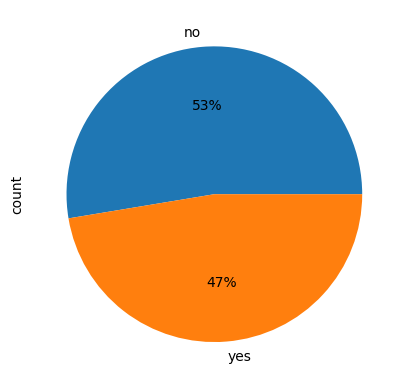

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [4]:
analyse(data)


In [5]:
nbr_col = data.shape[1] if data.shape[1]%2==0 else data.shape[1]//2+1

In [6]:
def analyse_univariee(dataframe):
    contour = dataframe.select_dtypes("object").shape[1] if dataframe.select_dtypes("object").shape[1]%2==0 else dataframe.select_dtypes("object").shape[1]//2+1
    plt.figure(figsize=(17,17)) 
    for i, col in enumerate(dataframe.select_dtypes("object")) :
      plt.subplot(contour,2,i+1) 
      xi =dataframe[col].value_counts()
      xi =xi.sort_values()  
      bar =sn.barplot(x=xi.index,y=xi.values)
      for p in bar.patches :
           bar.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points',c='red')
      plt.tight_layout()
      plt.xticks(rotation=45)
    print("------------------------------------")
    contours = dataframe.select_dtypes("int").shape[1] if dataframe.select_dtypes("int").shape[1]%2==0 else dataframe.select_dtypes("int").shape[1]//2+1
    plt.figure(figsize=(17,17)) 
    for i, col in enumerate(dataframe.select_dtypes("int")) :
      plt.subplot(contours,2,i+1) 
      sn.distplot(dataframe[col])
      
      plt.tight_layout()
      plt.xticks(rotation=45)
   

    

        
            
           


    

------------------------------------


C:\Users\laurediekabala\AppData\Local\Temp\ipykernel_12016\2379026739.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(dataframe[col])
c:\Users\laurediekabala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laurediekabala\AppData\Local\Temp\ipykernel_12016\2379026739.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either

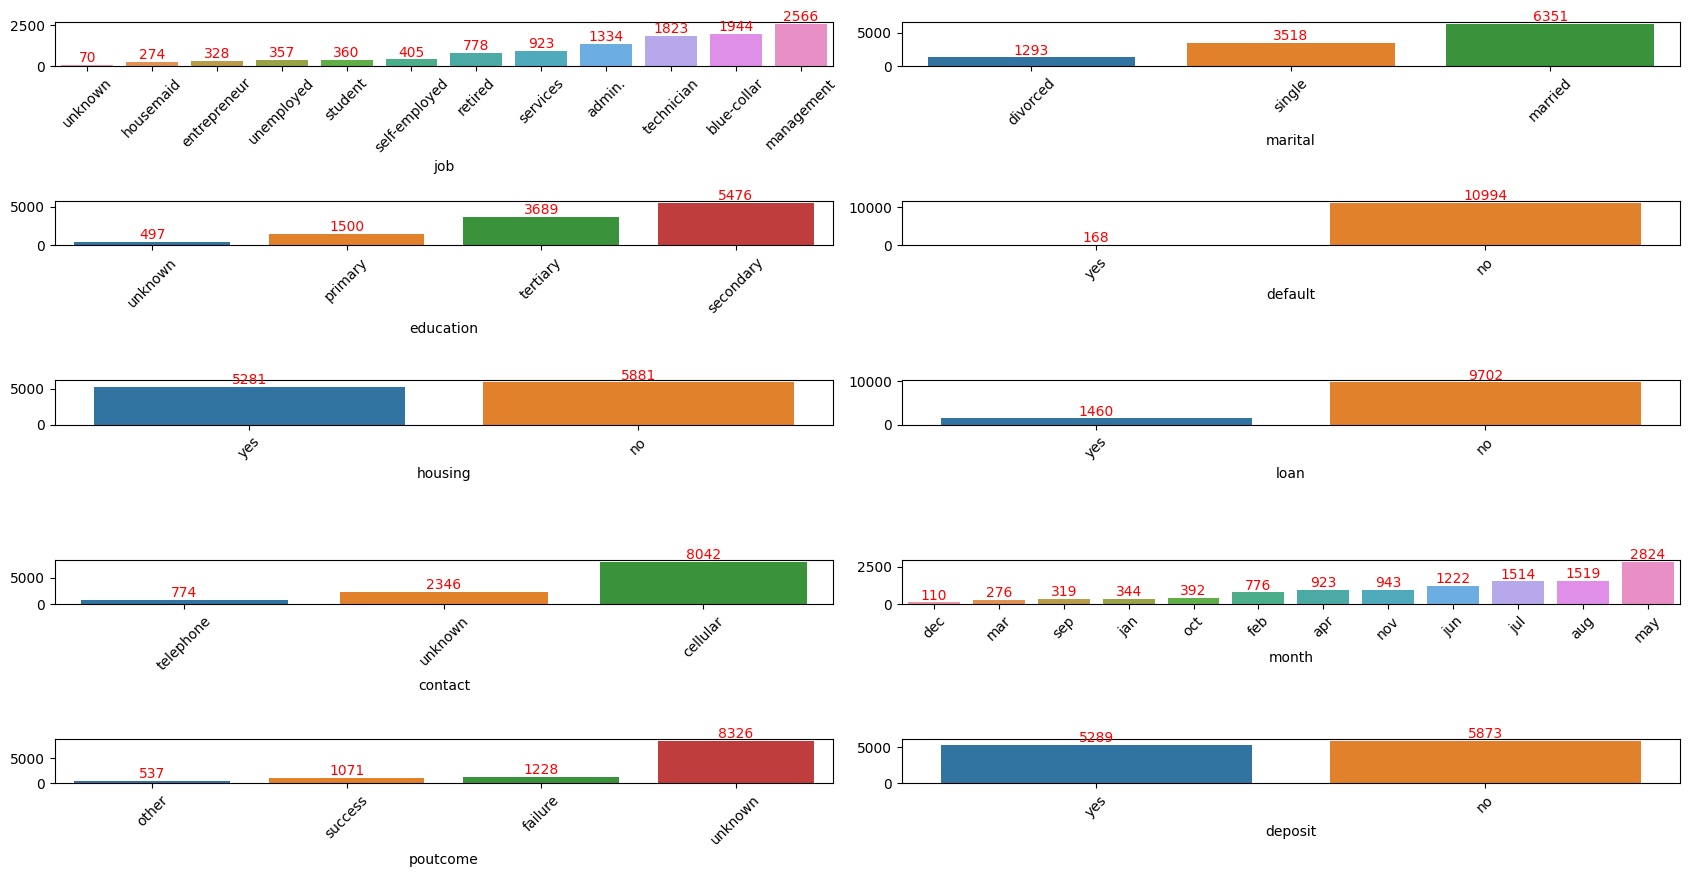

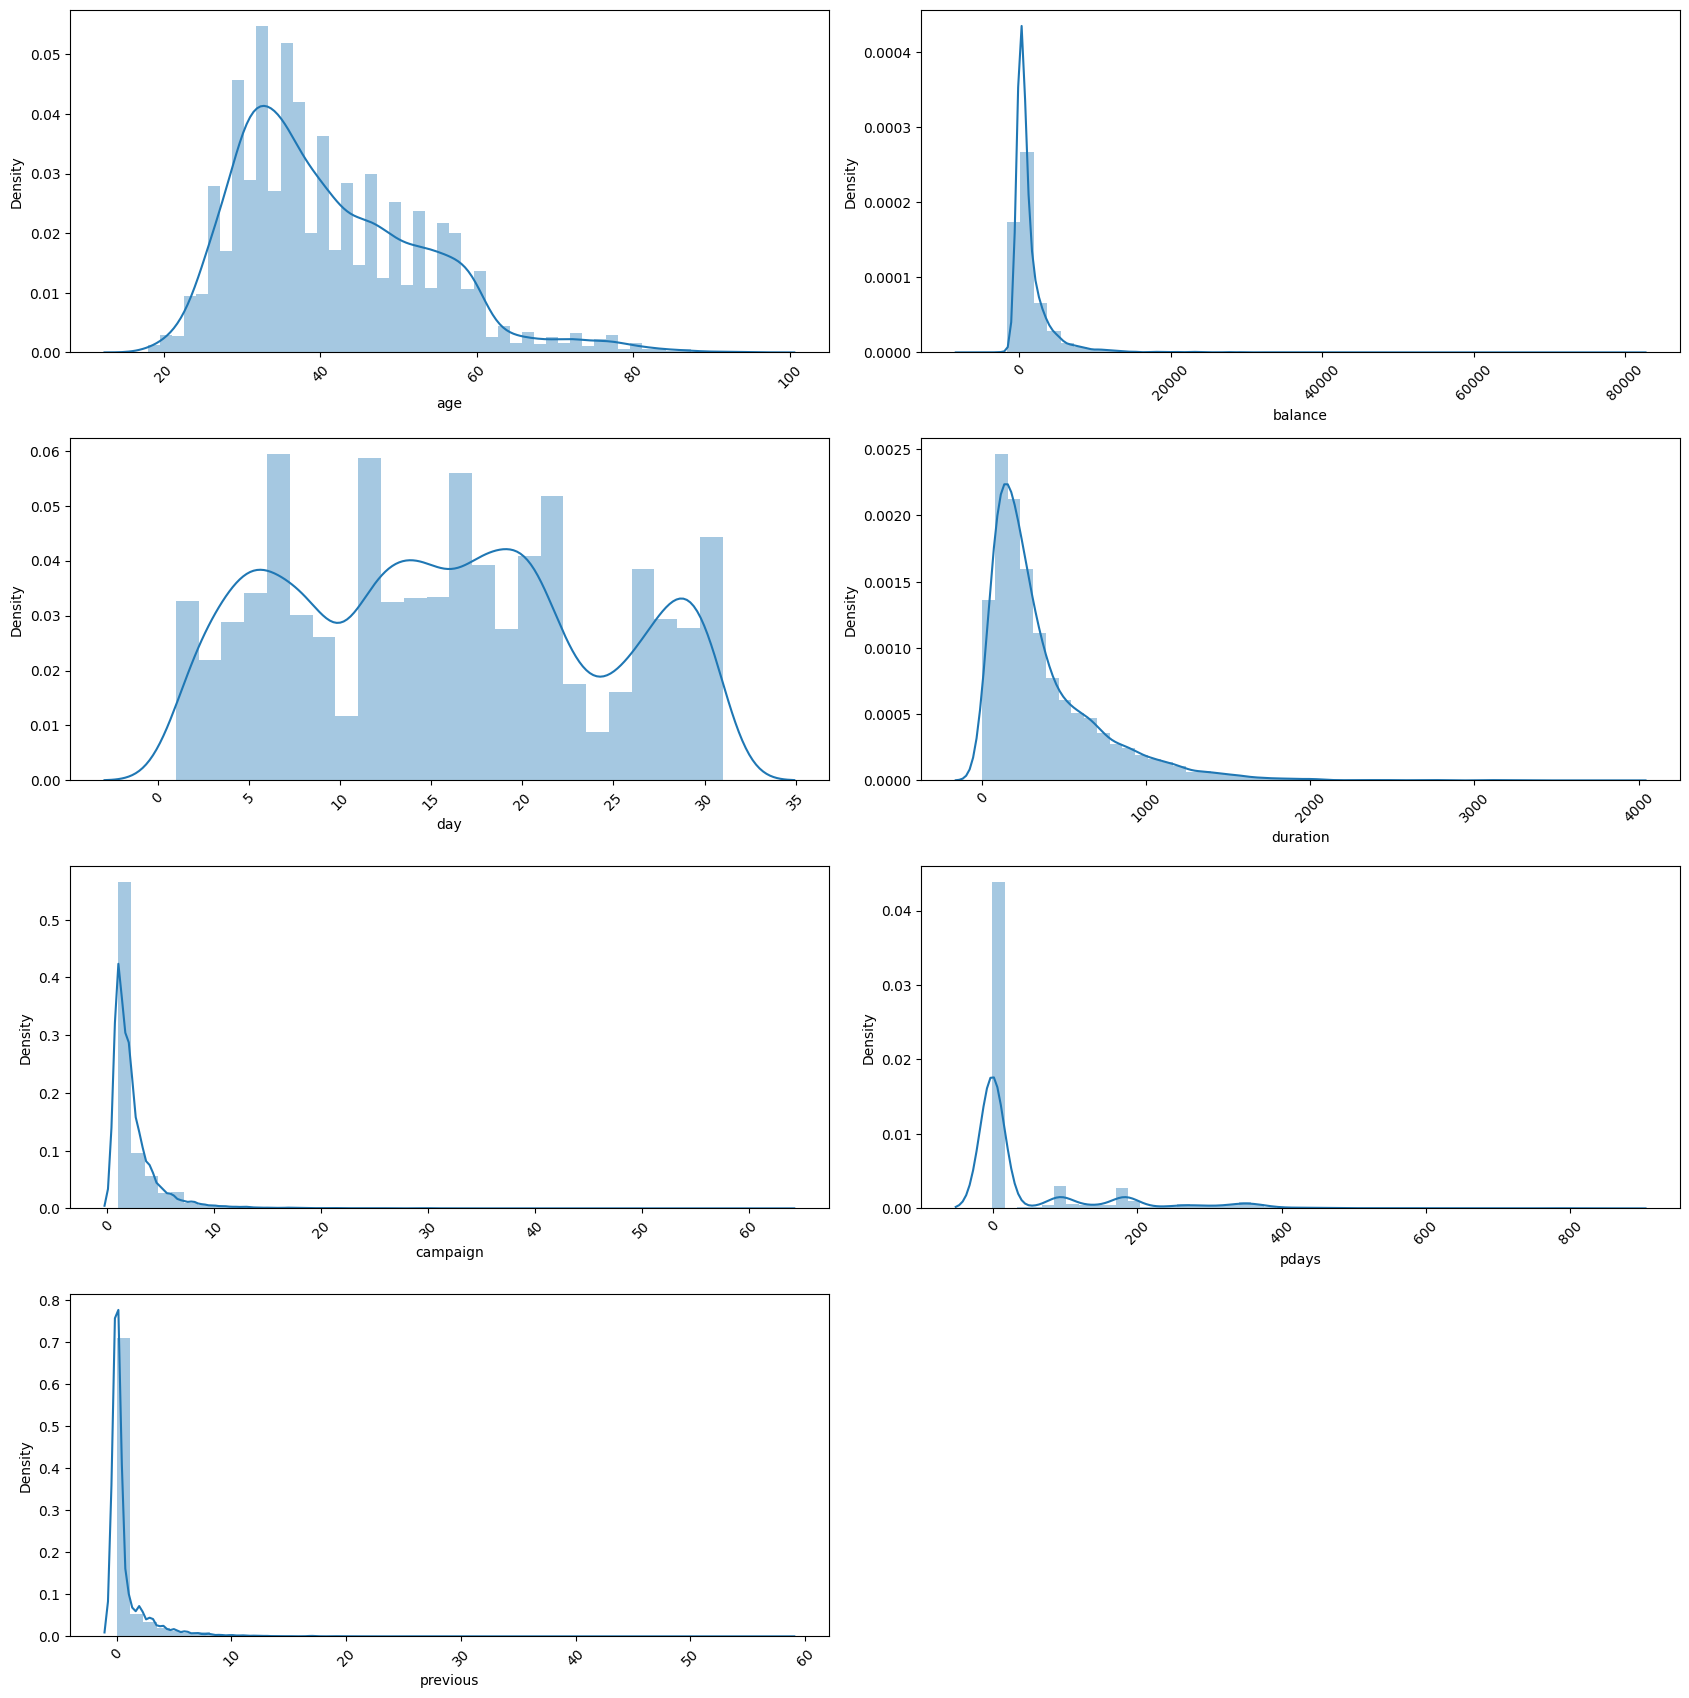

In [7]:
analyse_univariee(data)

In [8]:
def cat_cat(dataframe) :
    for i,col in enumerate(dataframe.select_dtypes("object")) :
          for j,co in enumerate(dataframe.select_dtypes("object")) :
               if (col in dataframe.select_dtypes("object").columns[-5:].tolist())&(co in dataframe.select_dtypes("object").columns[:5].tolist()) :
                 
                 pd.crosstab(dataframe[col],dataframe[co]).plot.bar()
    plt.show()
                           
               
    

c:\Users\laurediekabala\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


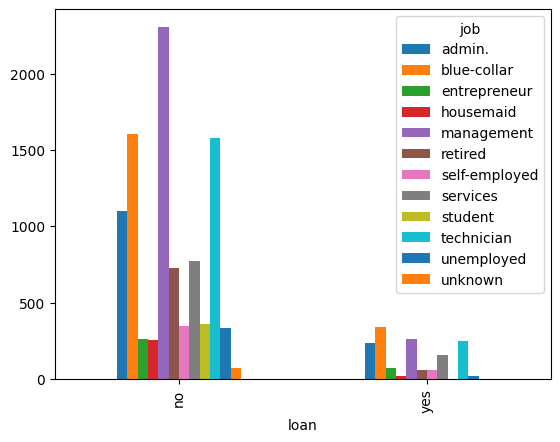

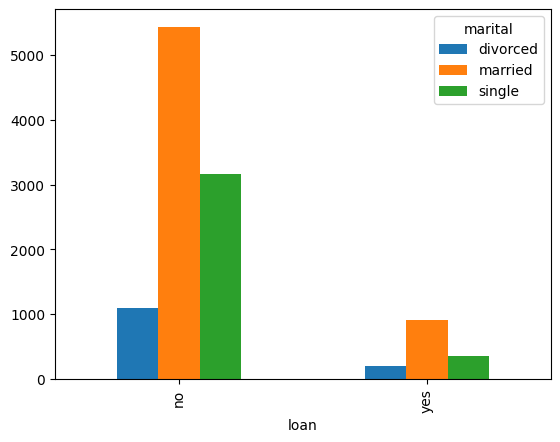

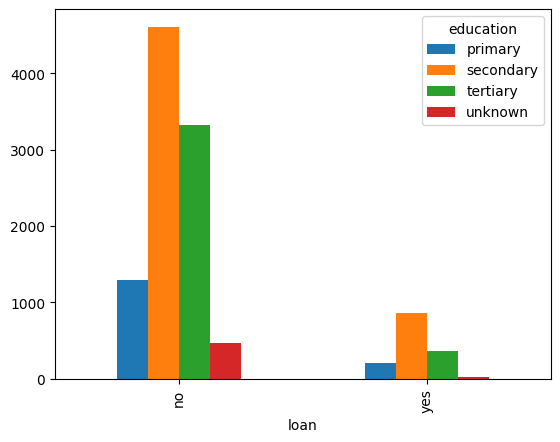

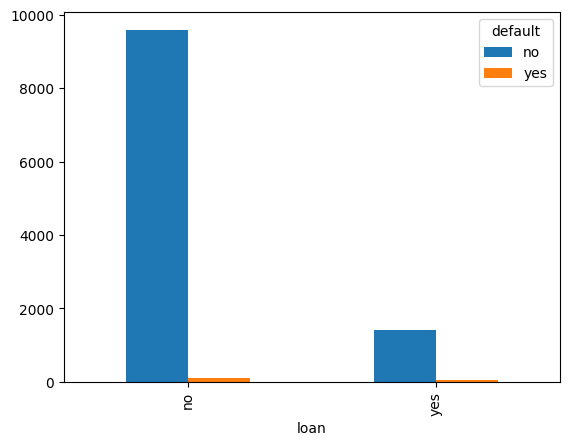

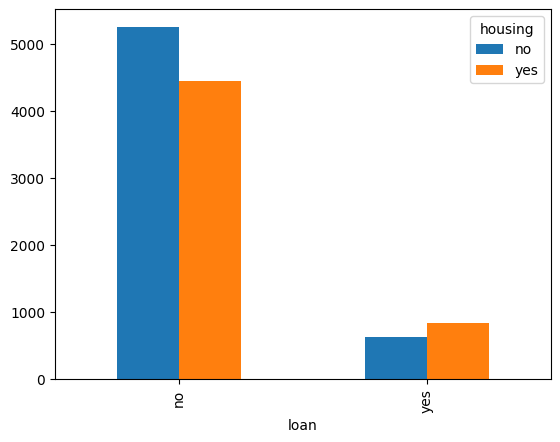

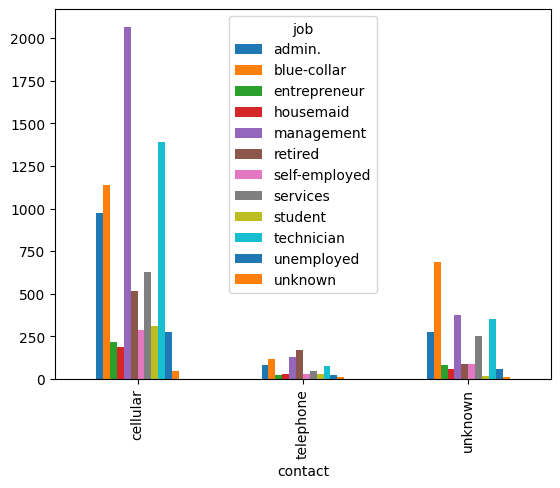

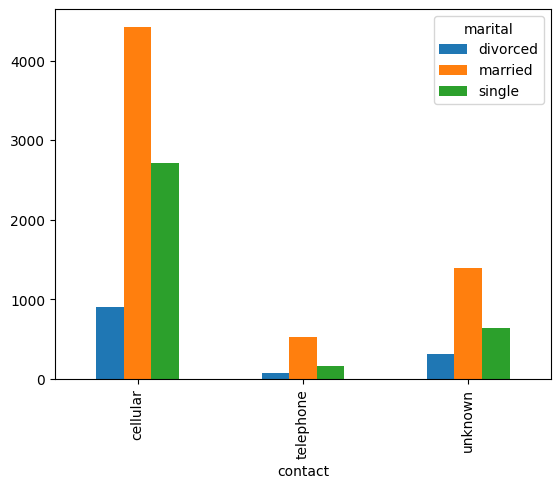

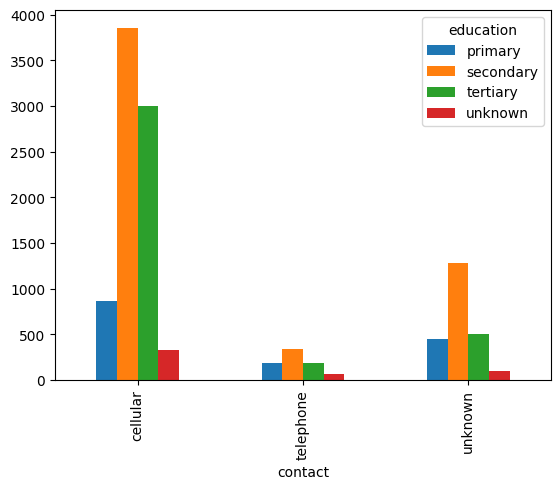

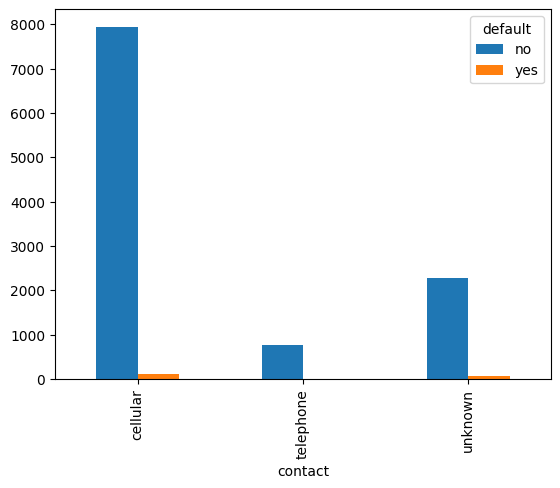

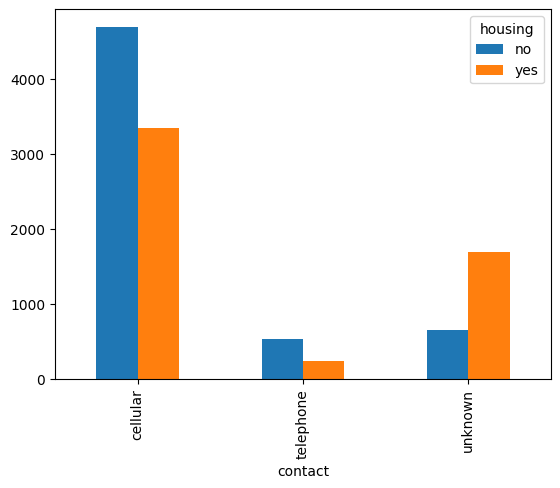

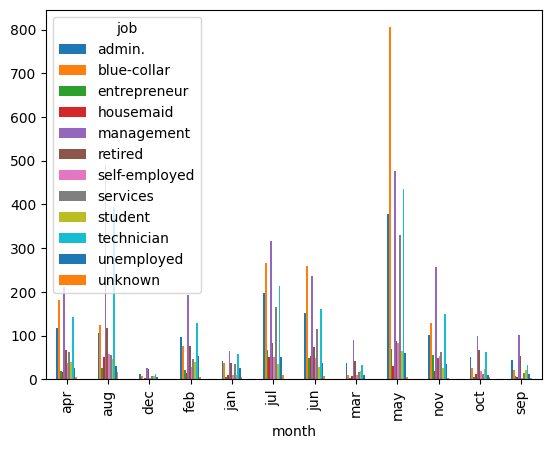

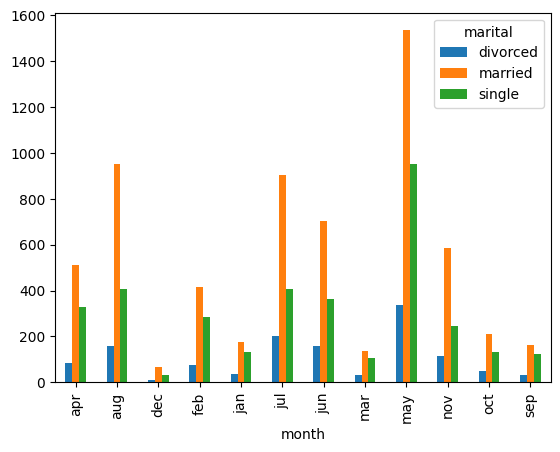

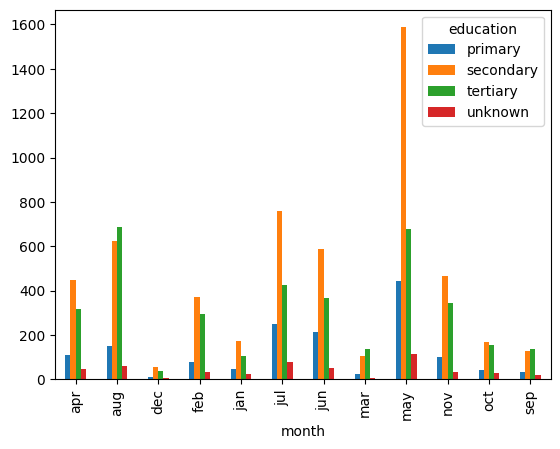

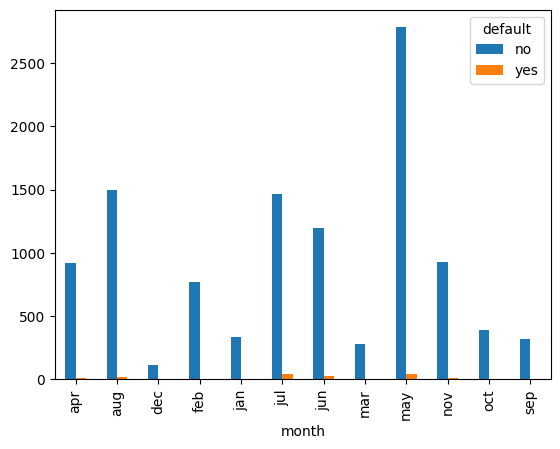

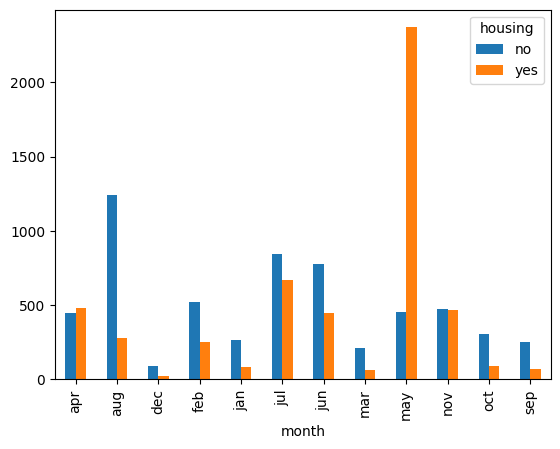

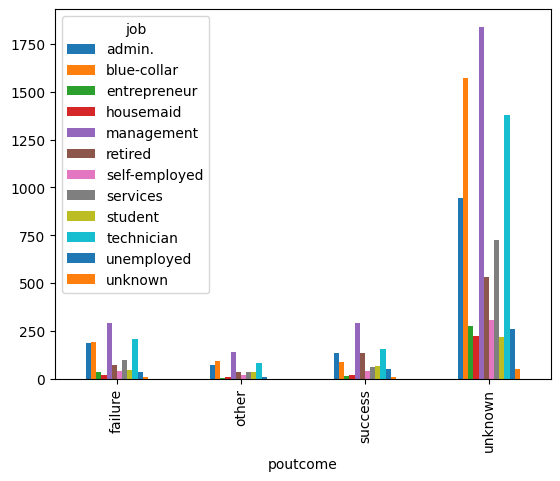

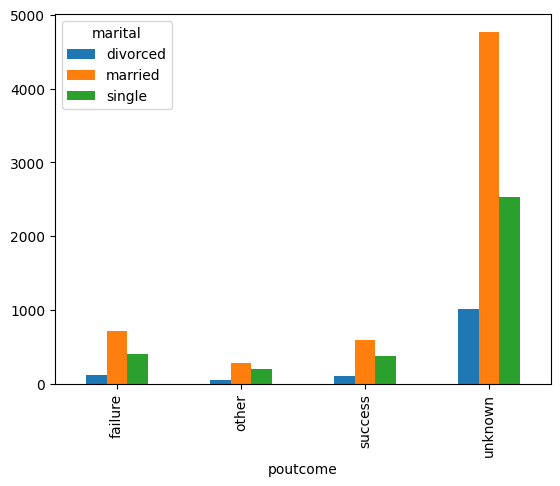

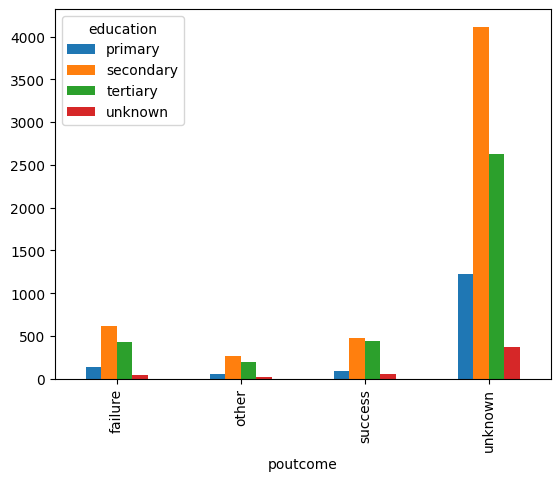

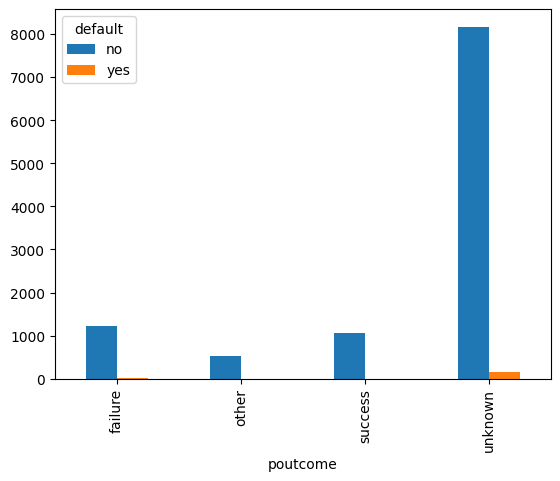

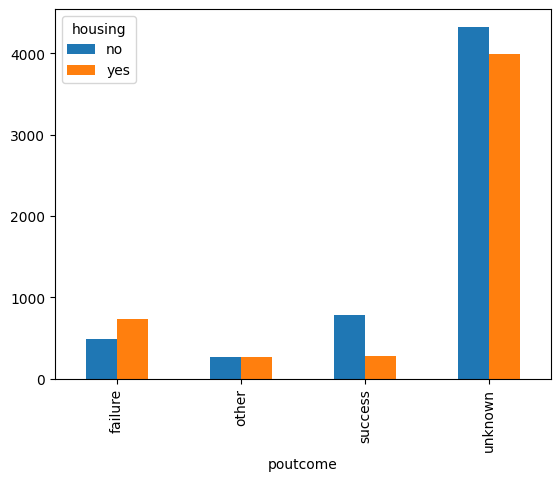

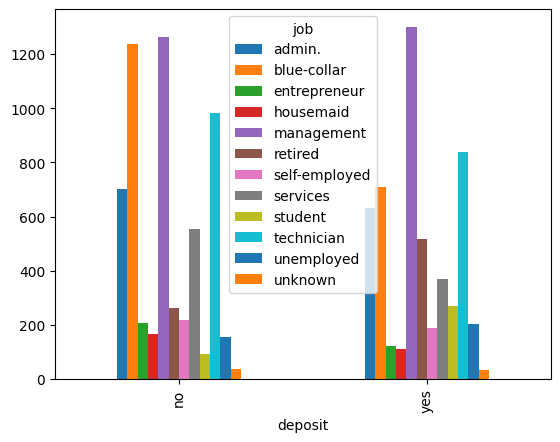

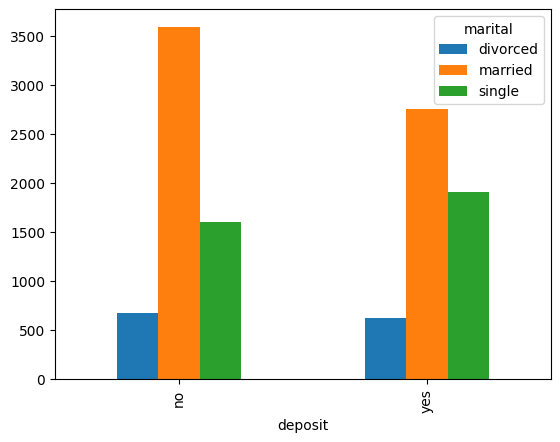

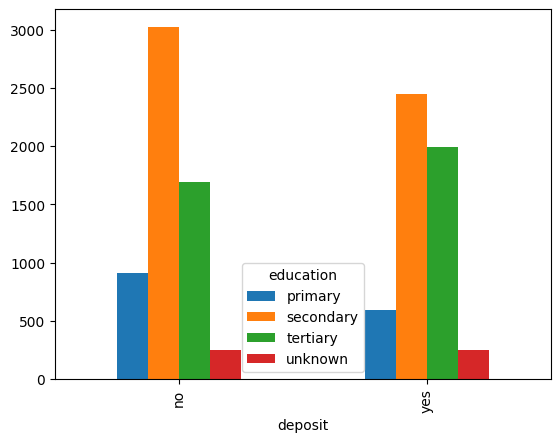

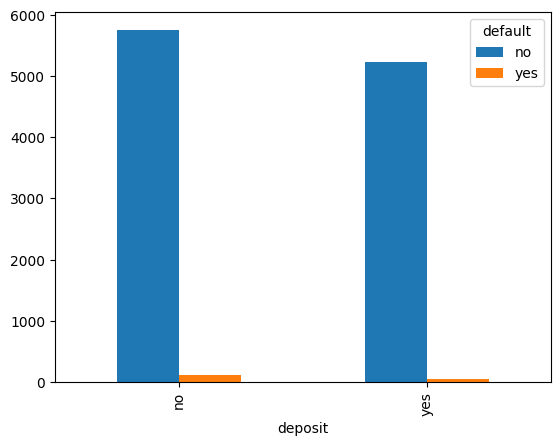

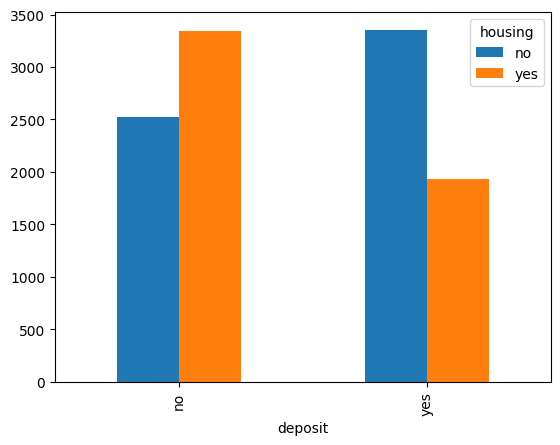

In [9]:
cat_cat(data)

In [10]:
def cible_cat(dataframe) :
    contour = dataframe.select_dtypes("object").shape[1] if dataframe.select_dtypes("object").shape[1]%2==0 else dataframe.select_dtypes("object").shape[1]//2+1
    plt.figure(figsize=(19,19)) 
    for i, col in enumerate(dataframe.select_dtypes("object")) :
      plt.subplot(contour,2,i+1) 
      xi =data.groupby("deposit")[col].value_counts().reset_index()
      xi =xi.sort_values(by="count")  
      bar =sn.barplot(xi,x=col,y="count",hue="deposit")
      for p in bar.patches :
           bar.annotate(format(p.get_height(),'.0f'),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points',c='red')
      plt.tight_layout()
      plt.xticks(rotation=45)
      plt.legend(loc="center")
    

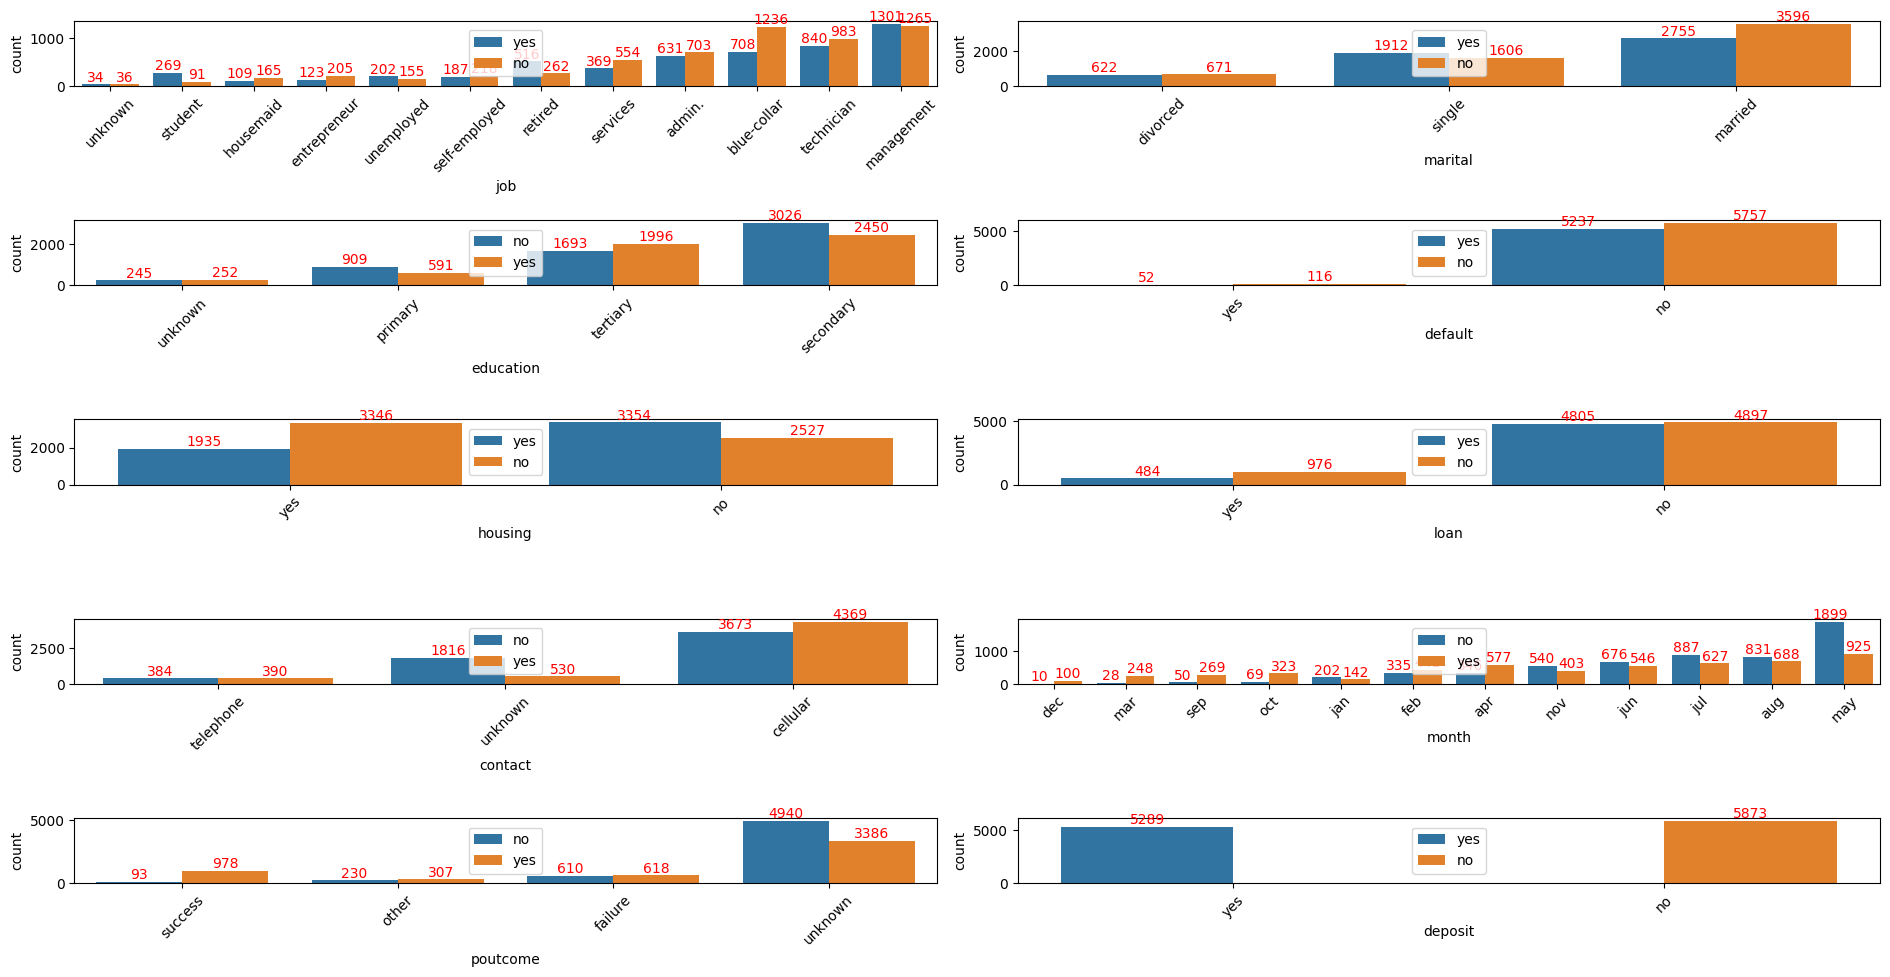

In [11]:
cible_cat(data)

In [12]:
def int_int(dataframe) :
    contour = dataframe.select_dtypes("int").shape[1] if dataframe.select_dtypes("int").shape[1]%2==0 else dataframe.select_dtypes("int").shape[1]//2+1

    for i, col in enumerate(dataframe.select_dtypes("int")) :
        for j, co in enumerate(dataframe.select_dtypes("int")) :
            if (col in dataframe.select_dtypes("int").columns[-3:].tolist())&(co in dataframe.select_dtypes("int").columns[:4].tolist()) :
                plt.figure(figsize=(19,19))
                sn.regplot(x=dataframe[col],y=dataframe[co])
           
    plt.xticks(rotation=45)
   
    

In [13]:
# verification des valeurs extreme
def extreme(dataframe) :
    for col in dataframe.select_dtypes("int") :
          plt.figure()
          sn.boxplot(data[col]) 
          plt.title(col) 

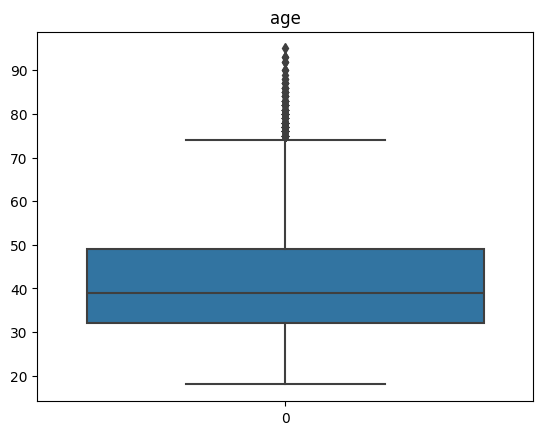

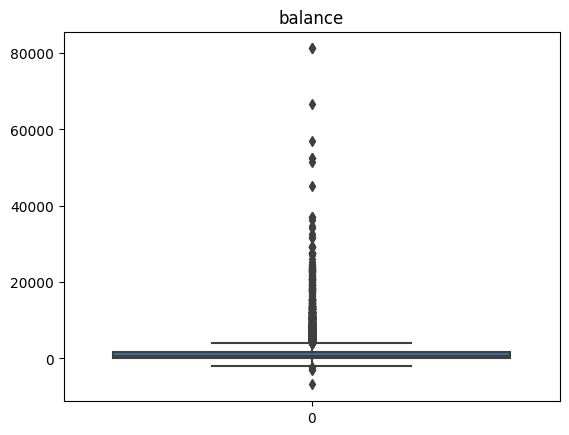

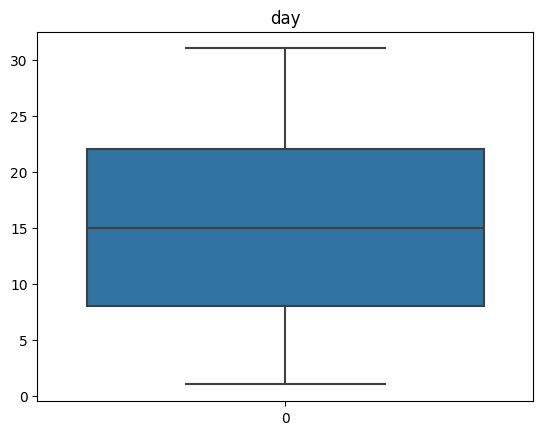

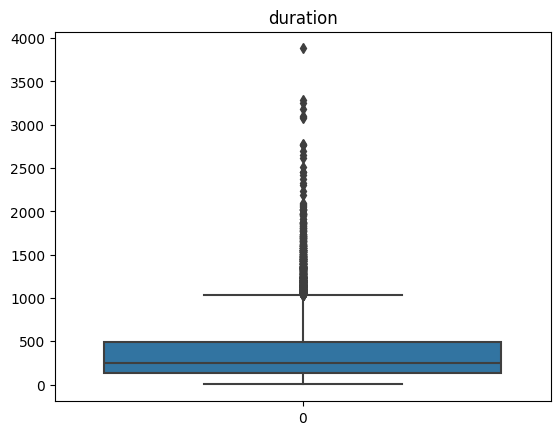

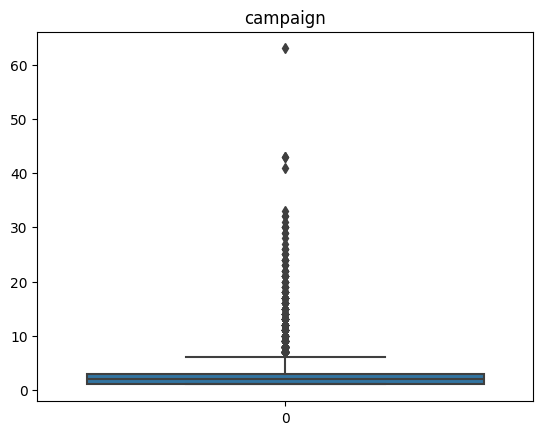

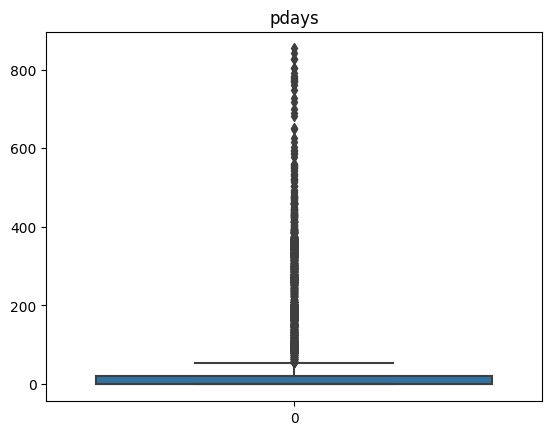

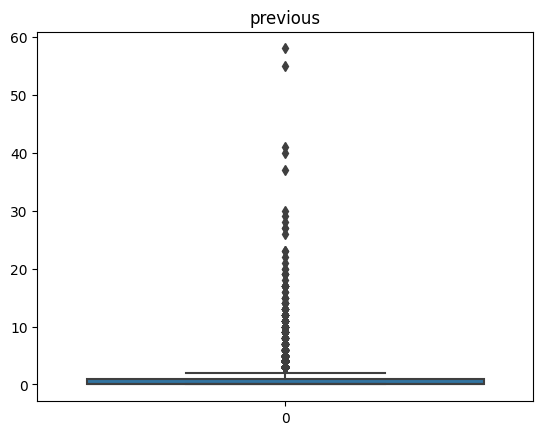

In [14]:
extreme(data)

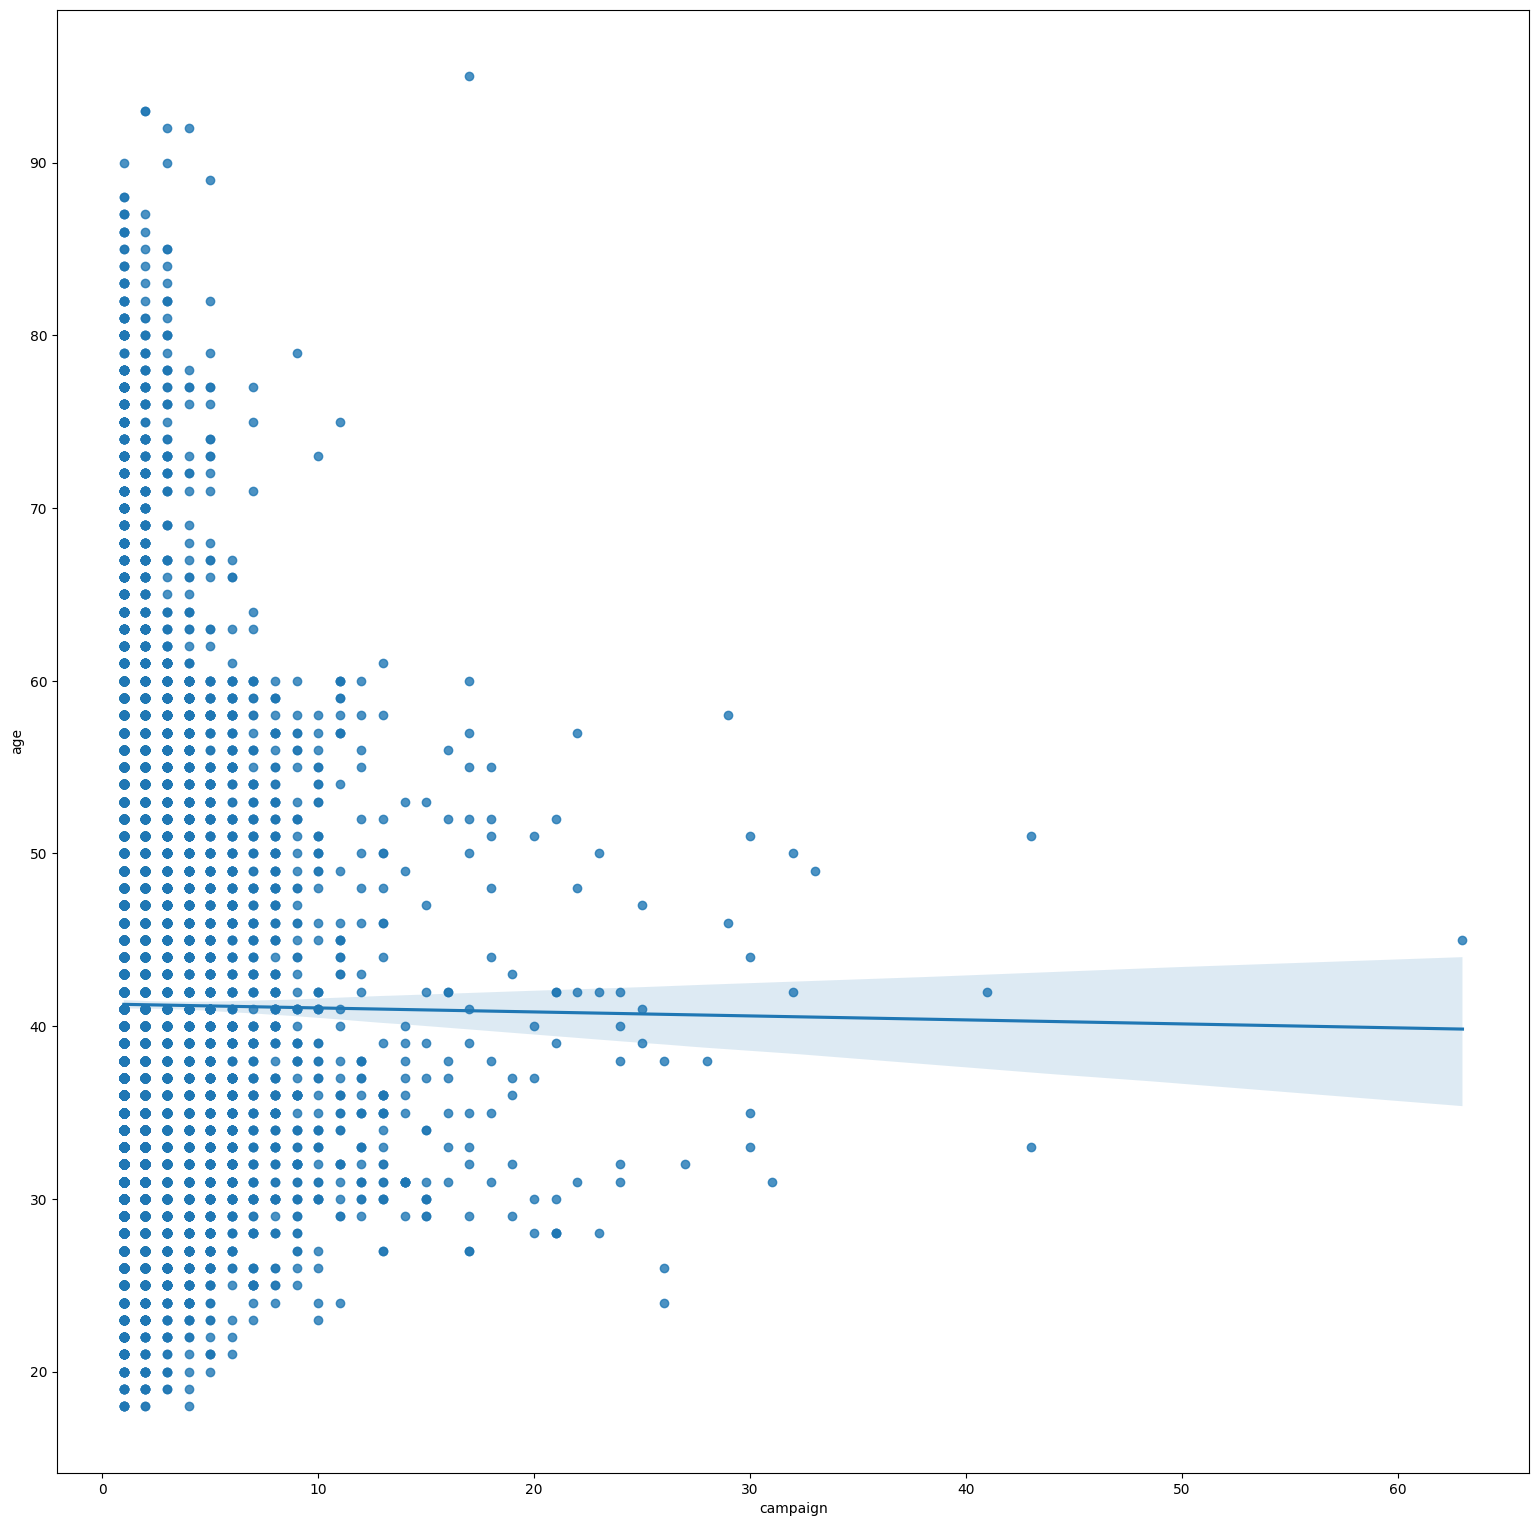

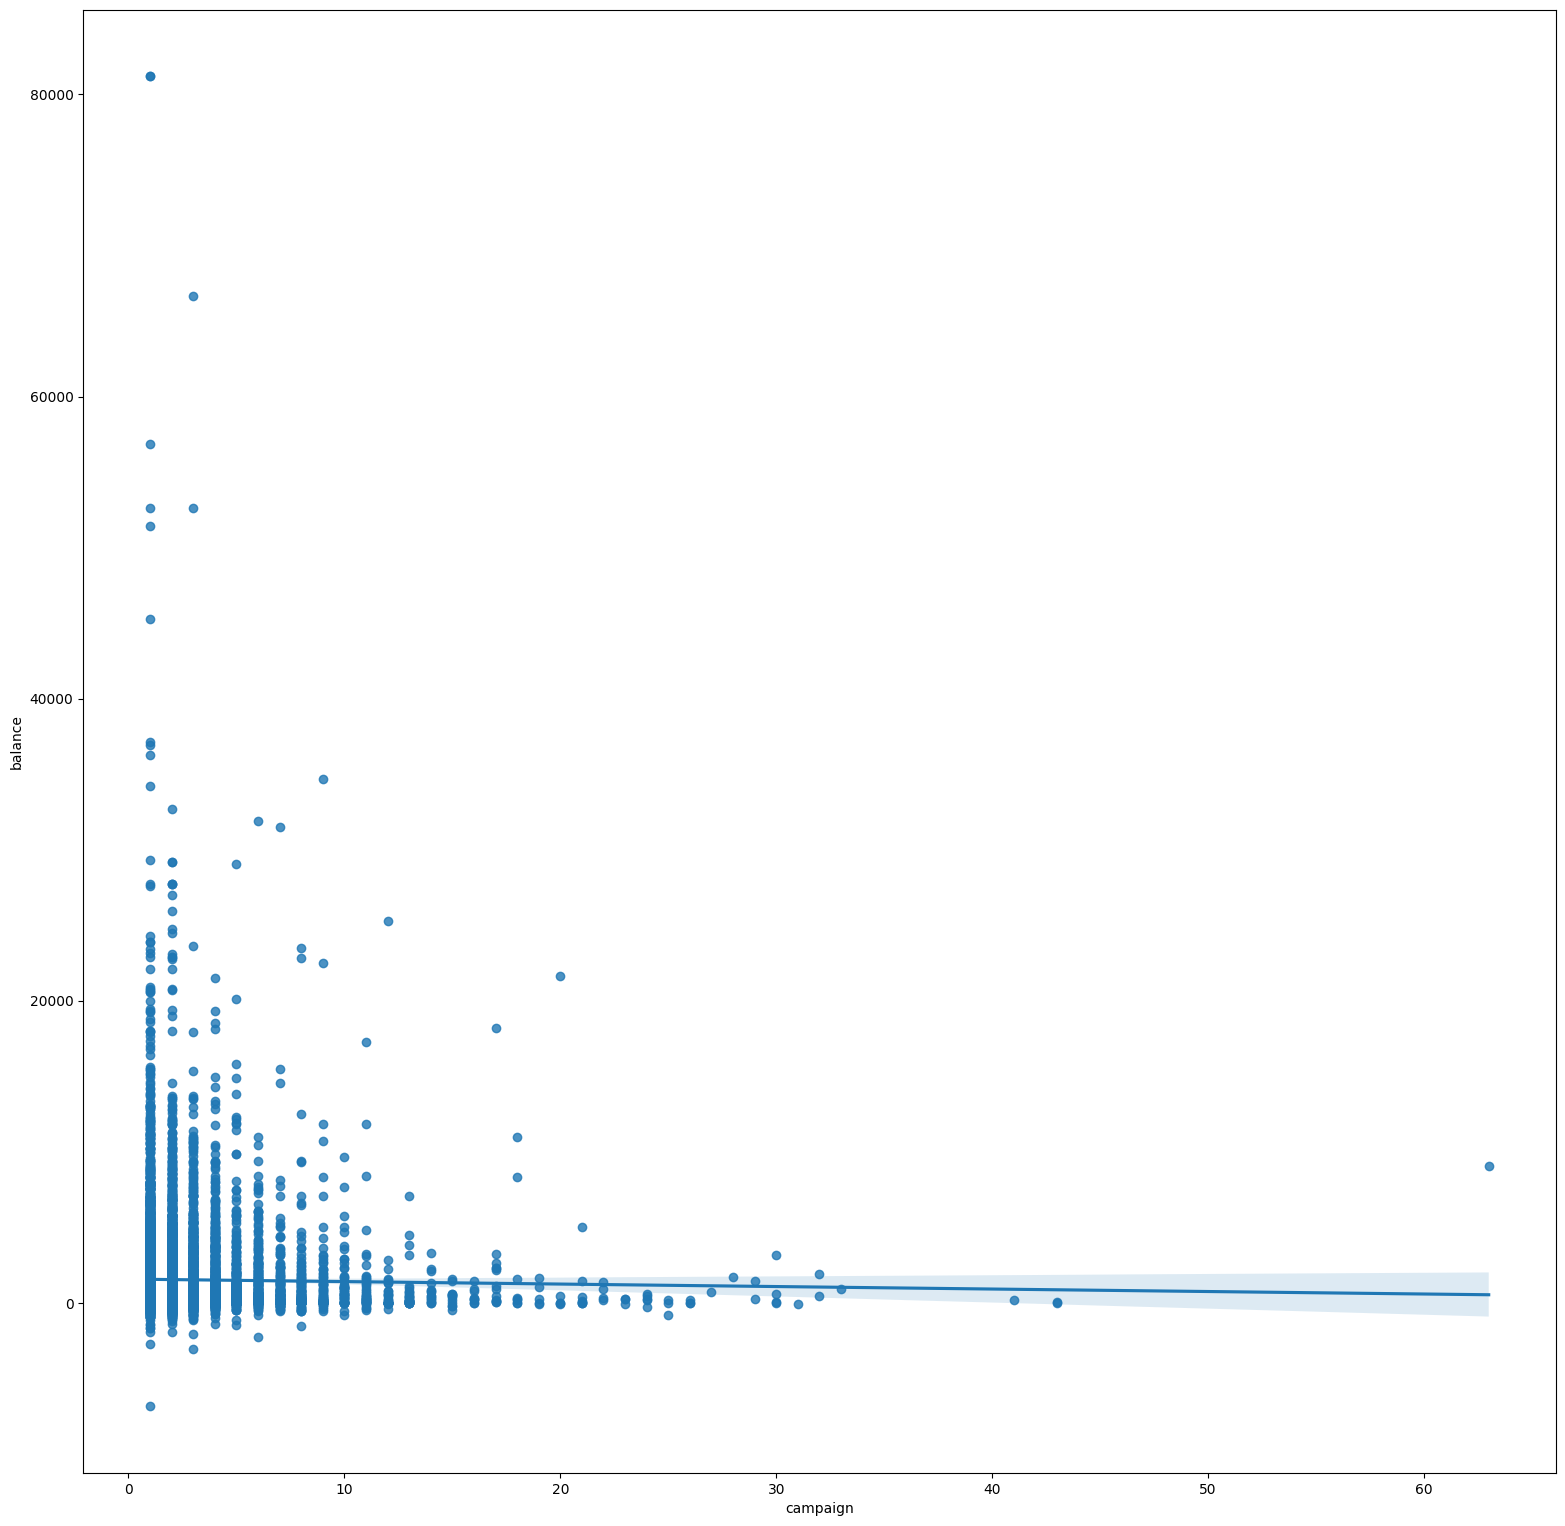

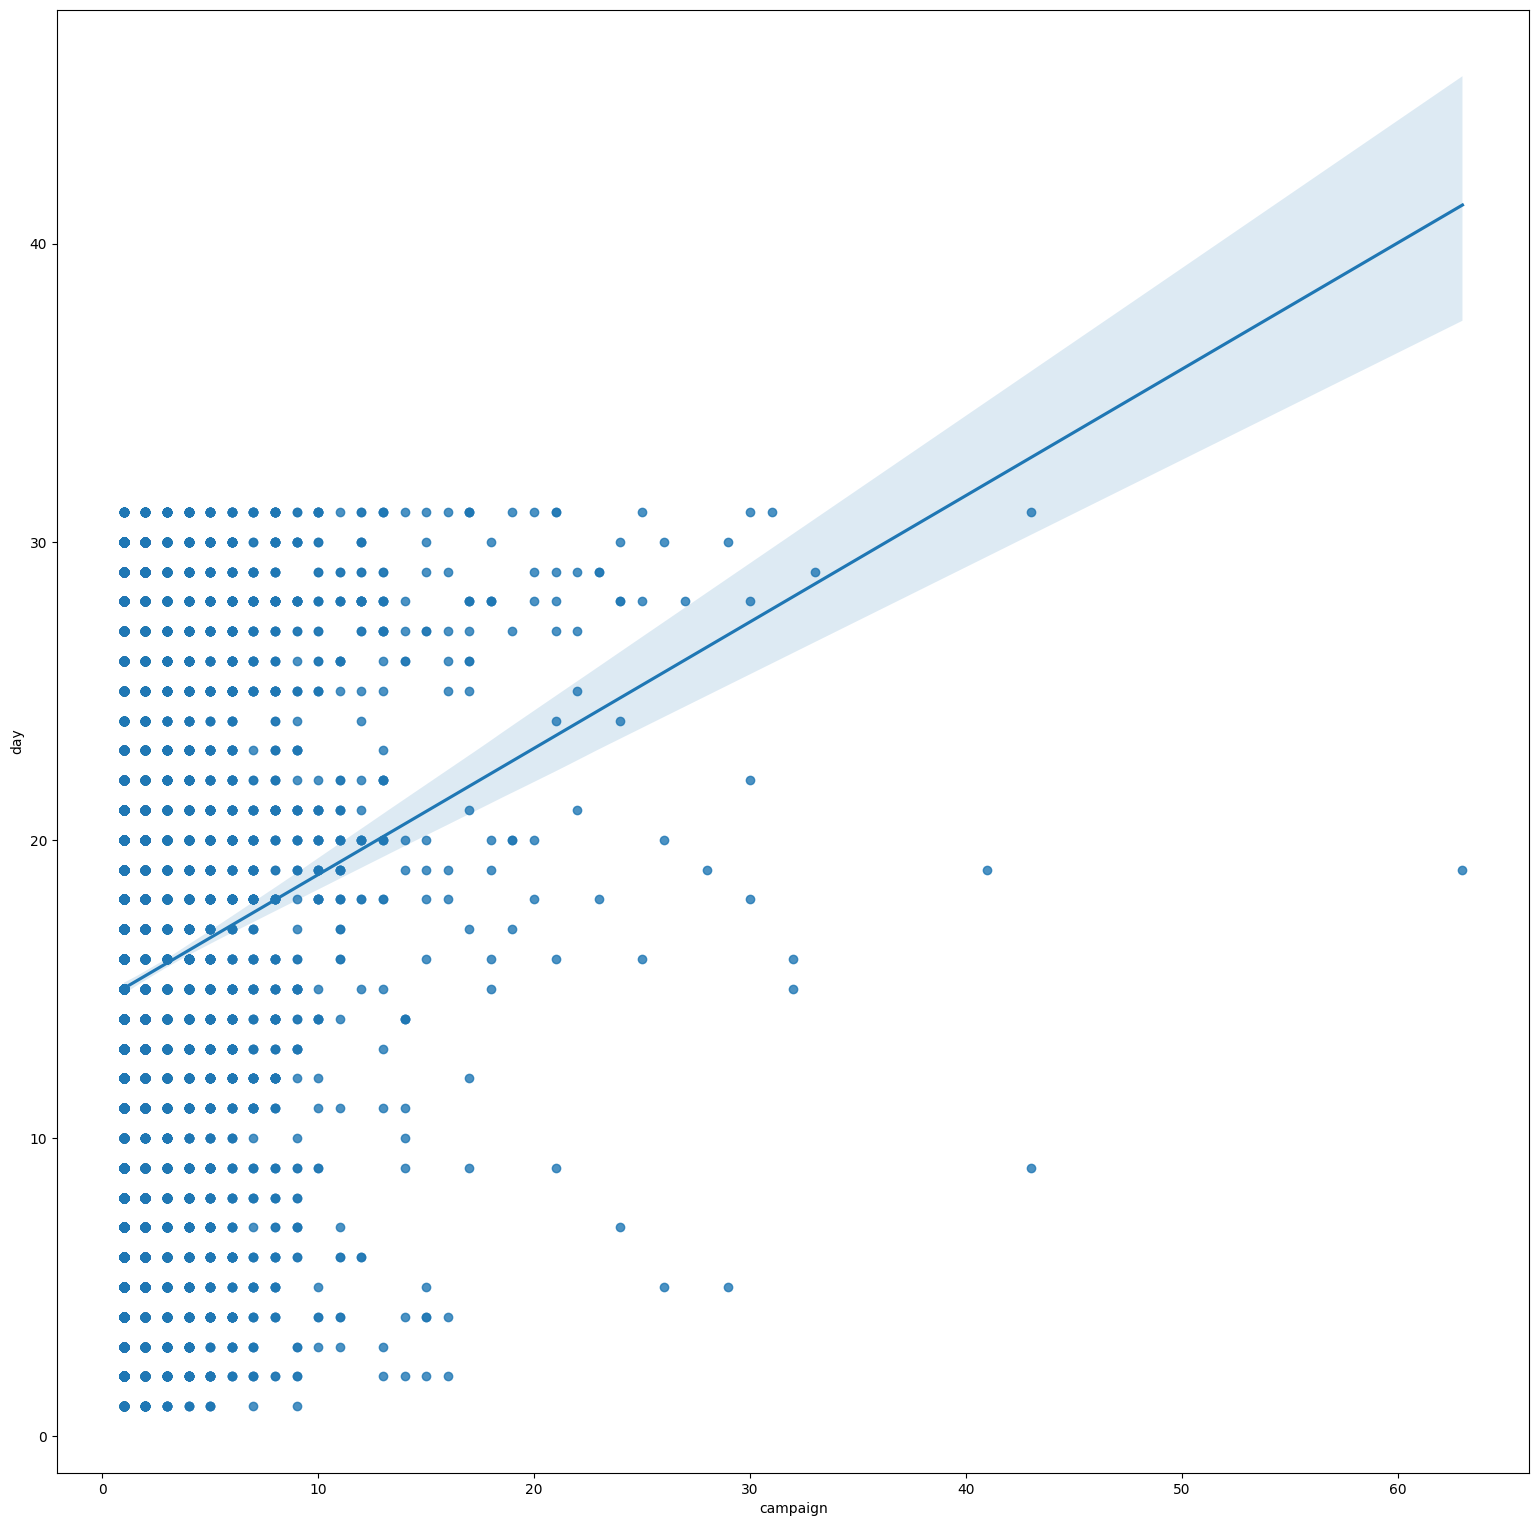

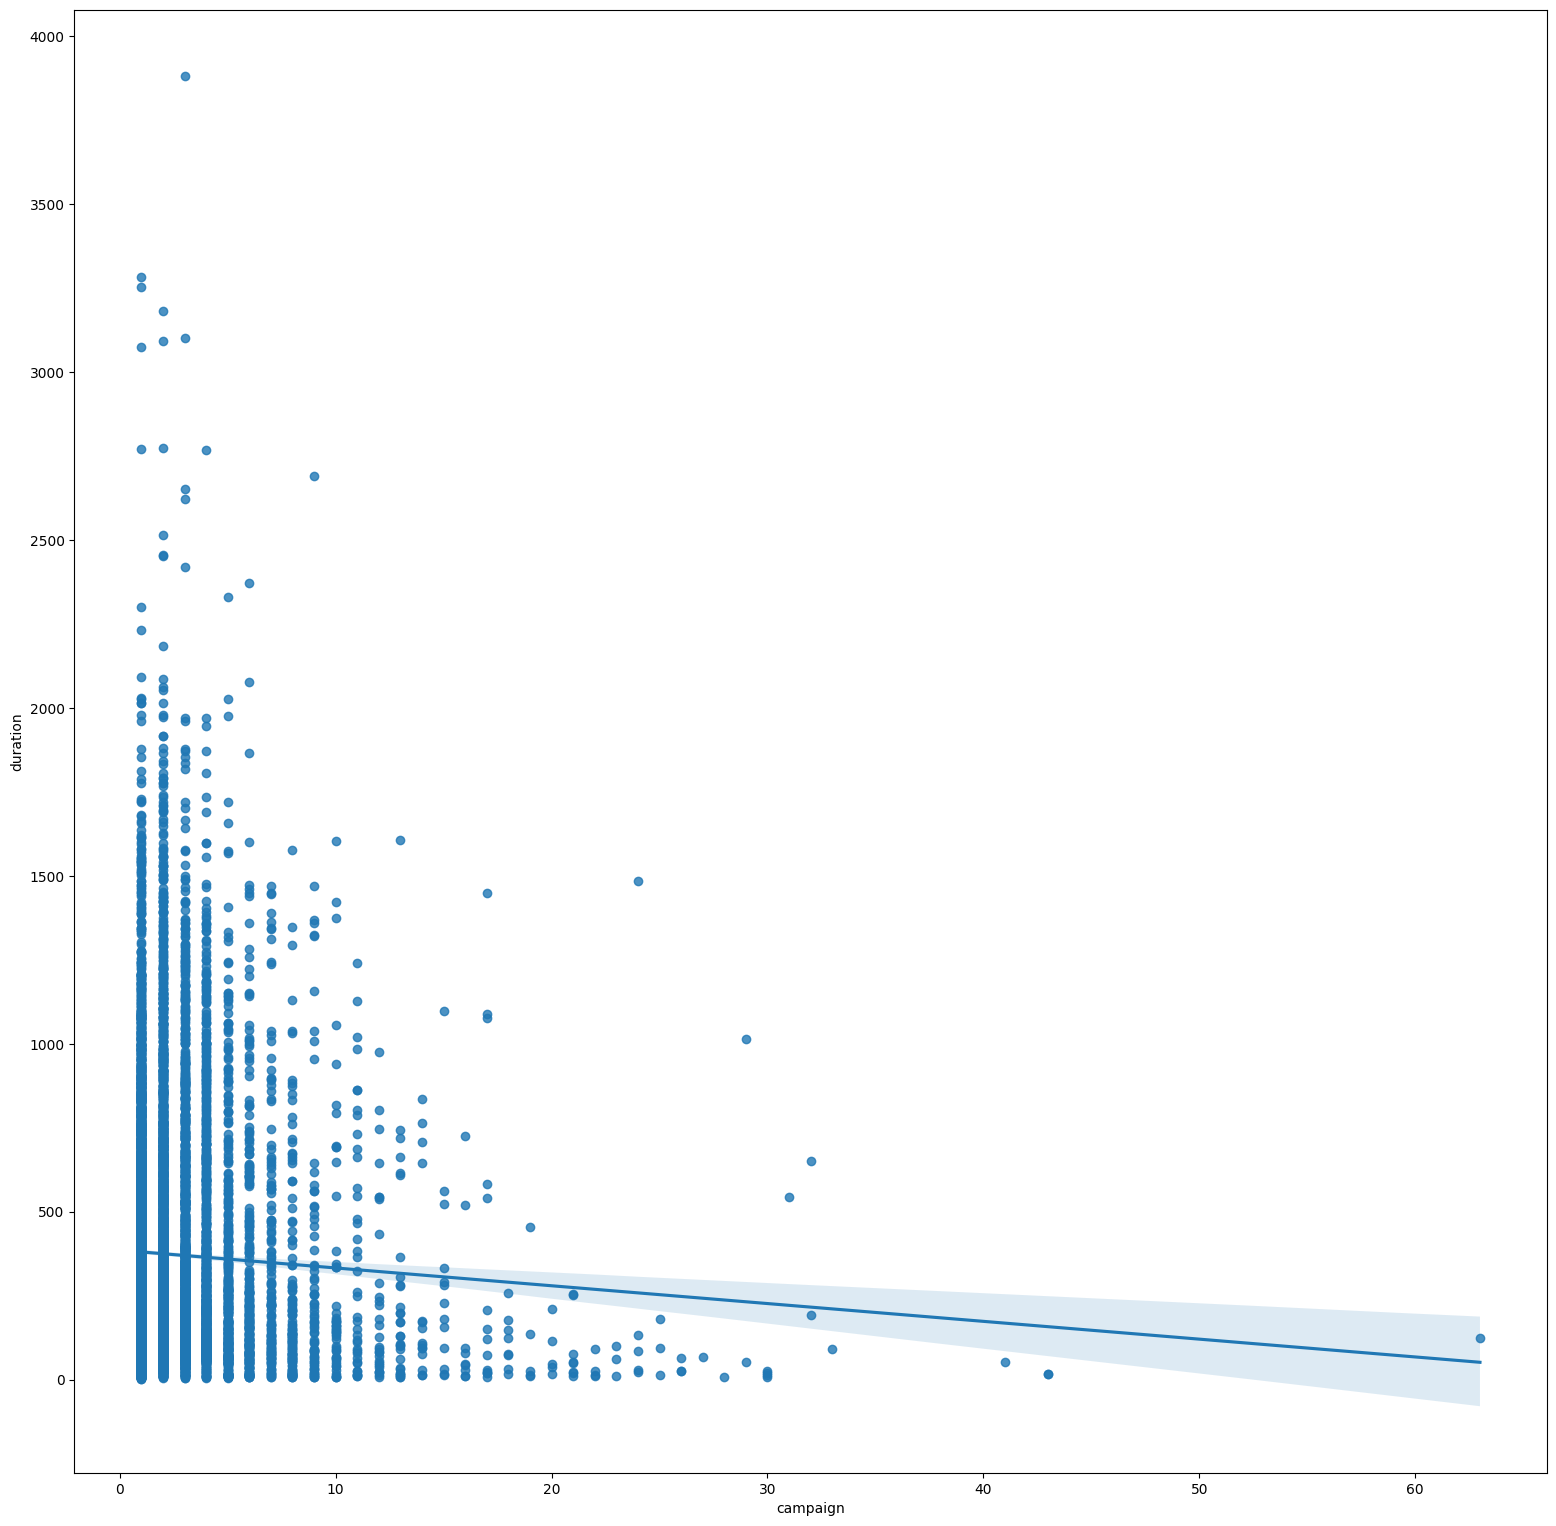

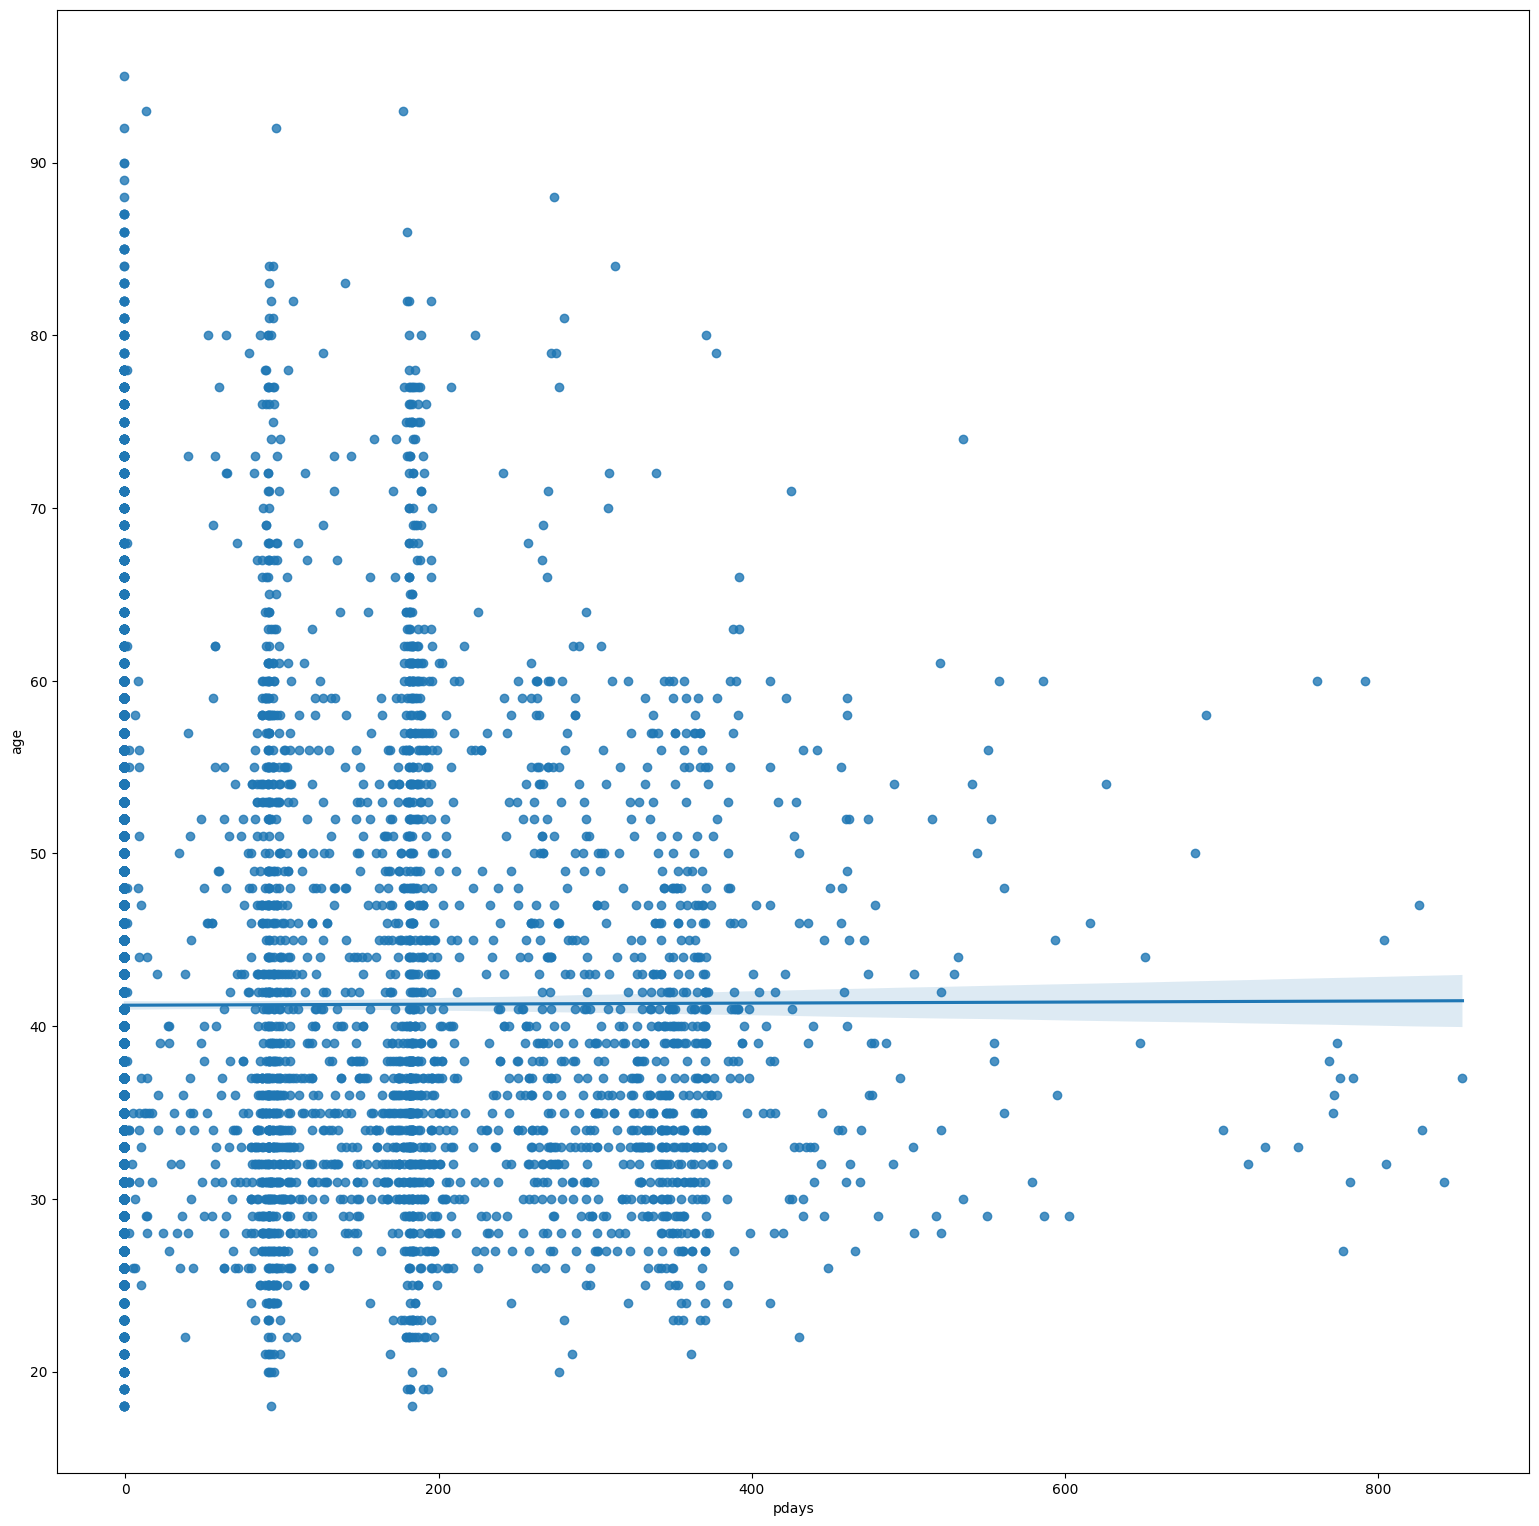

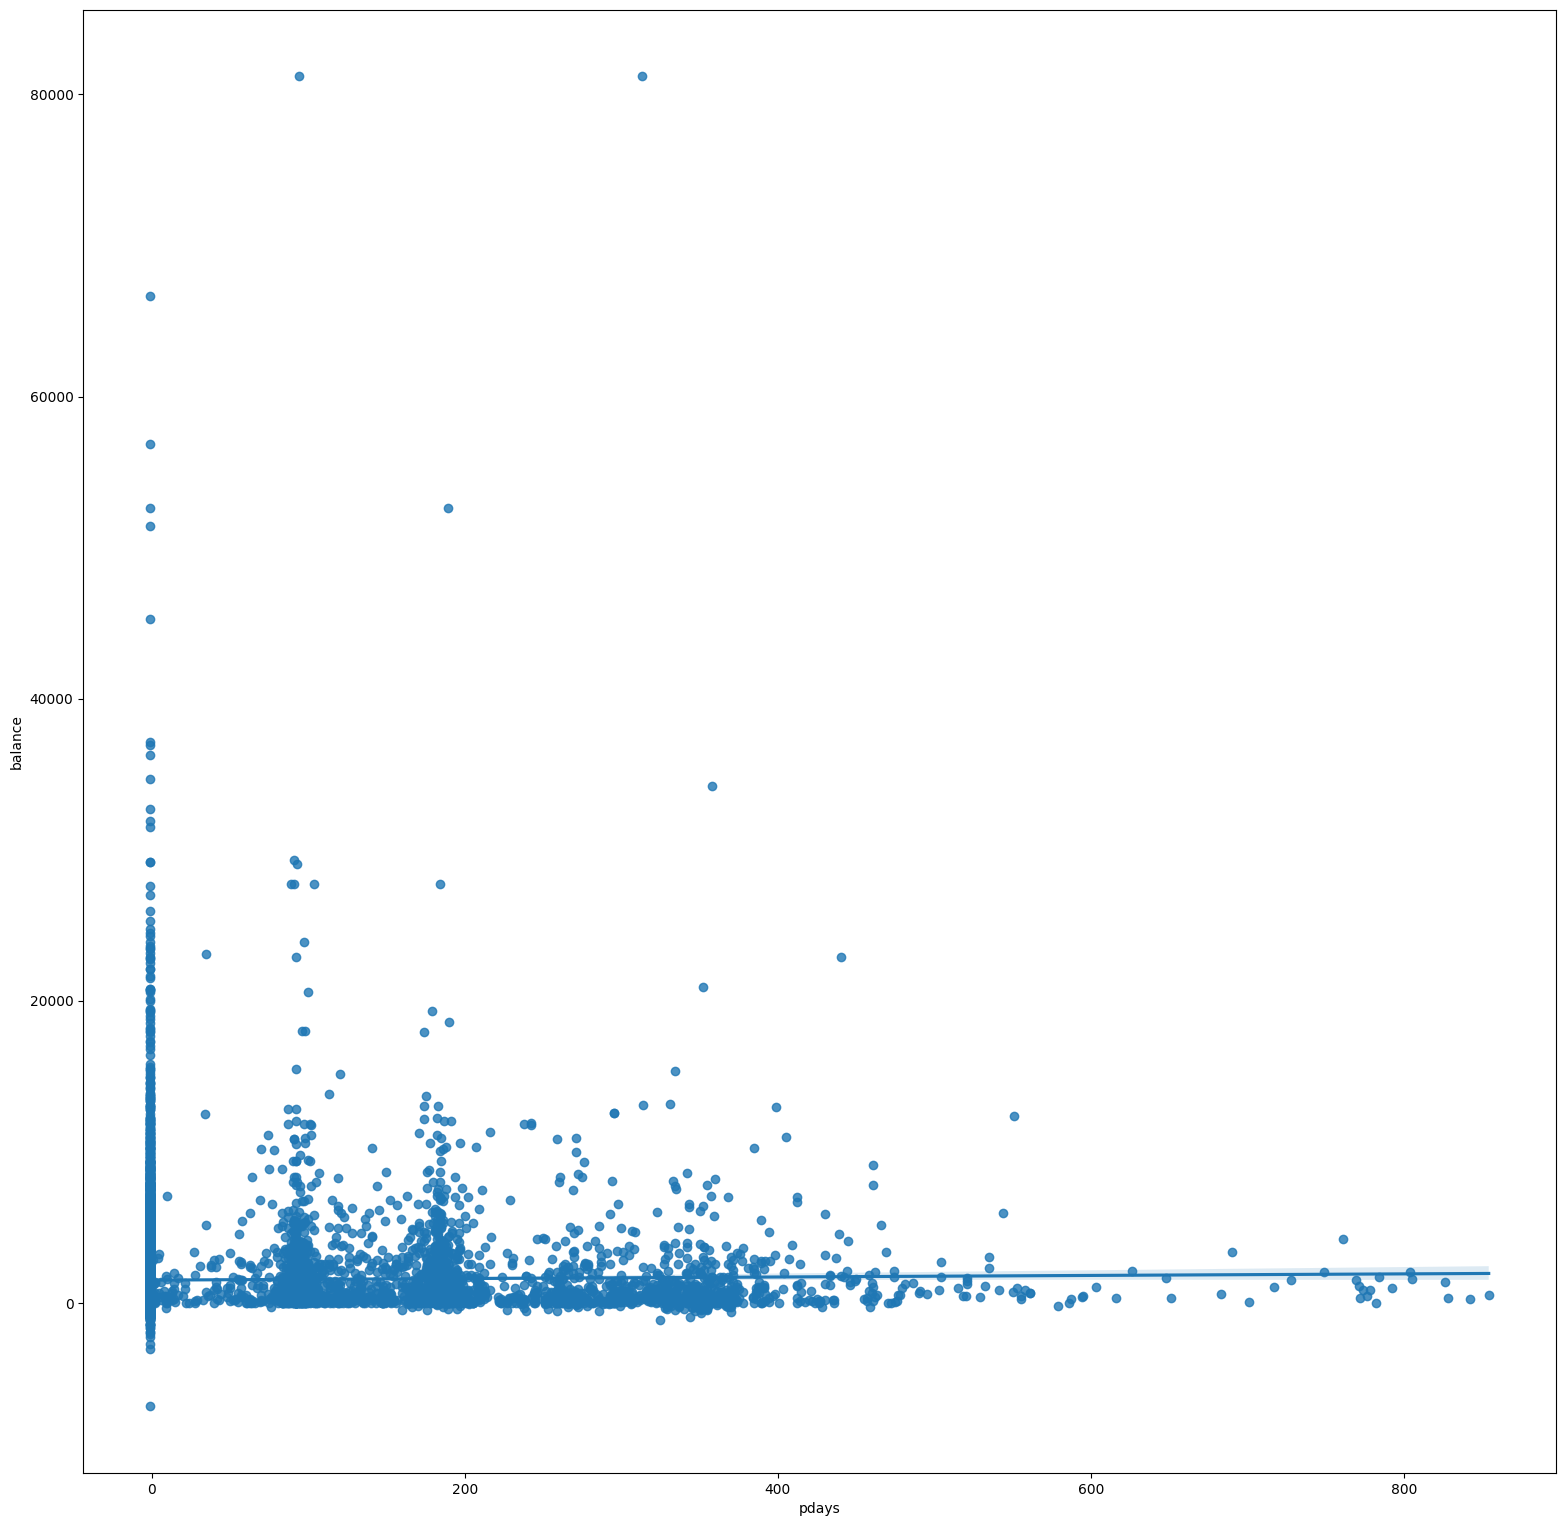

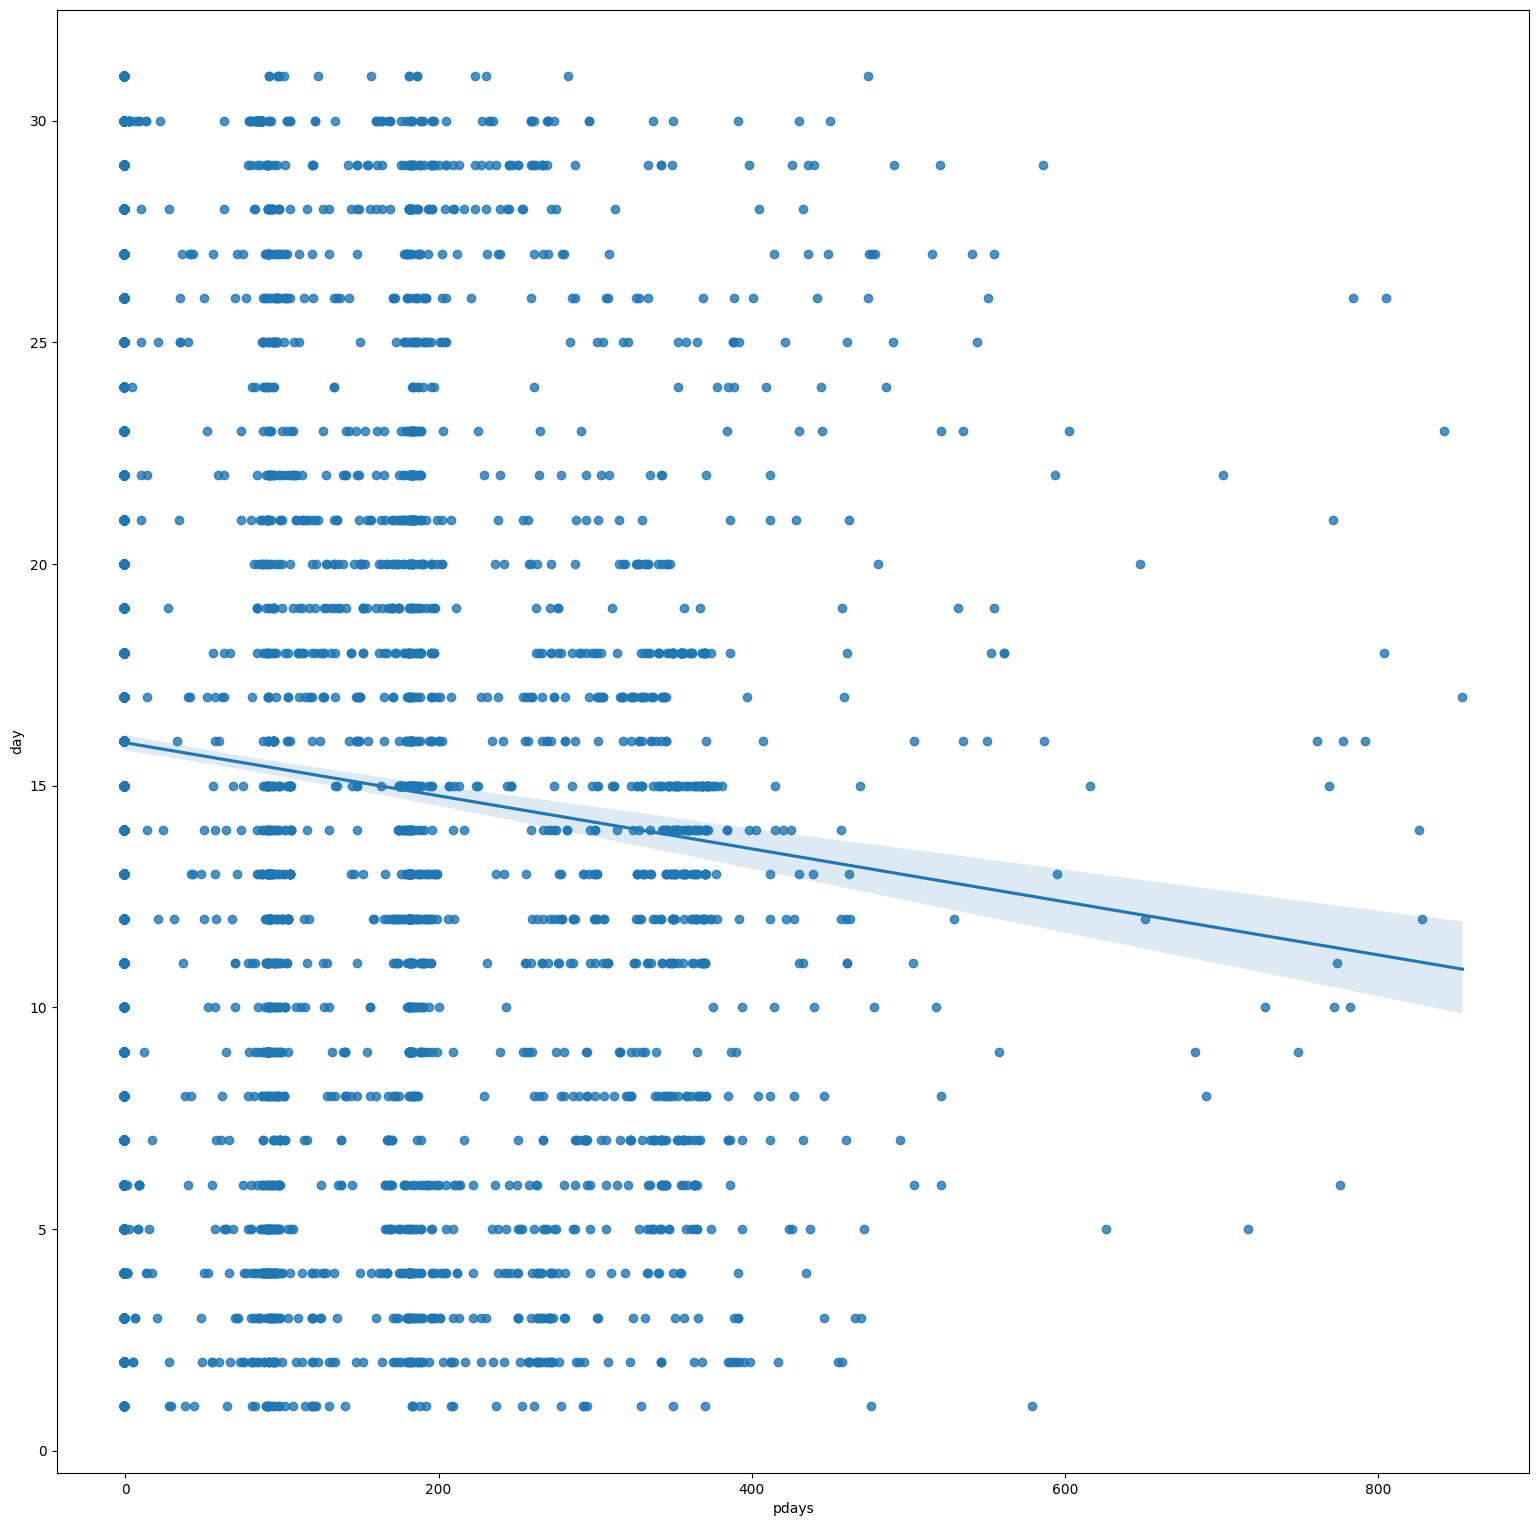

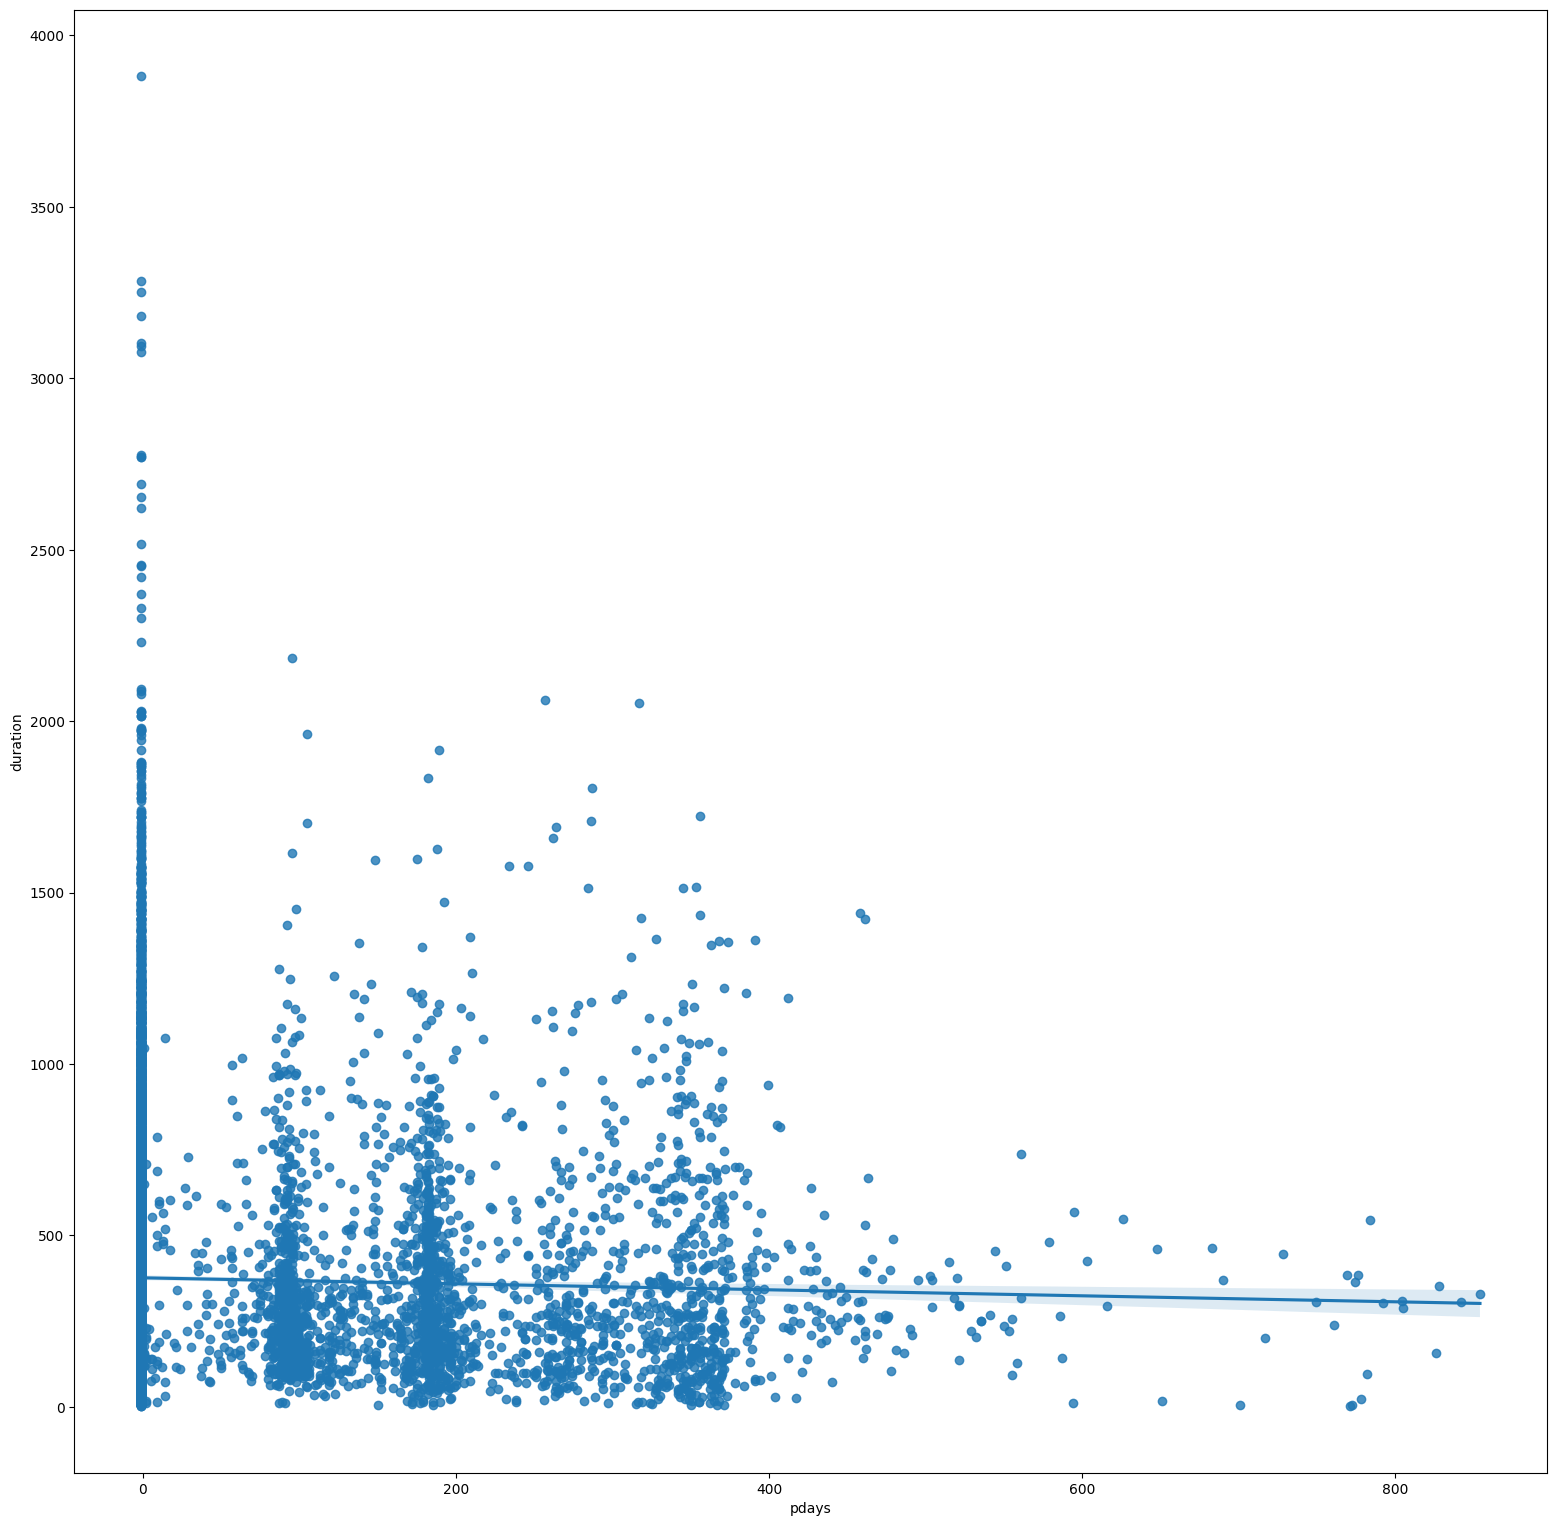

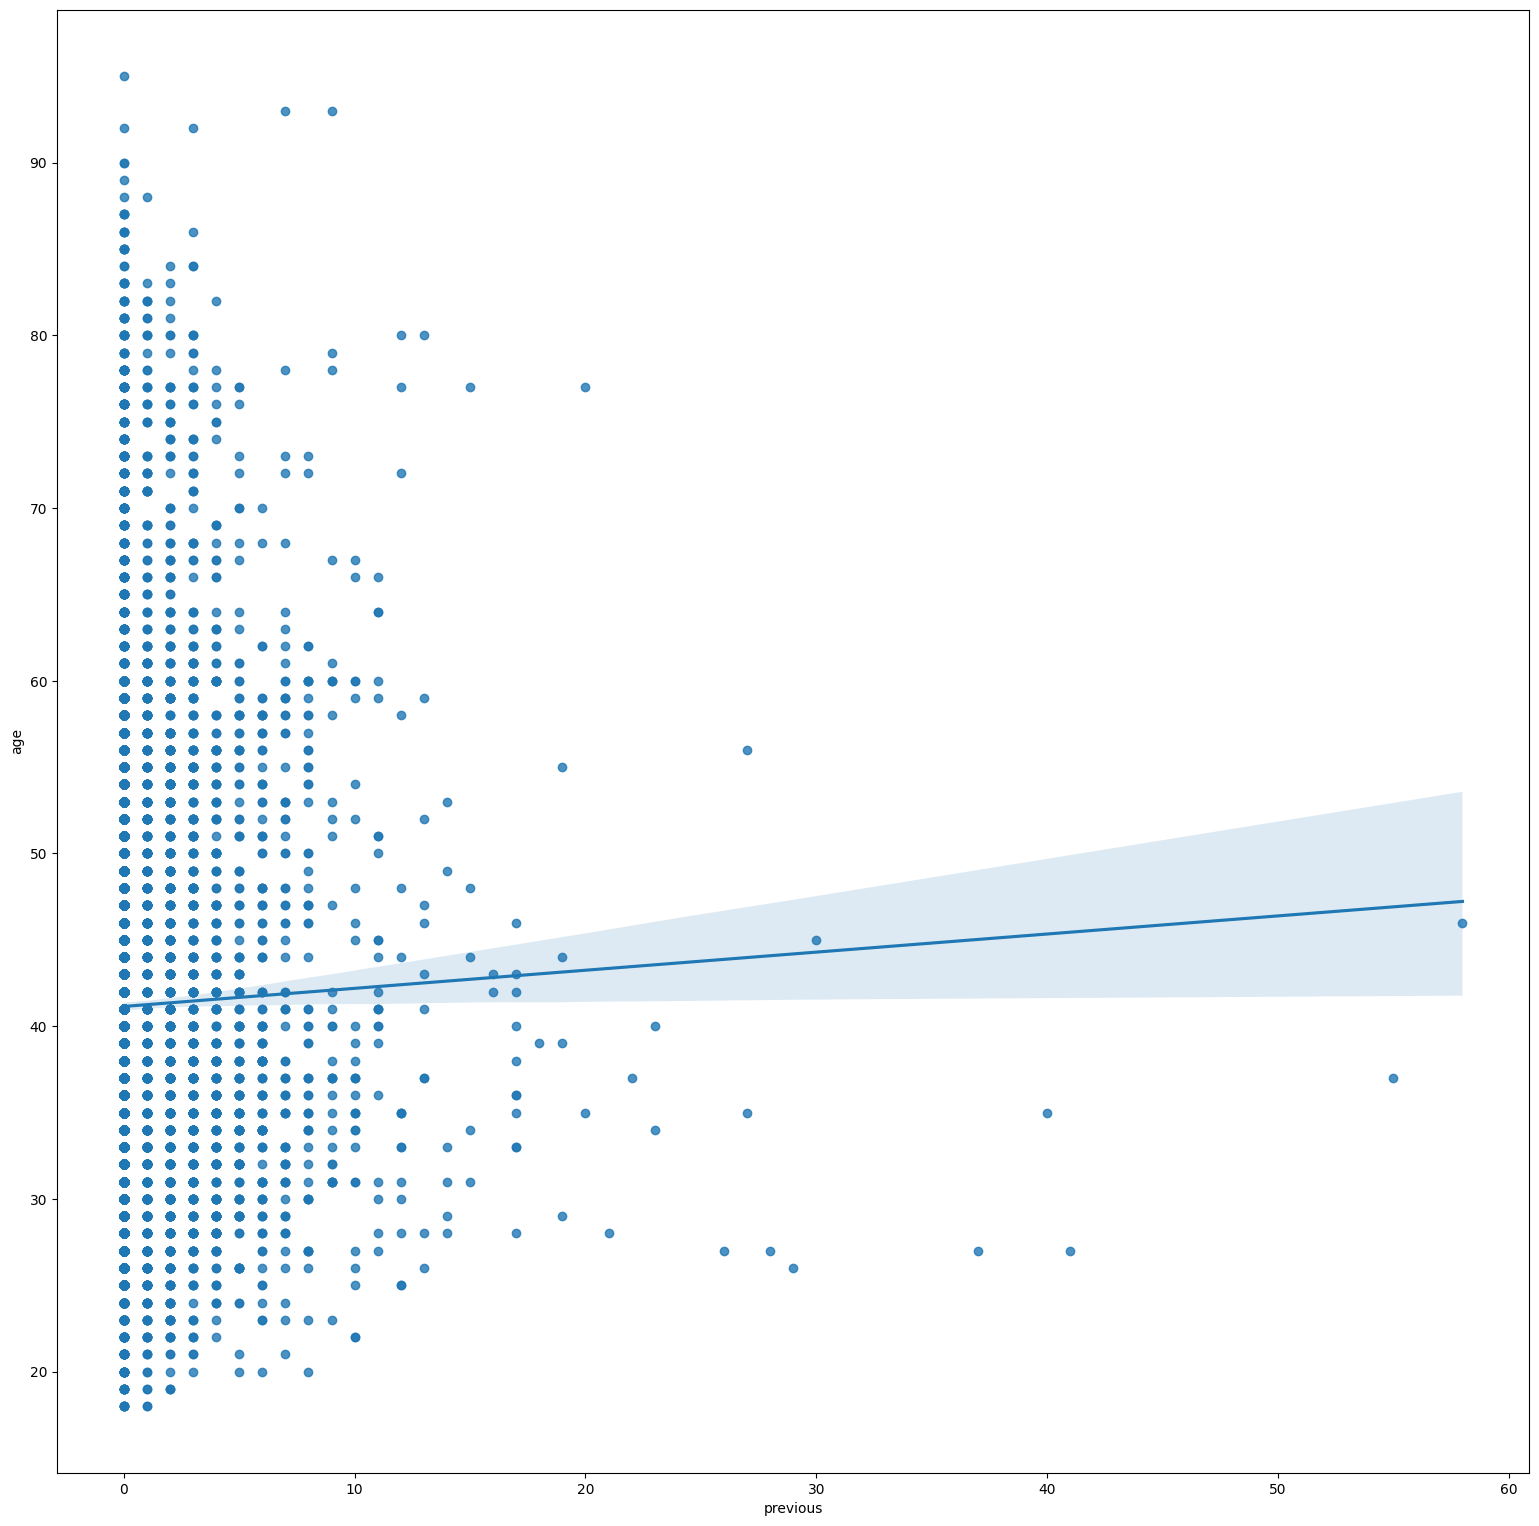

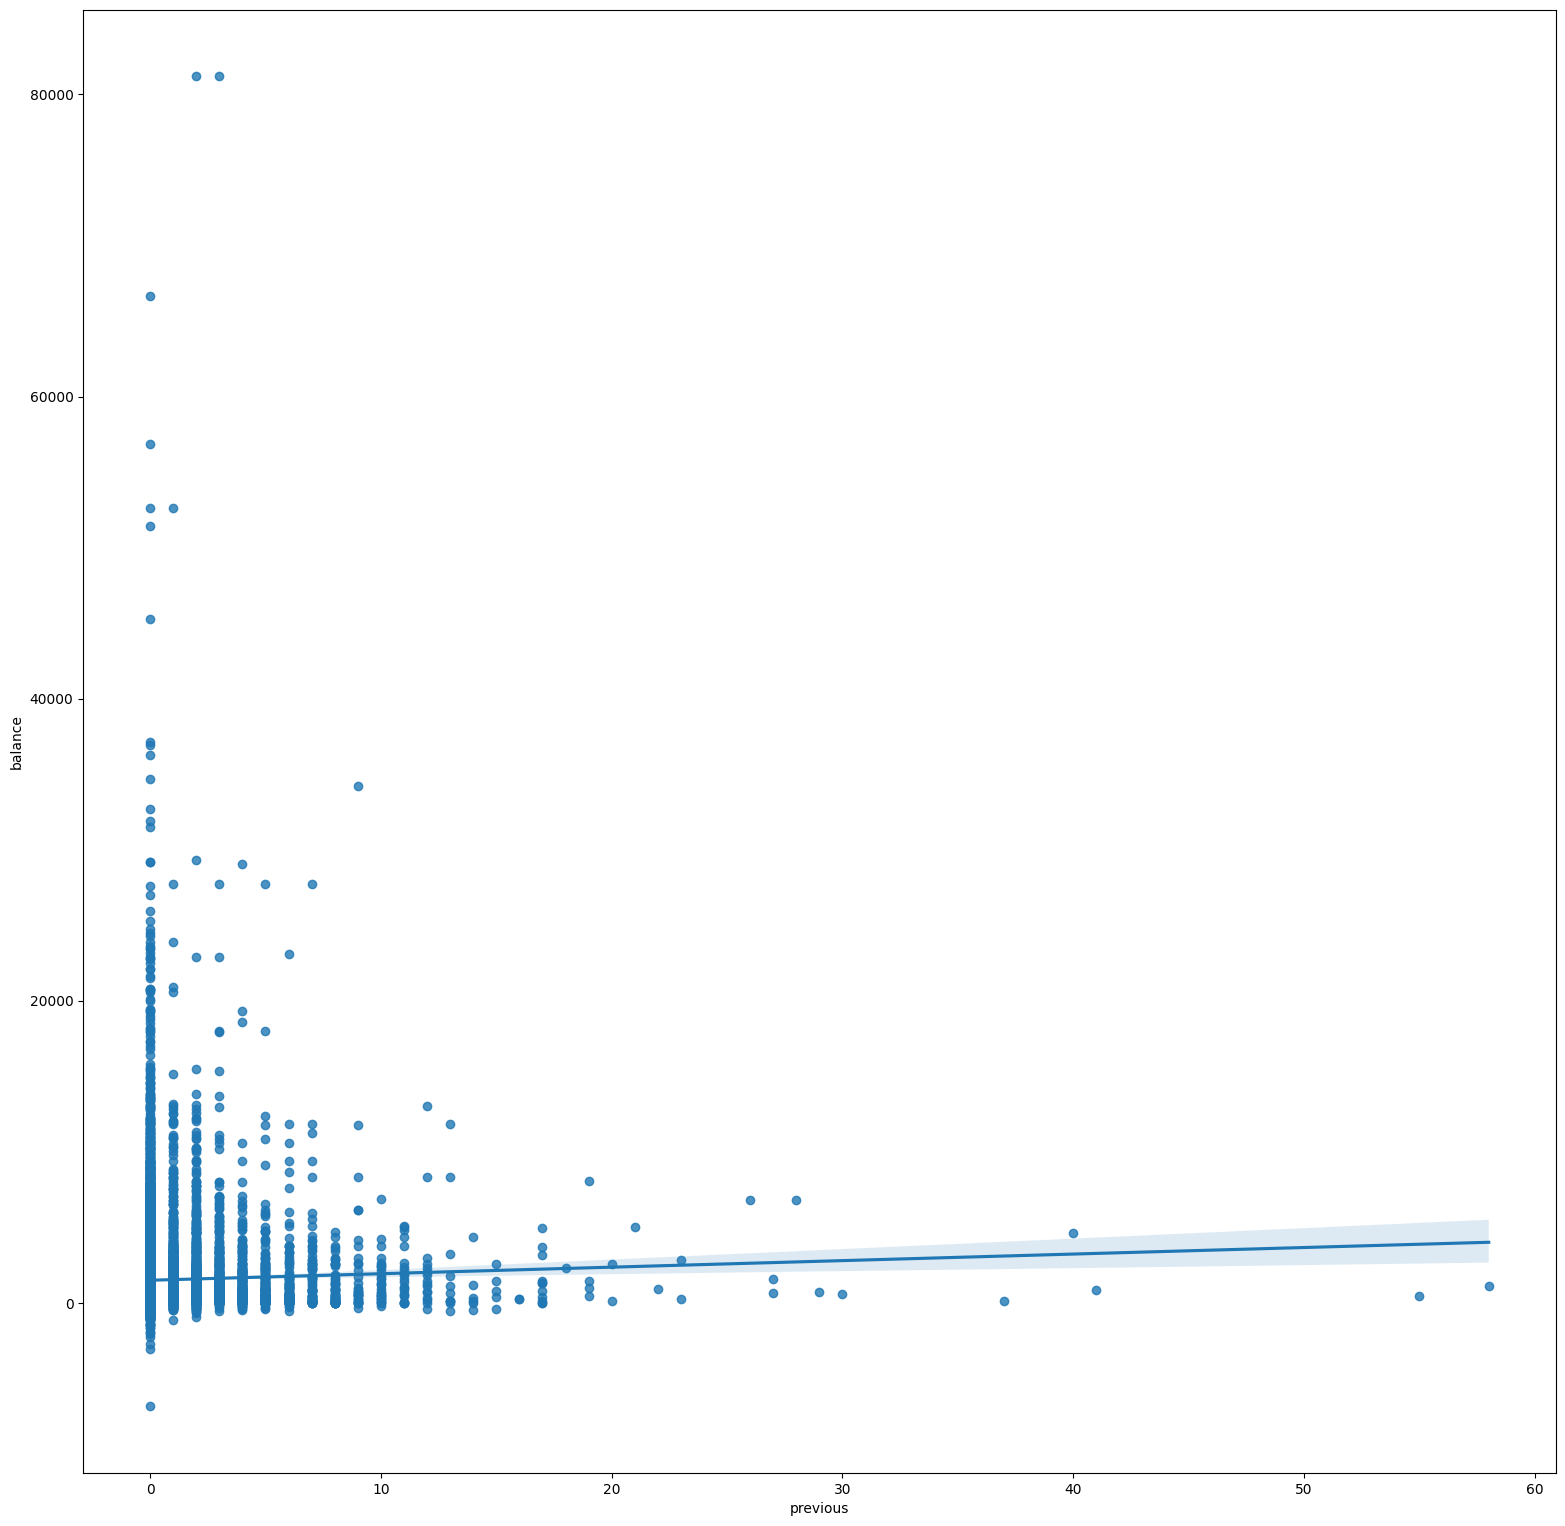

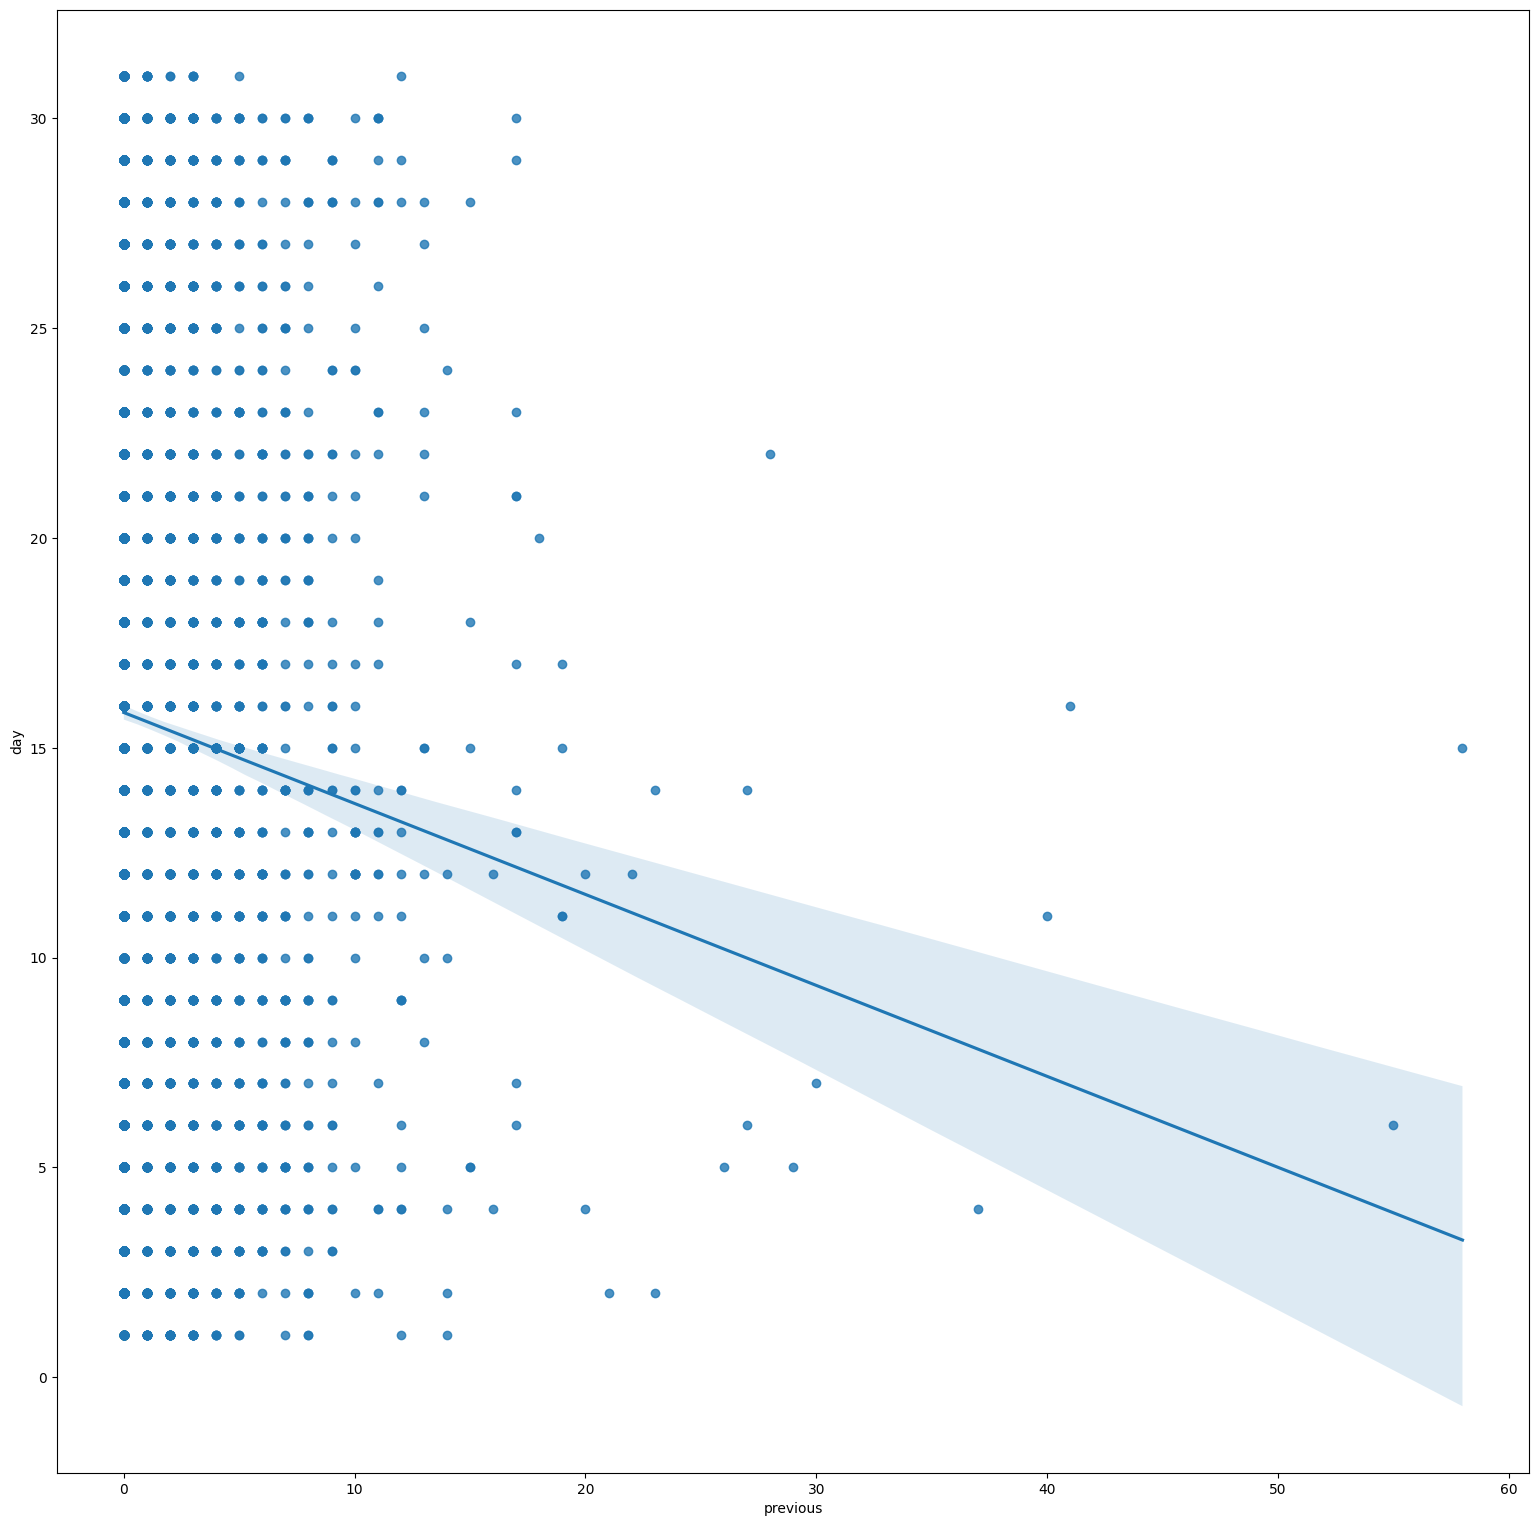

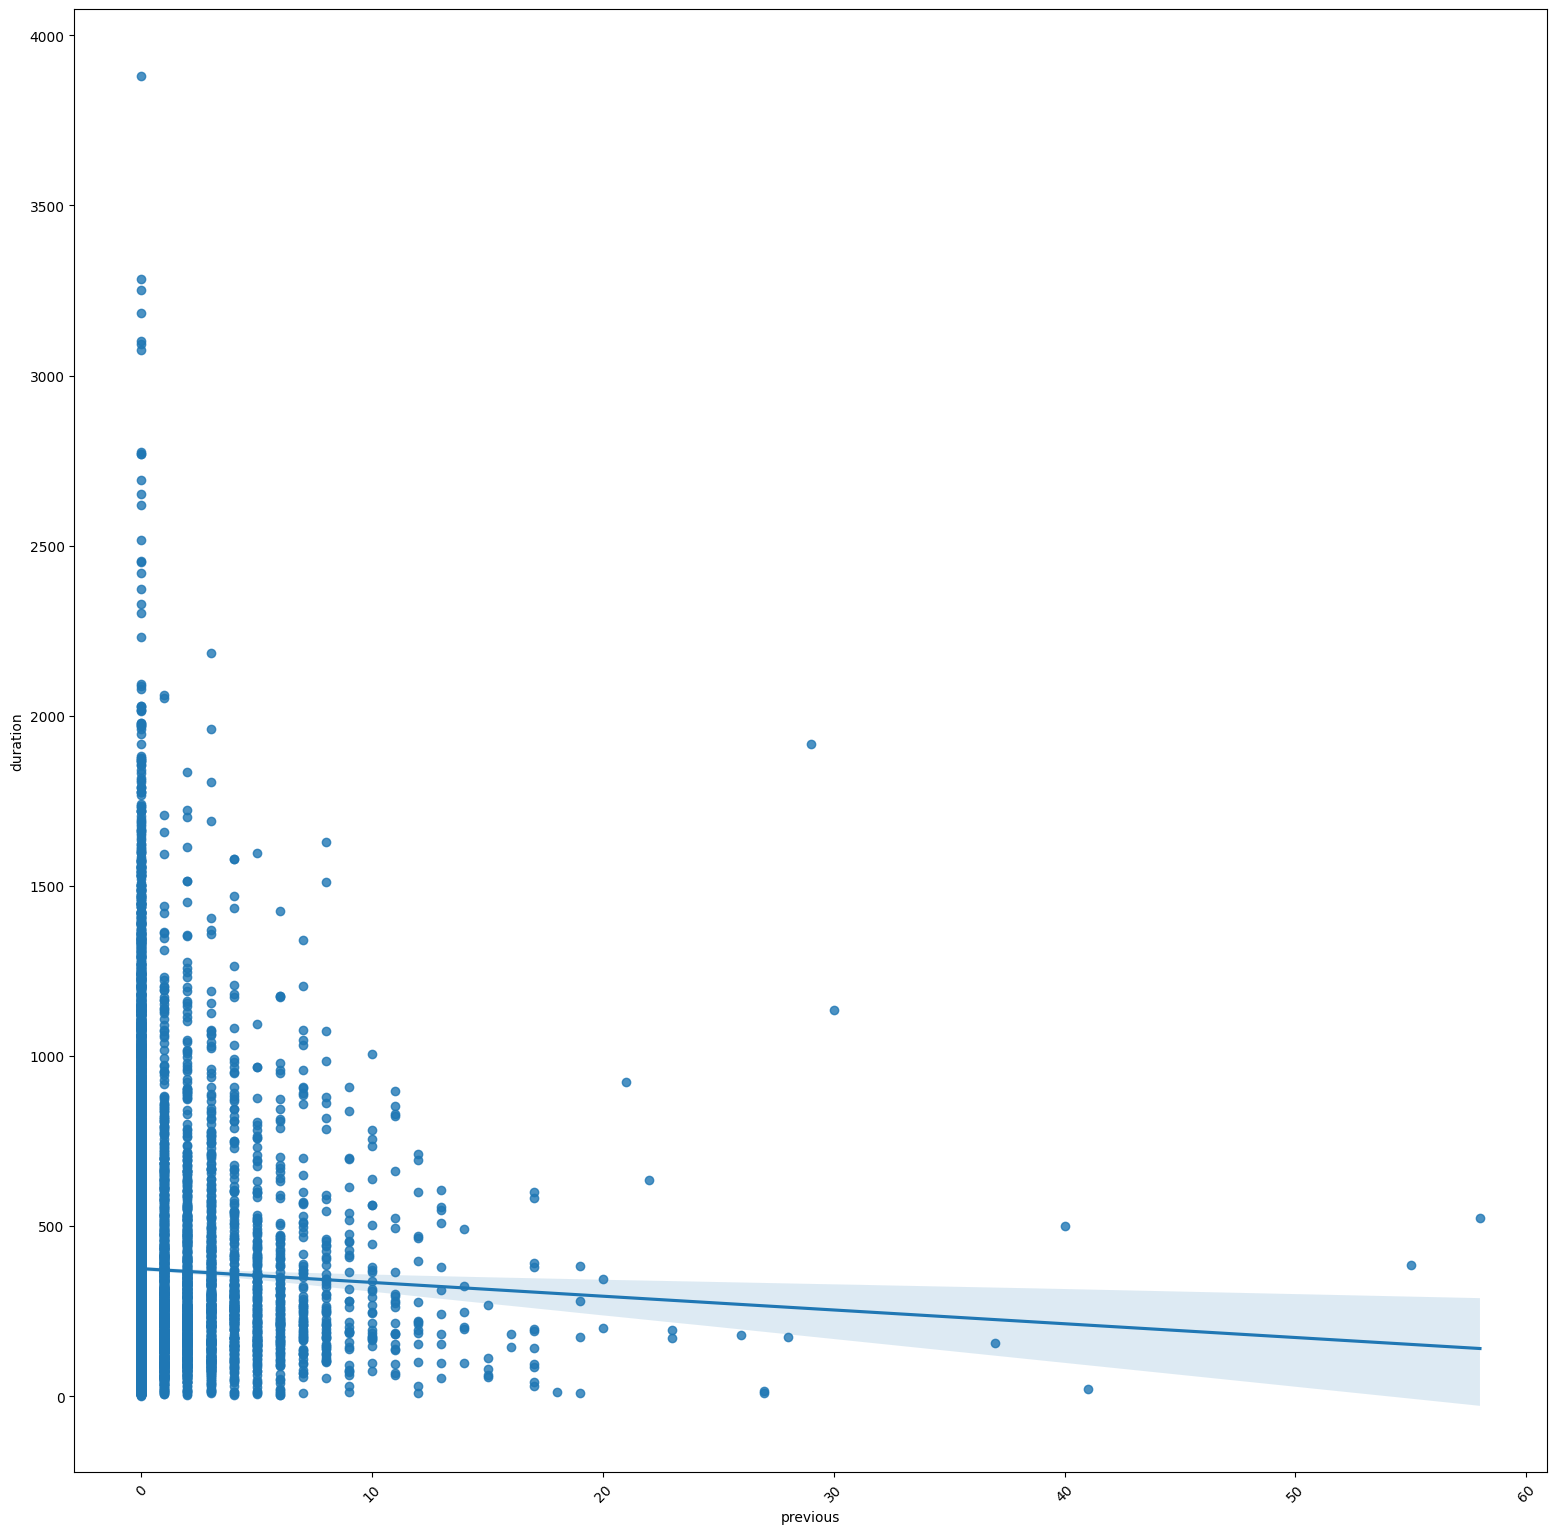

In [15]:
int_int(data)

In [16]:
def cat_int(dataframe) :
   contour = dataframe.select_dtypes("object").shape[1] if dataframe.select_dtypes("object").shape[1]%2==0 else dataframe.select_dtypes("object").shape[1]//2+1
   
   for i, col in enumerate(dataframe.select_dtypes("object")) : 
      for co in dataframe.select_dtypes("int") :
            plt.figure(figsize=(8,8))
            sn.boxplot(dataframe,x=col,y=co,hue="deposit") 
            plt.xticks(rotation=45)  
              


C:\Users\laurediekabala\AppData\Local\Temp\ipykernel_12016\73266666.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,8))


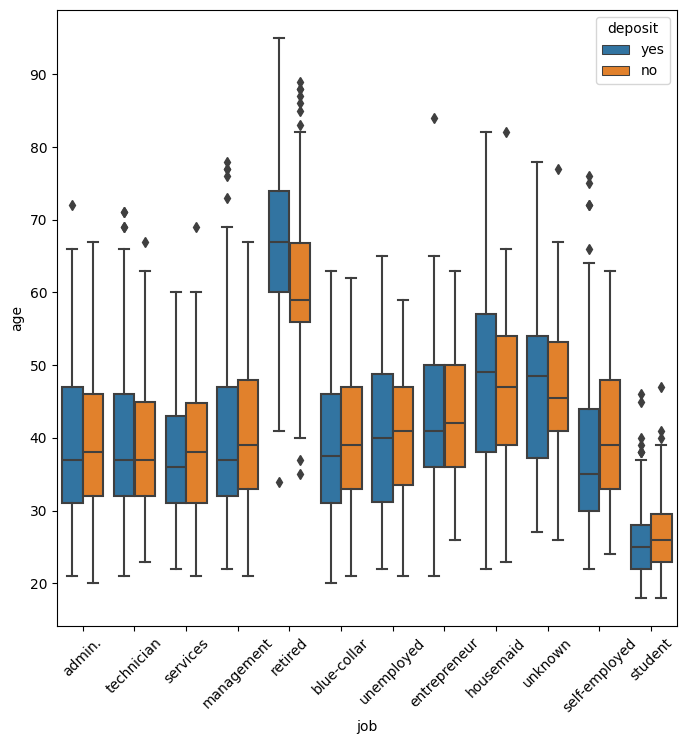

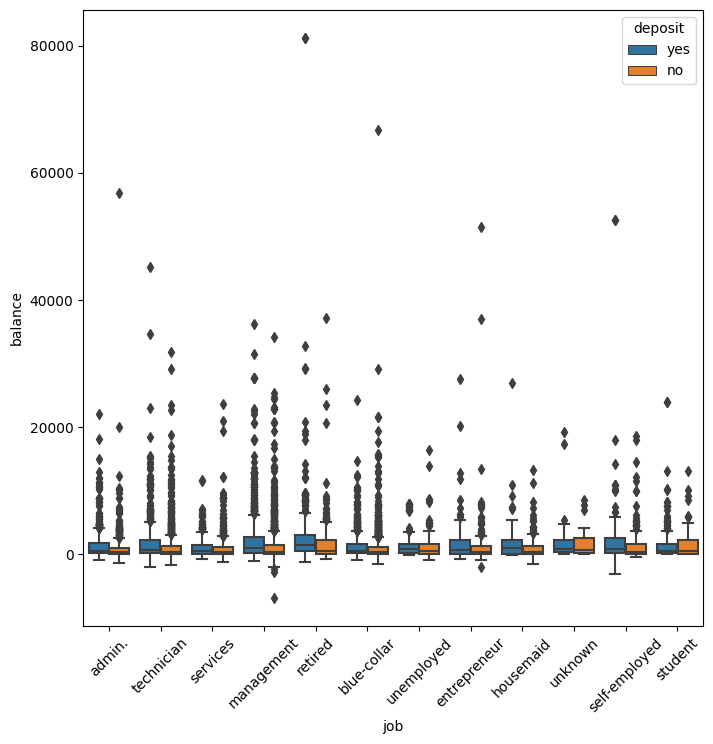

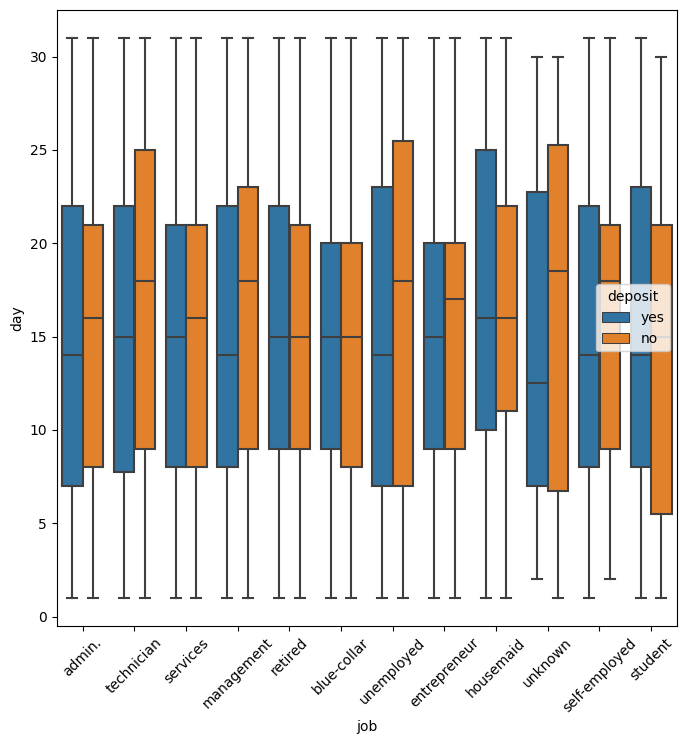

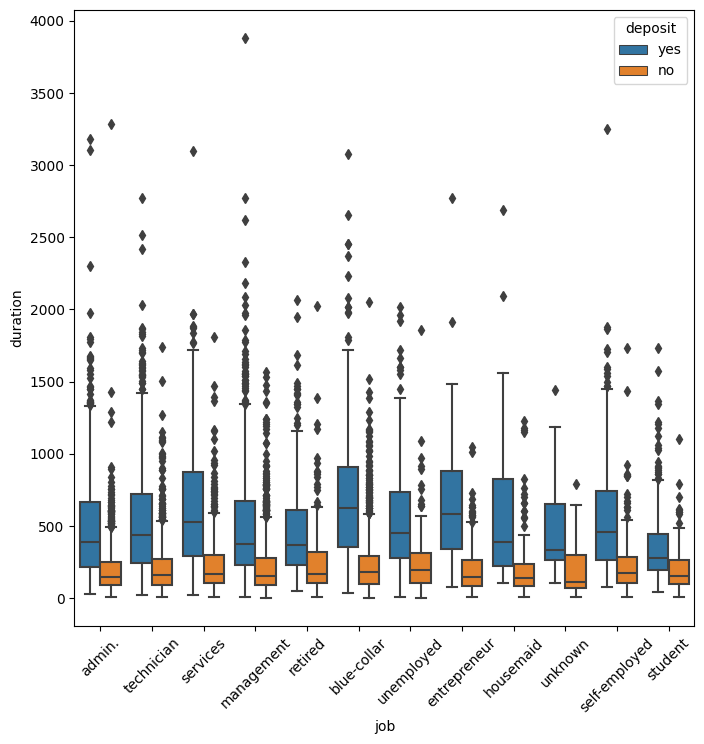

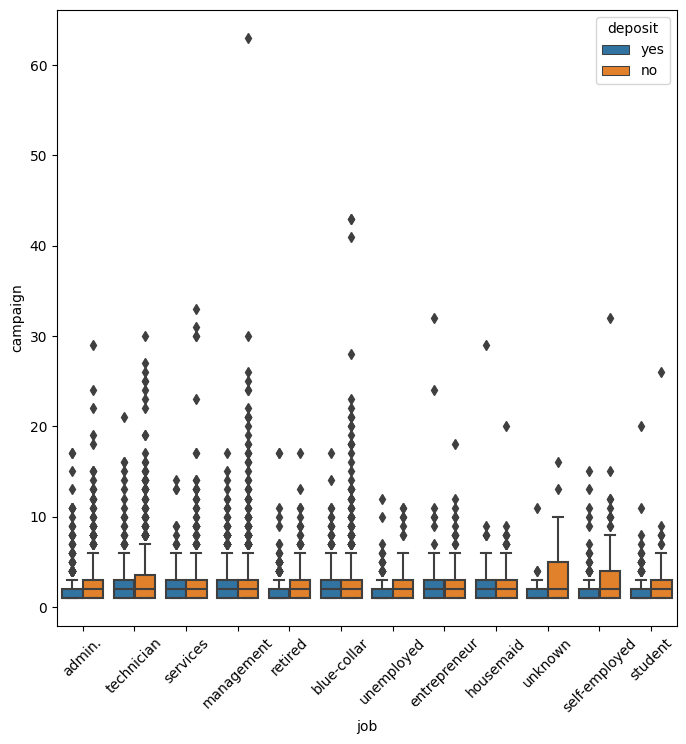

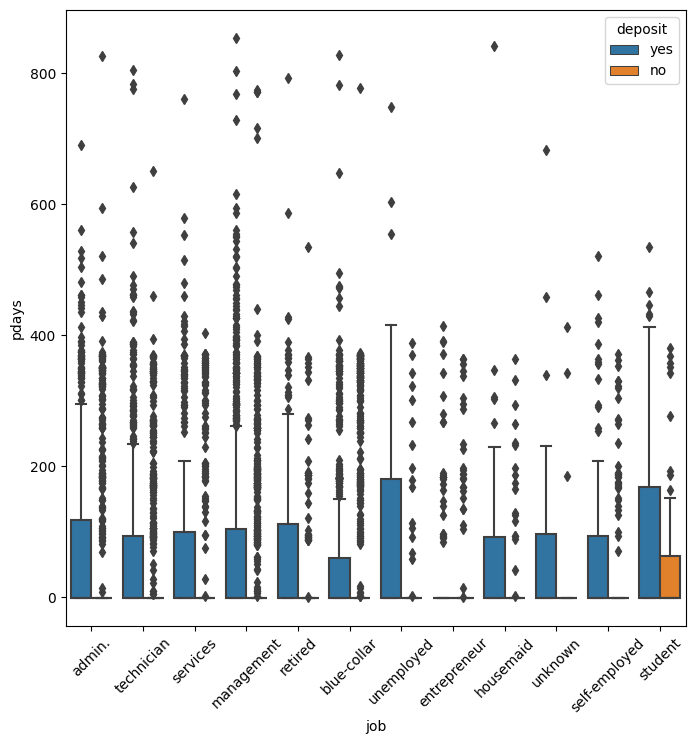

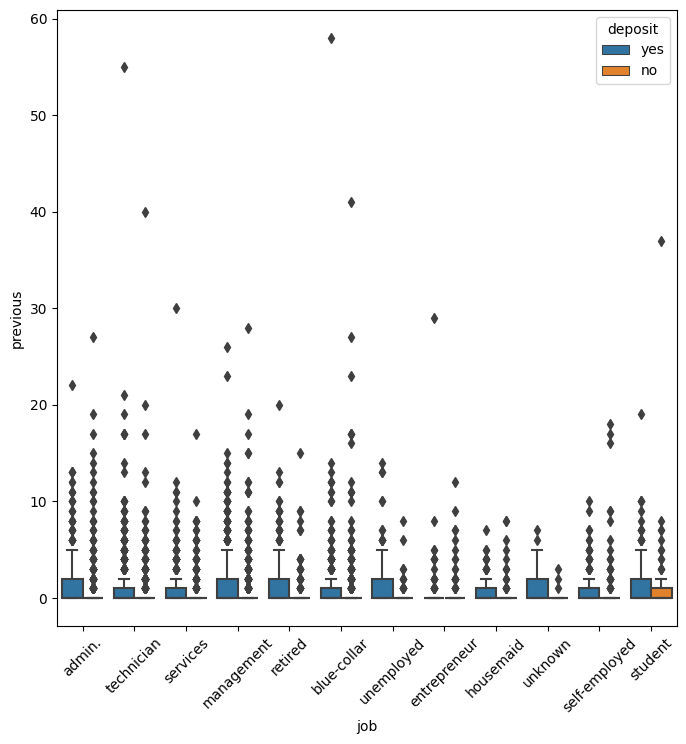

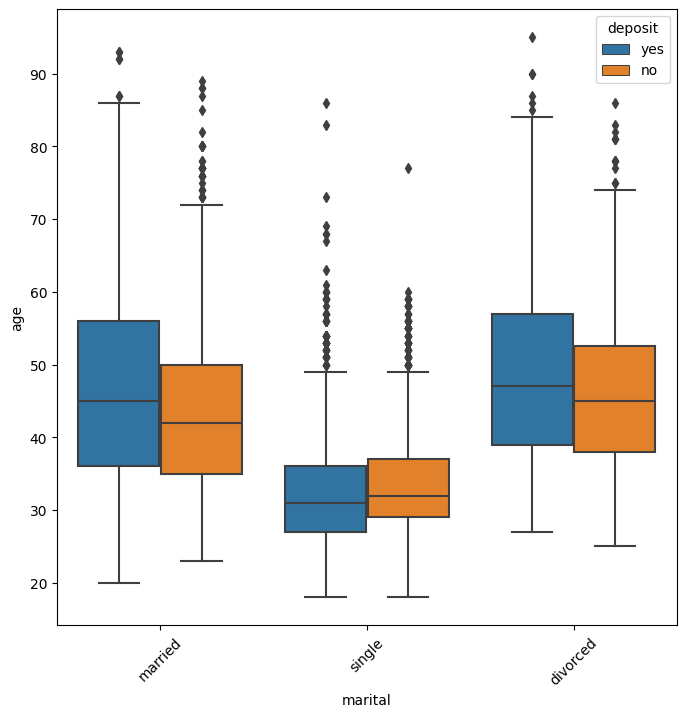

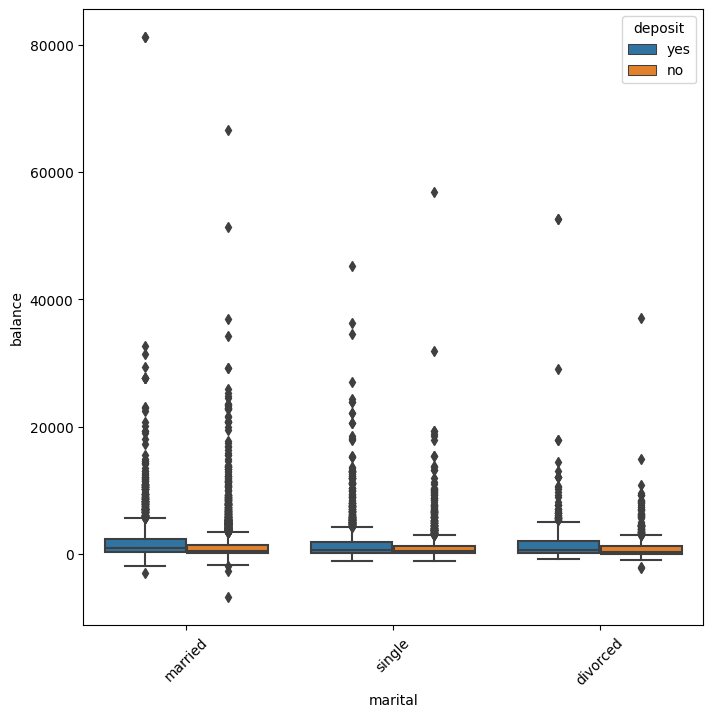

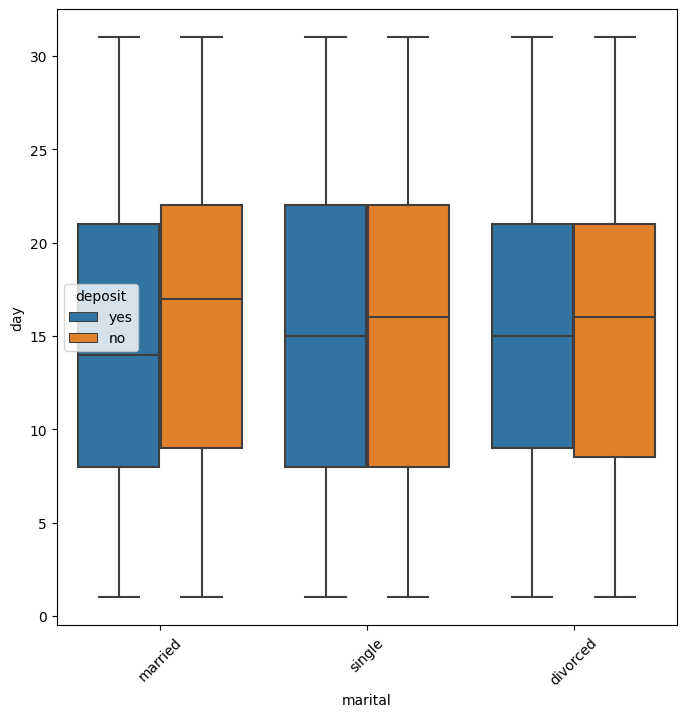

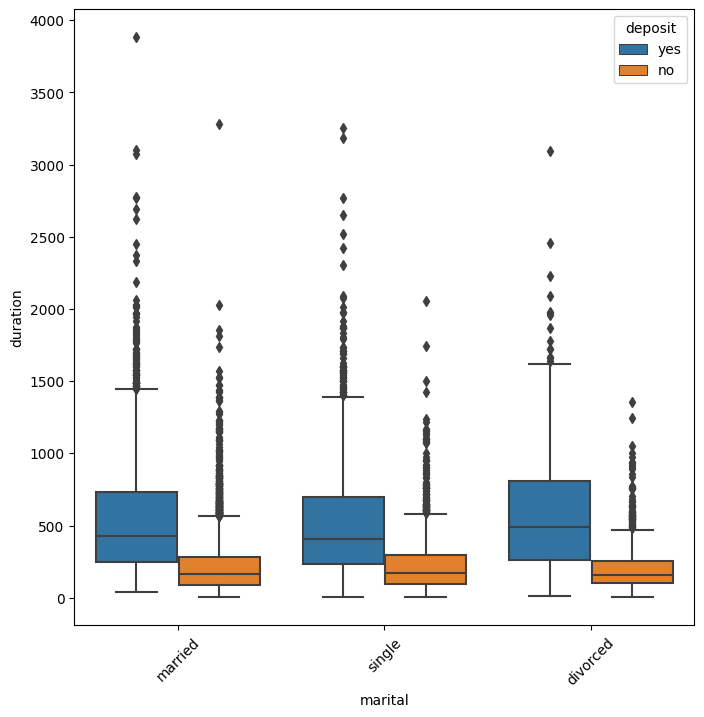

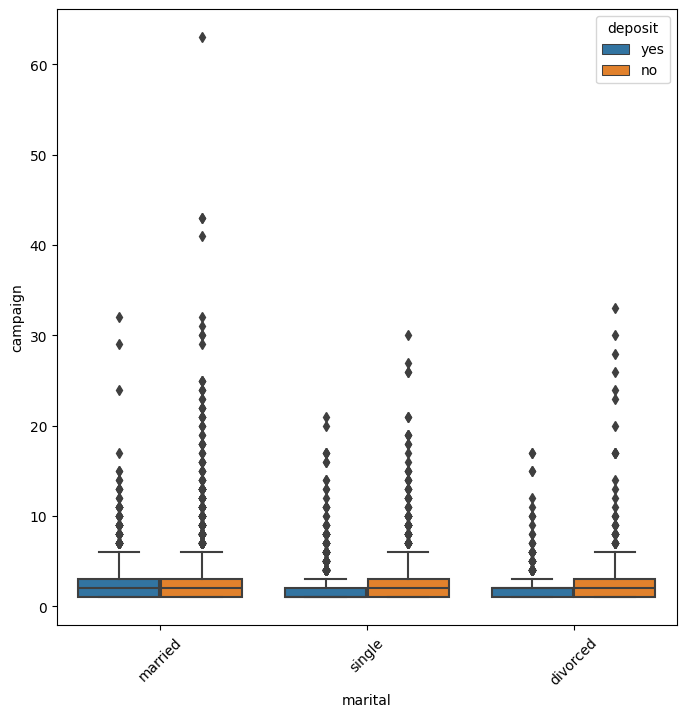

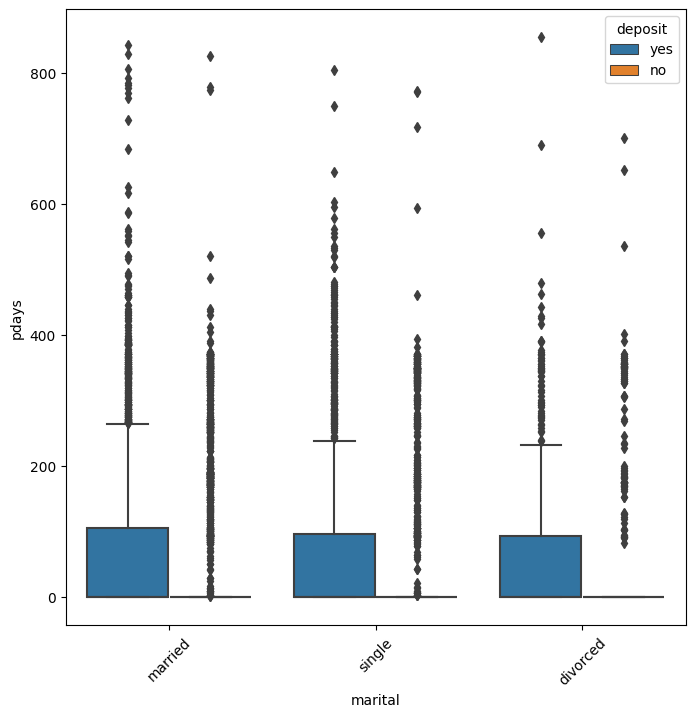

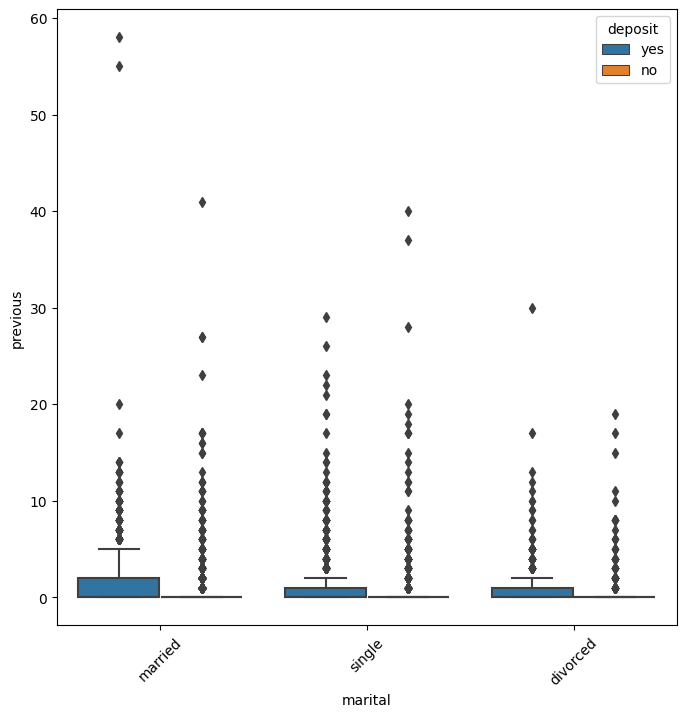

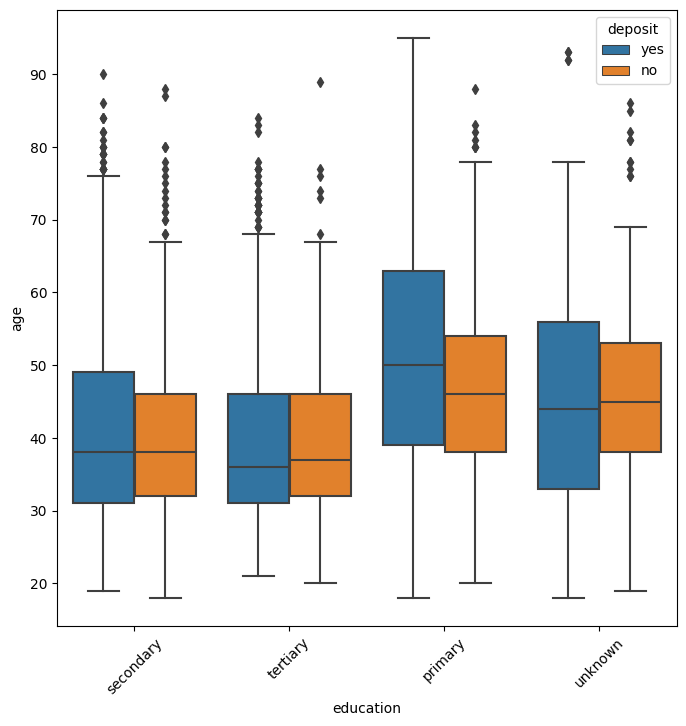

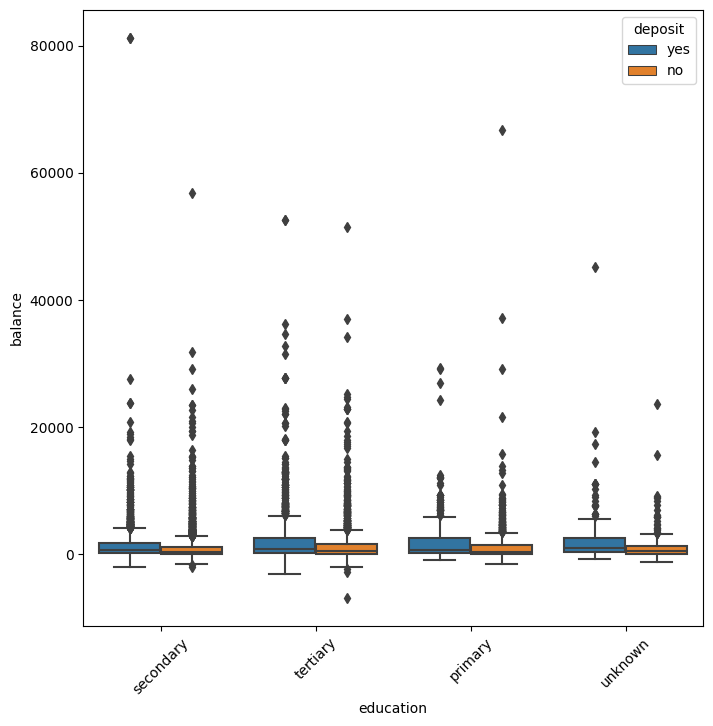

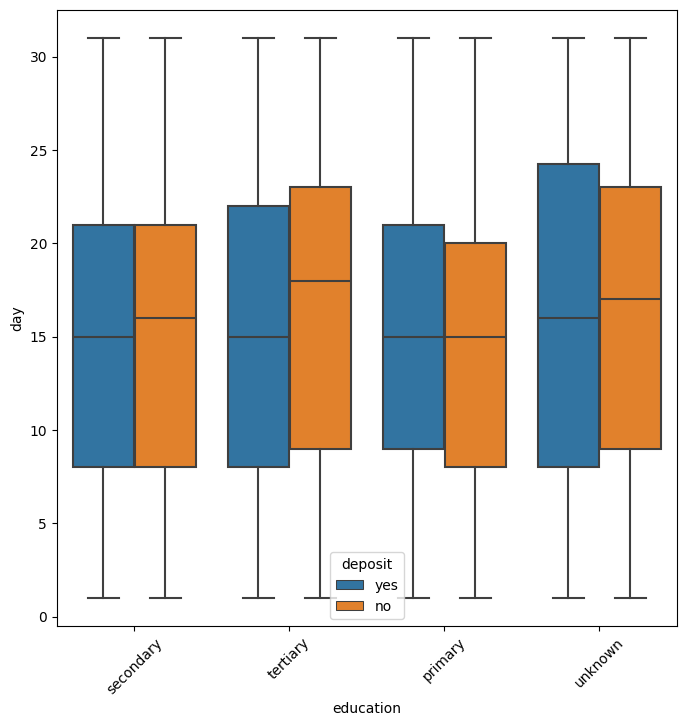

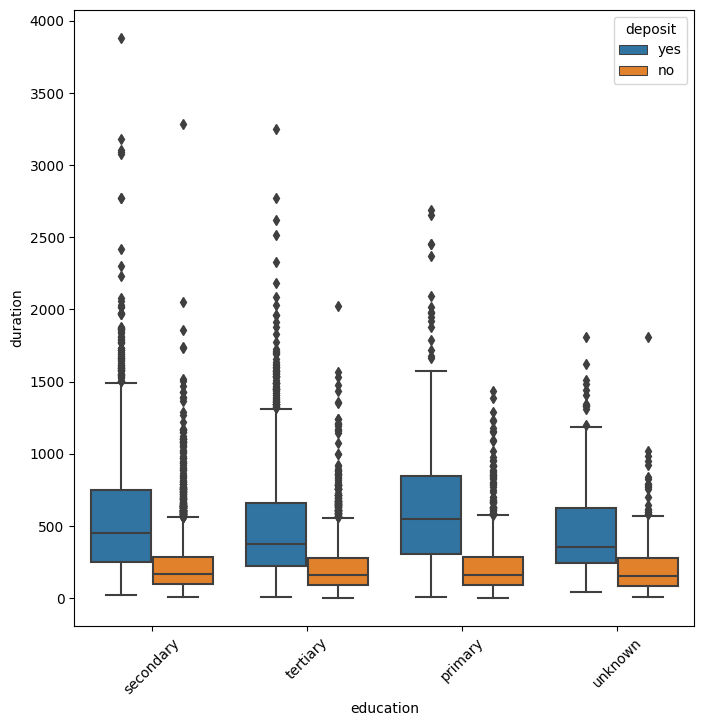

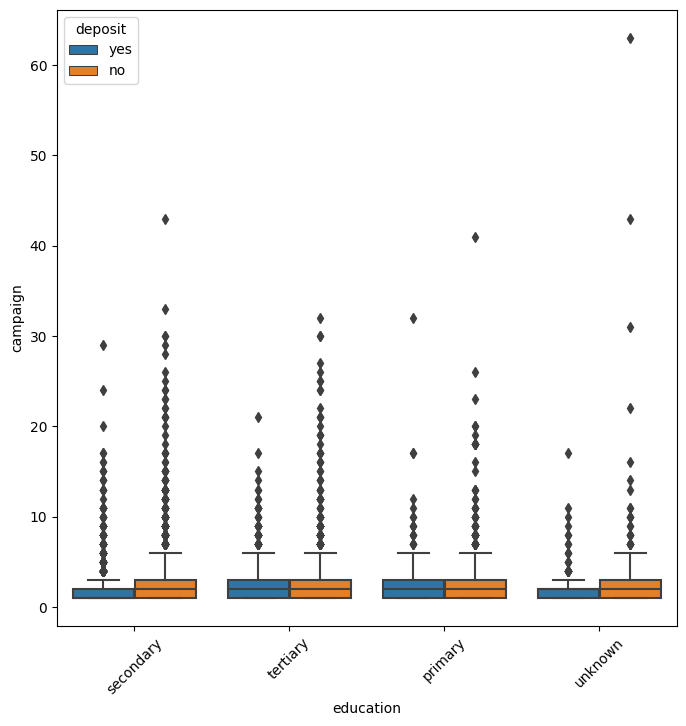

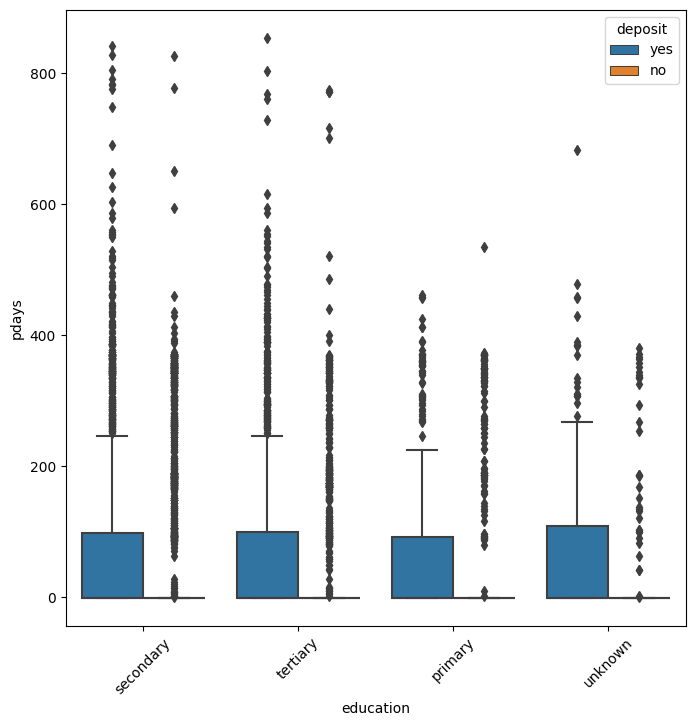

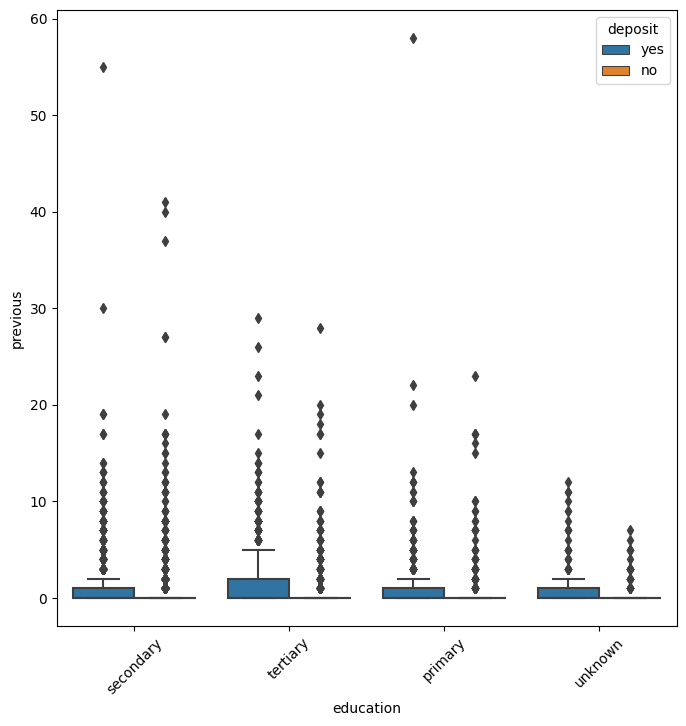

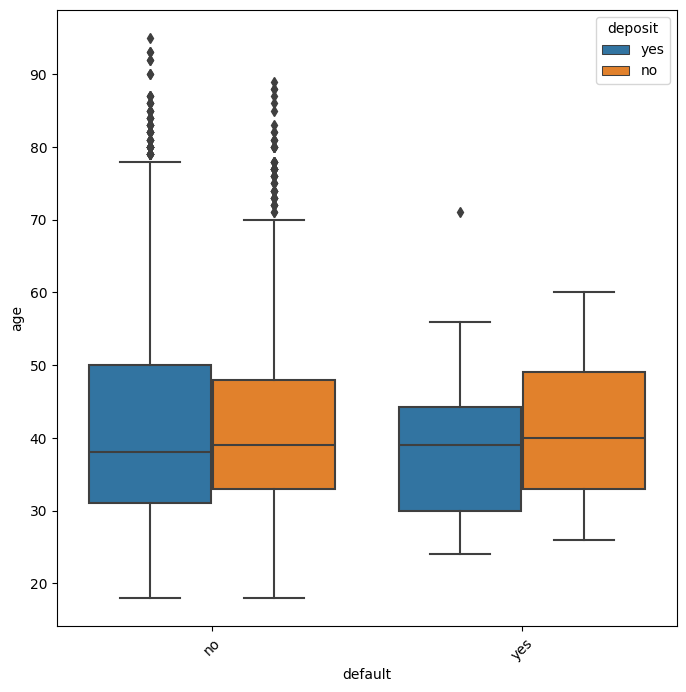

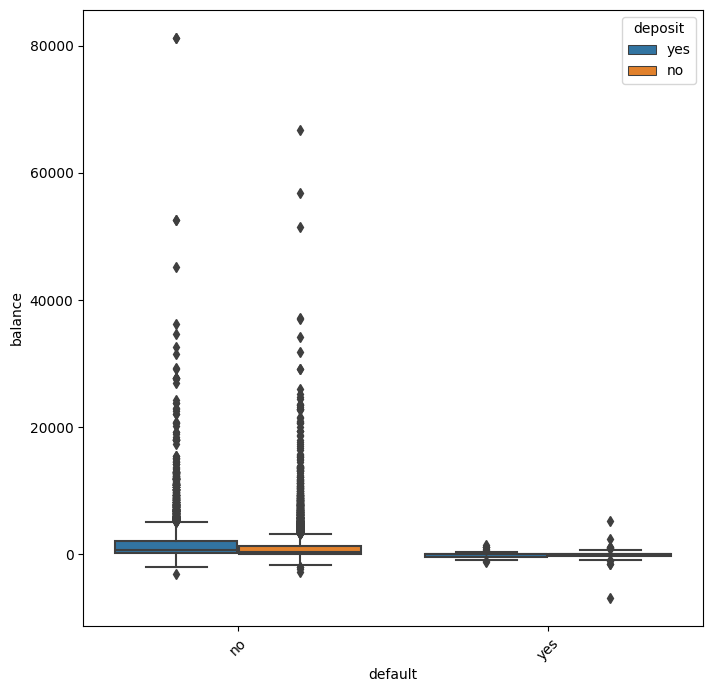

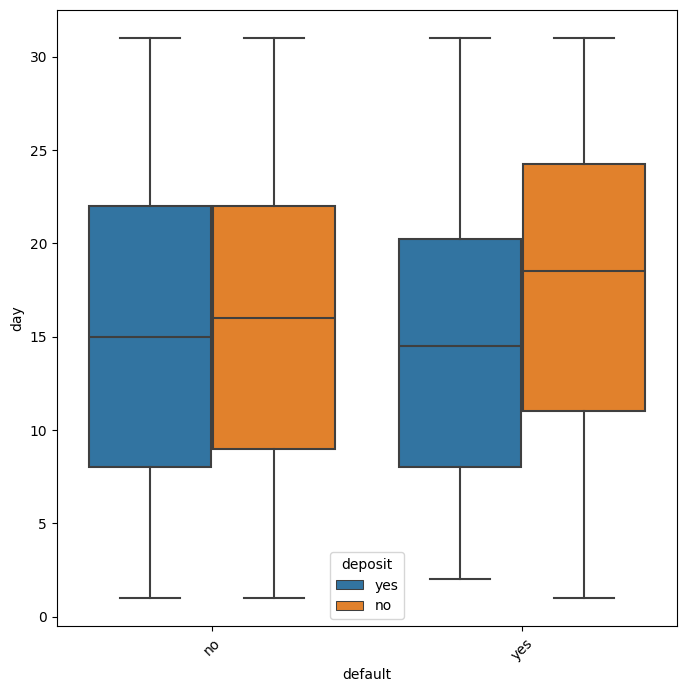

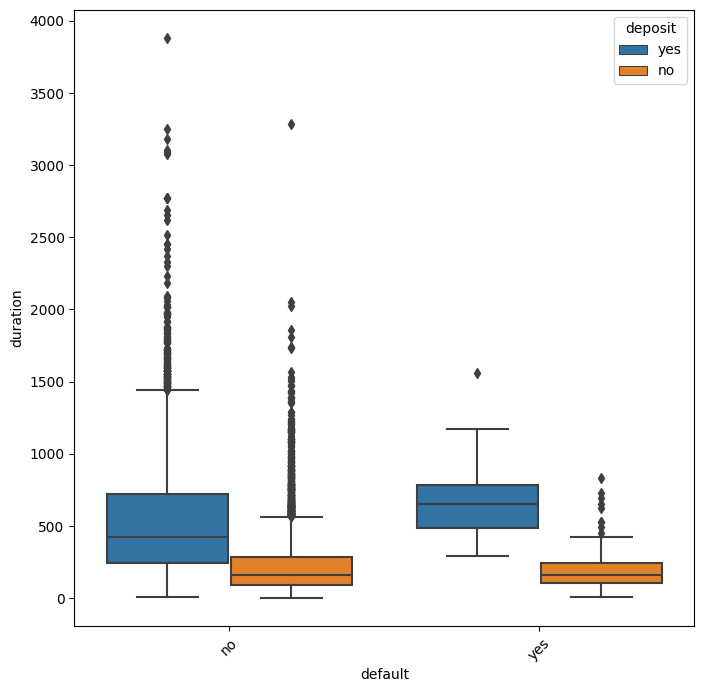

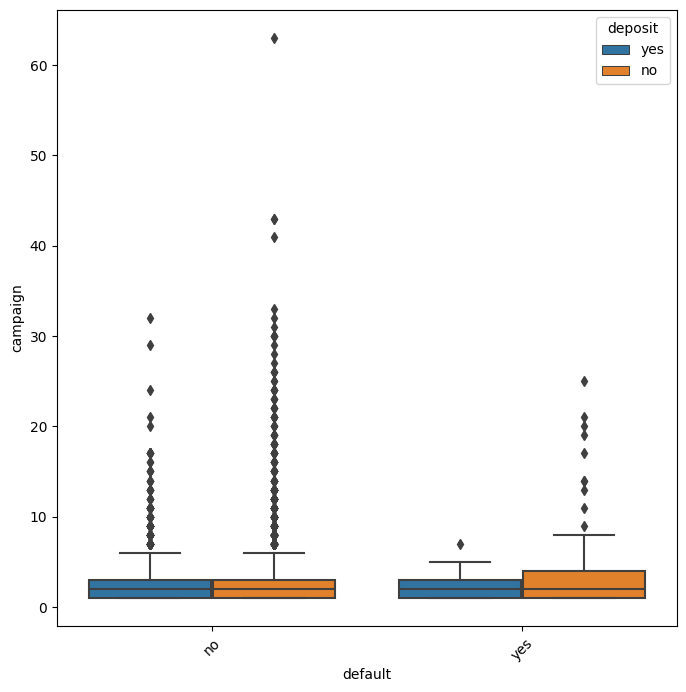

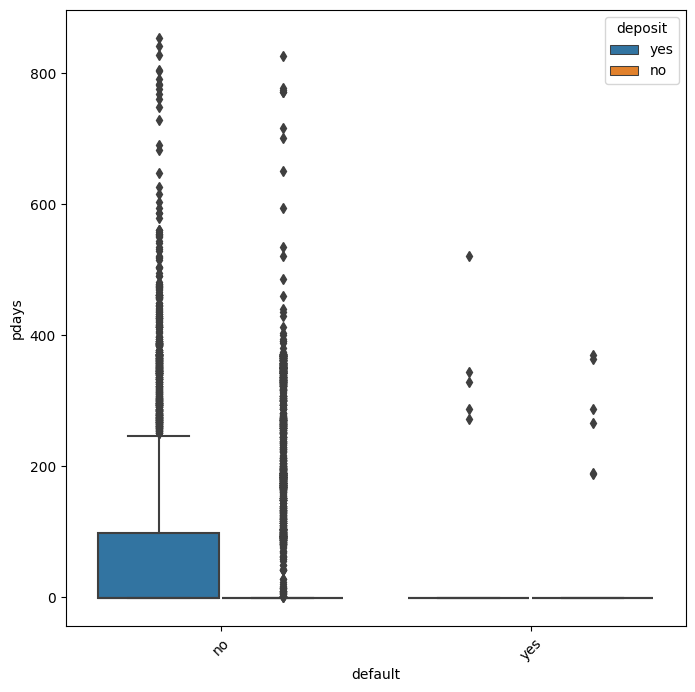

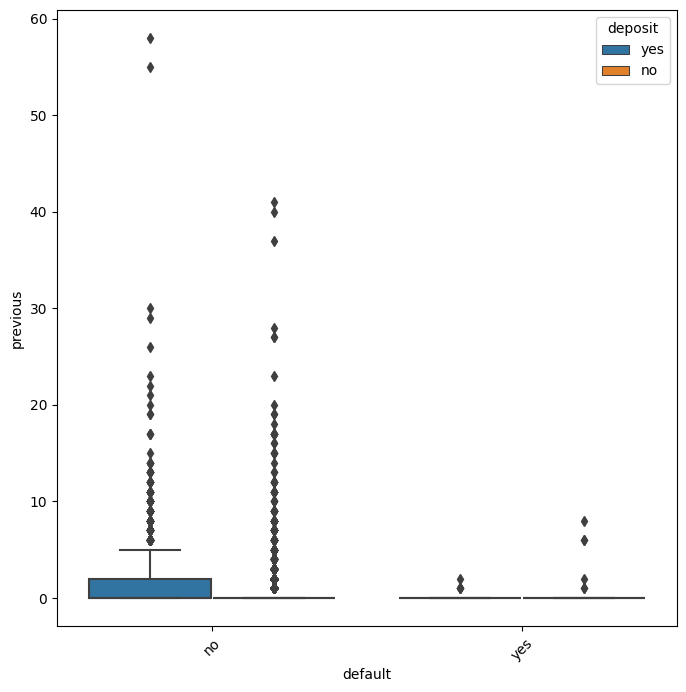

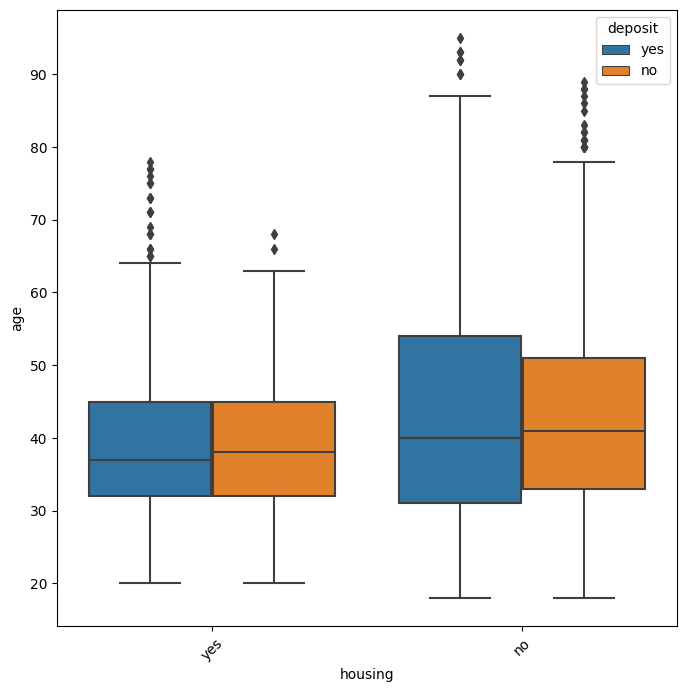

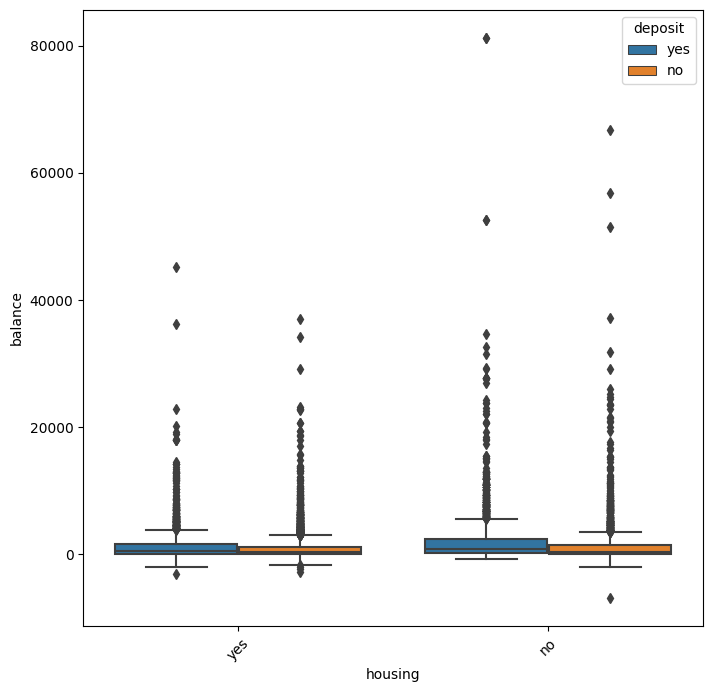

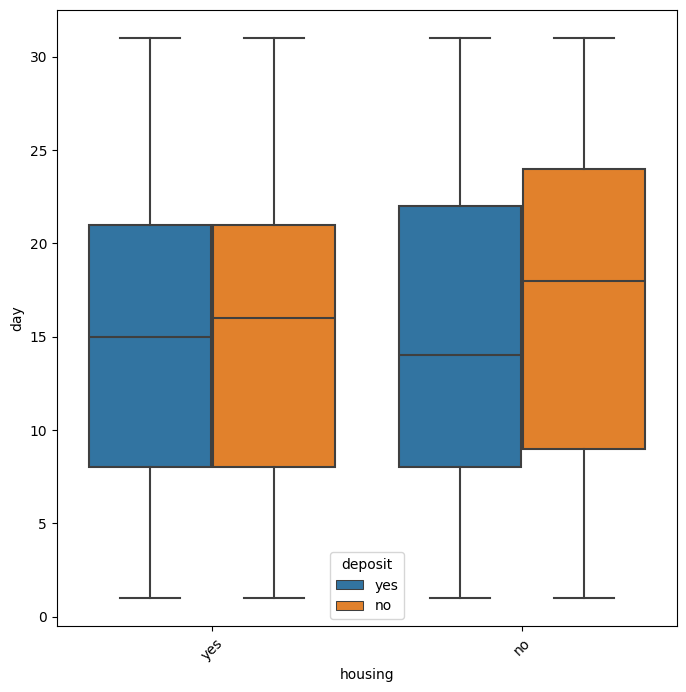

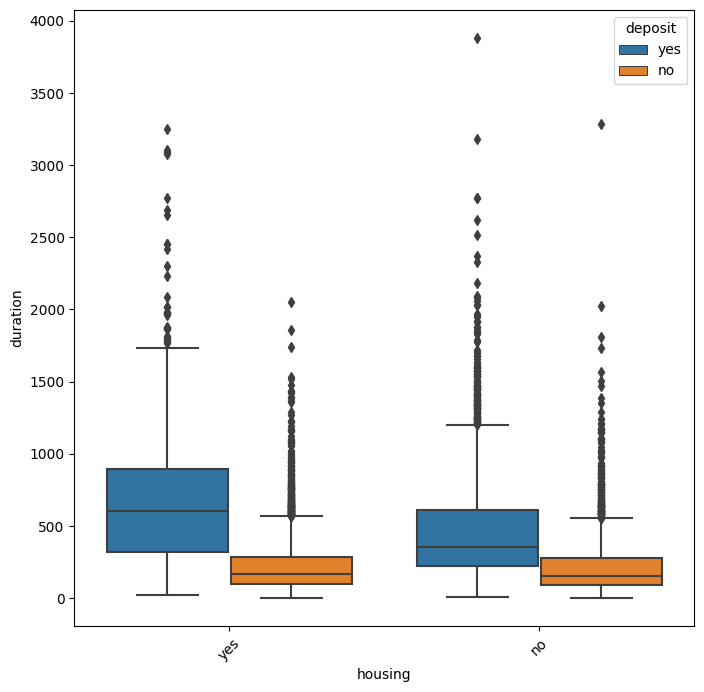

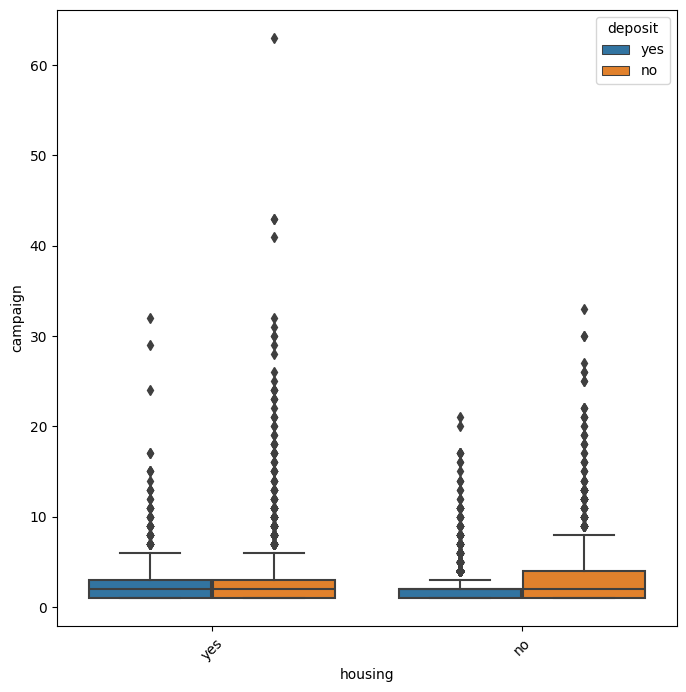

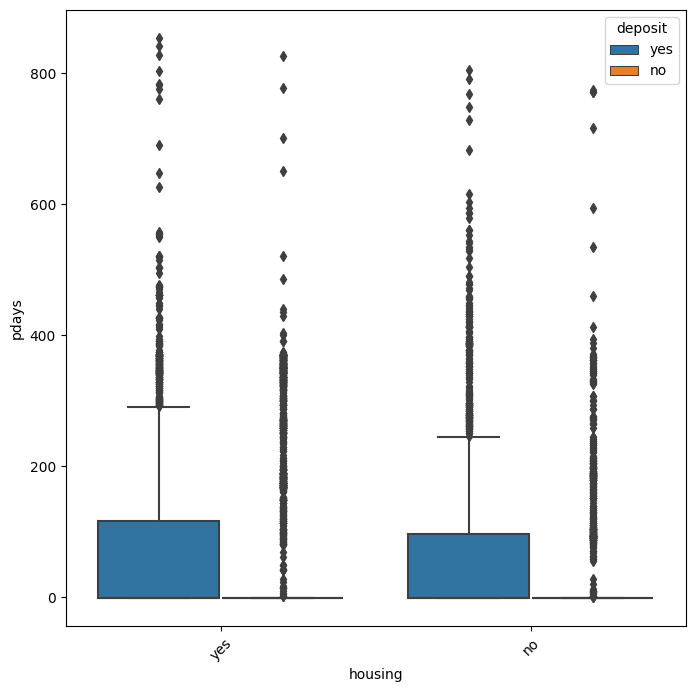

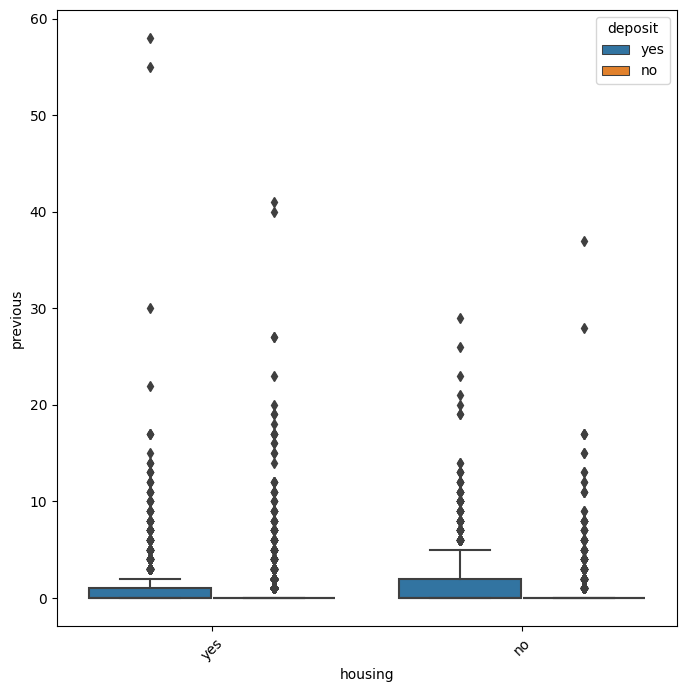

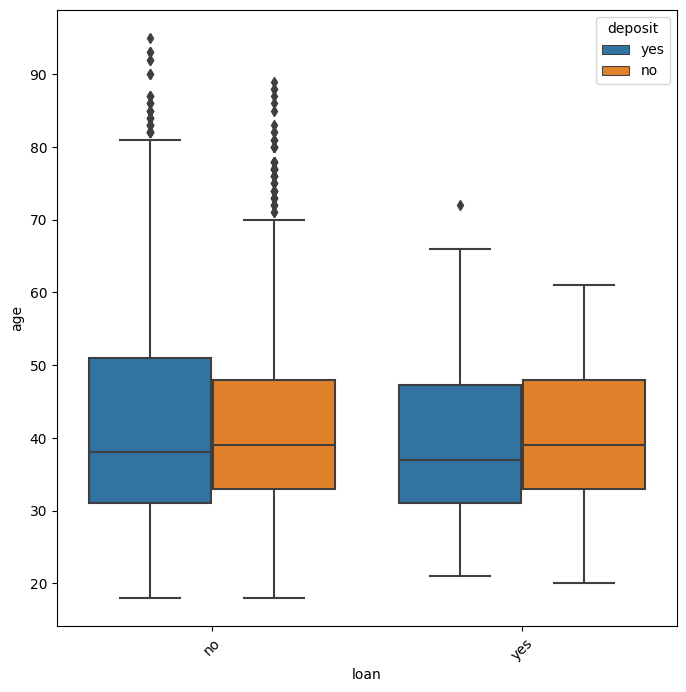

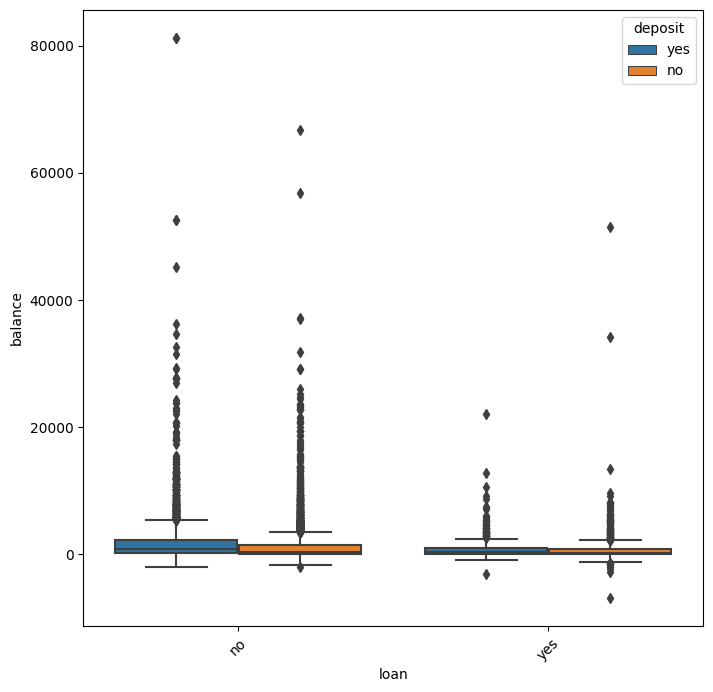

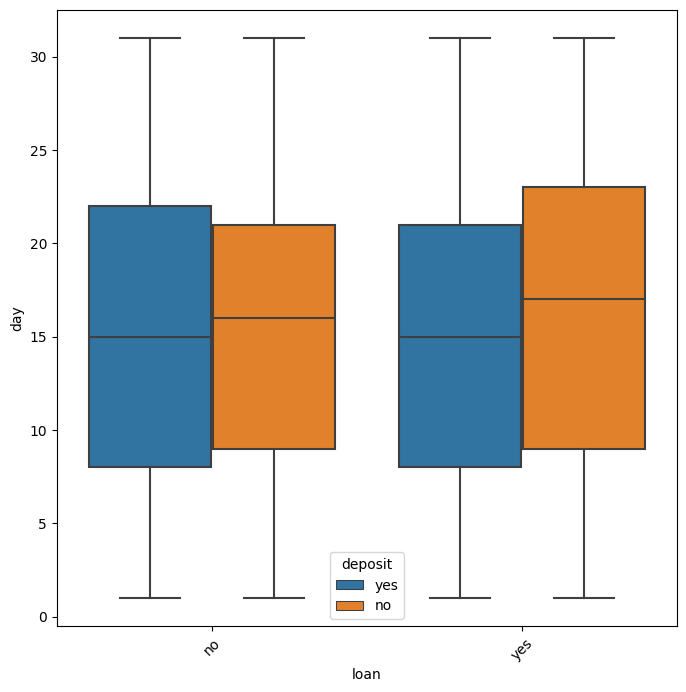

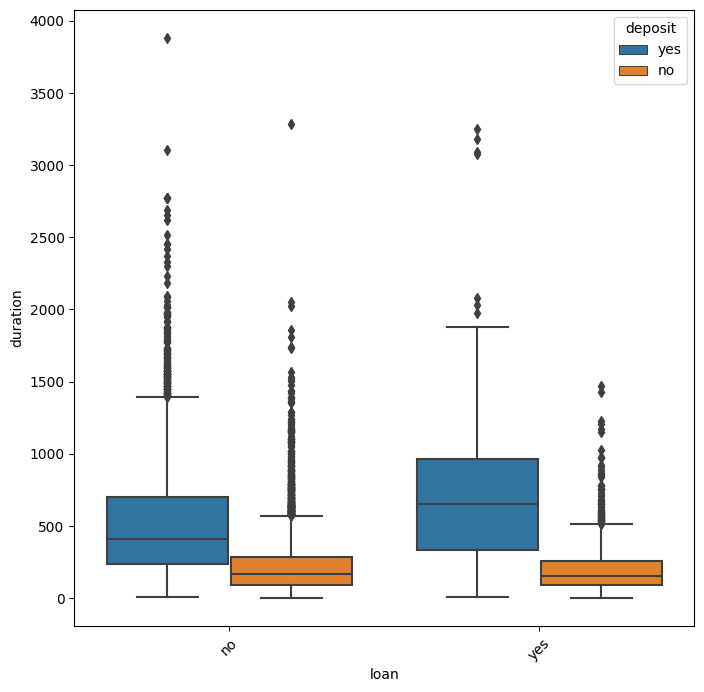

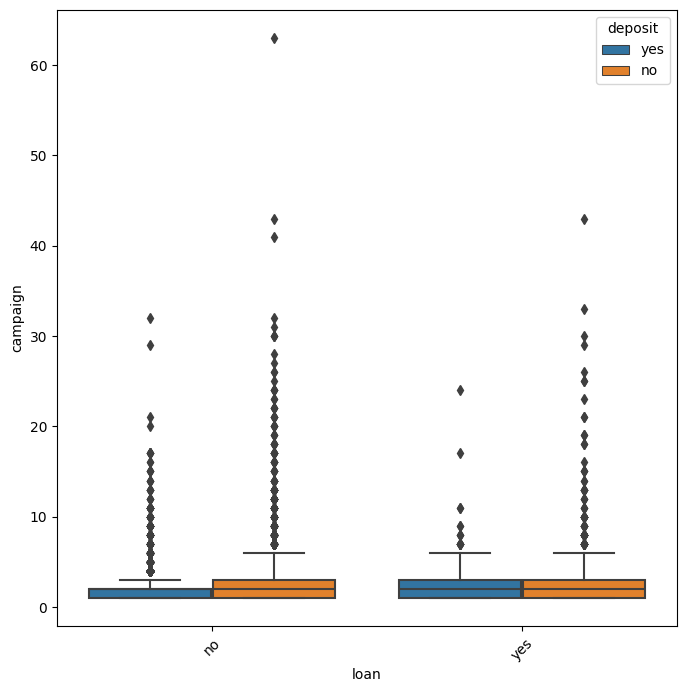

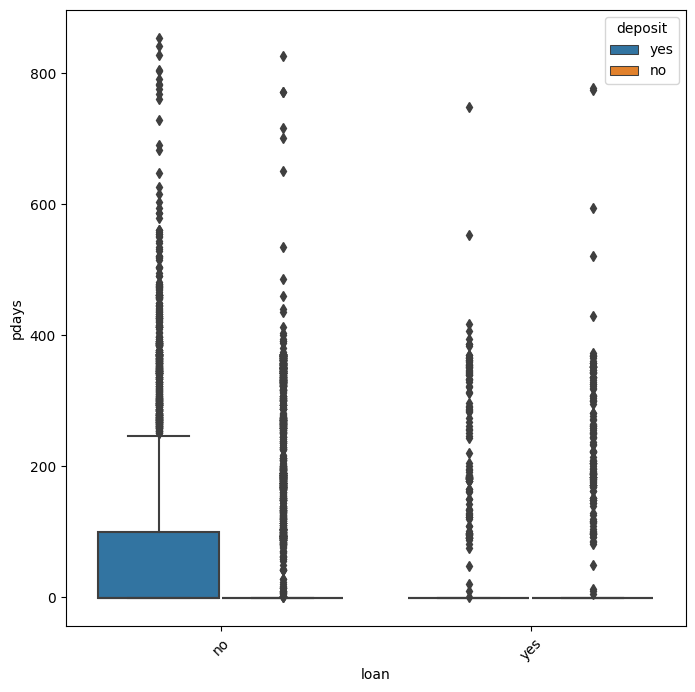

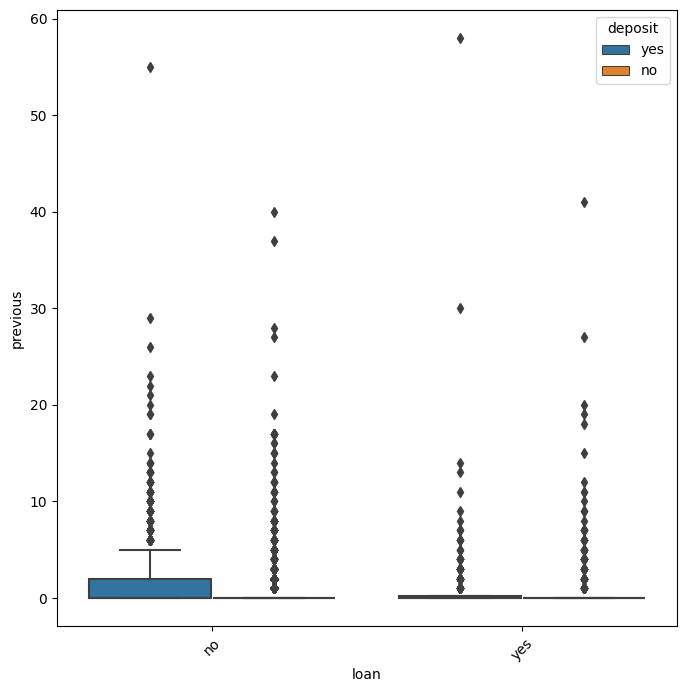

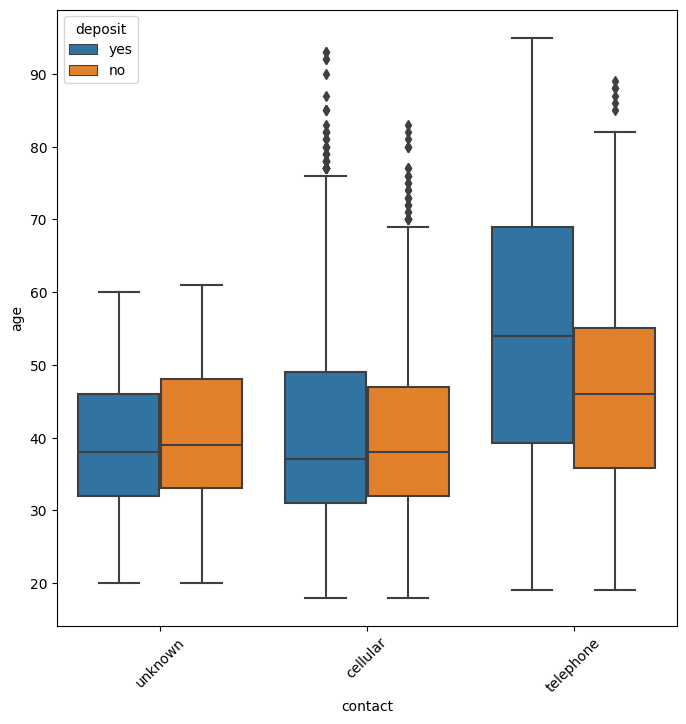

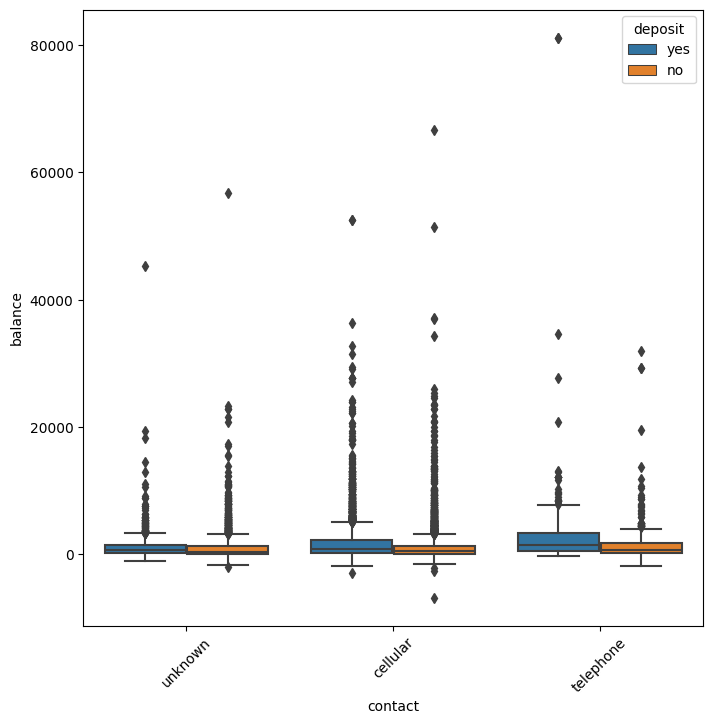

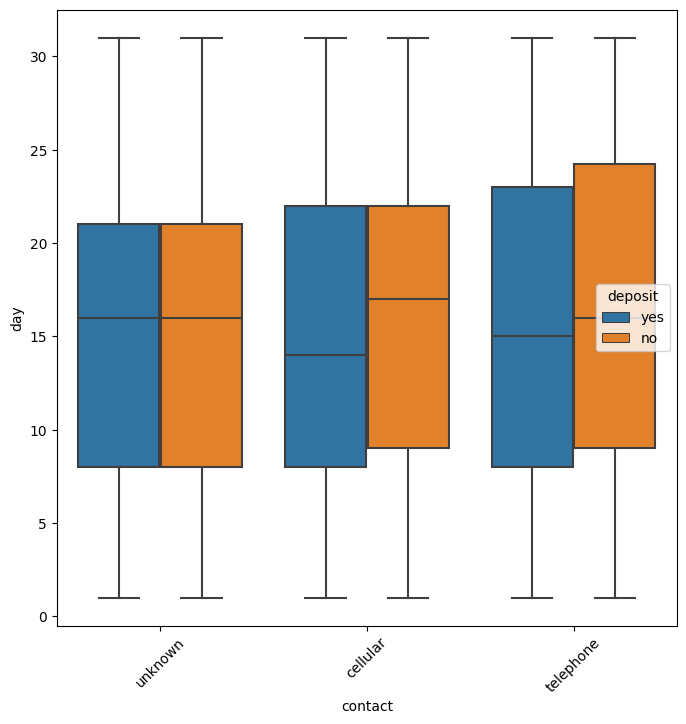

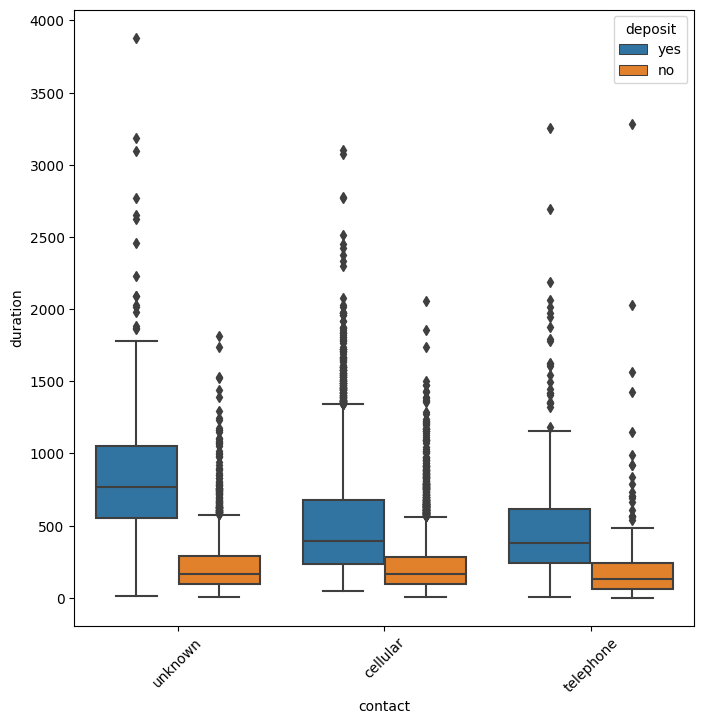

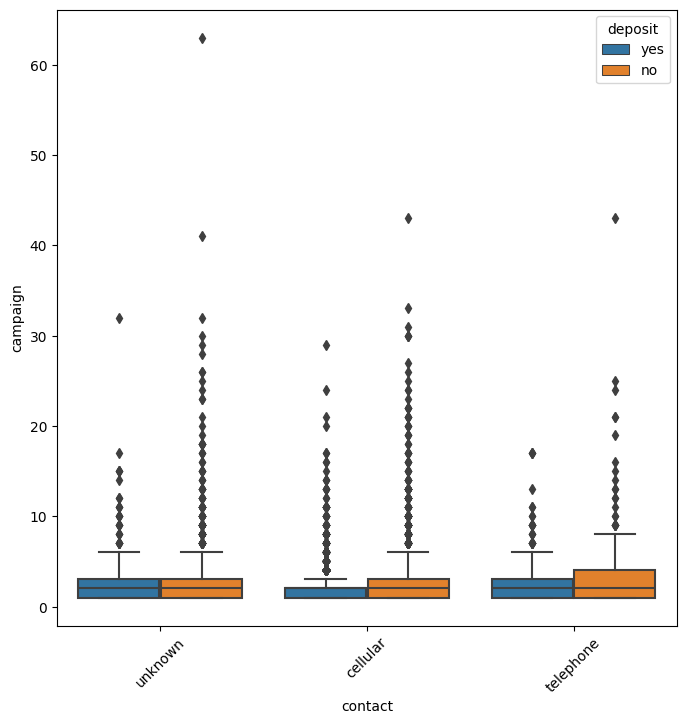

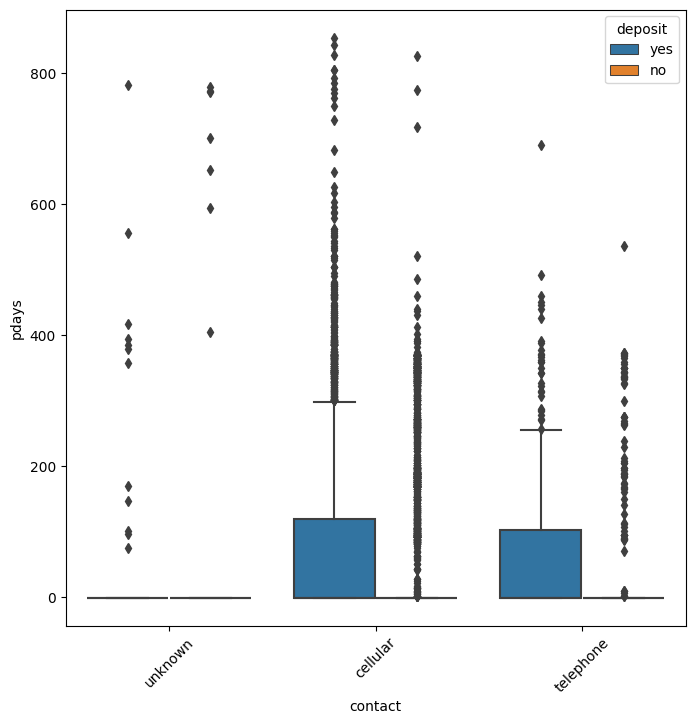

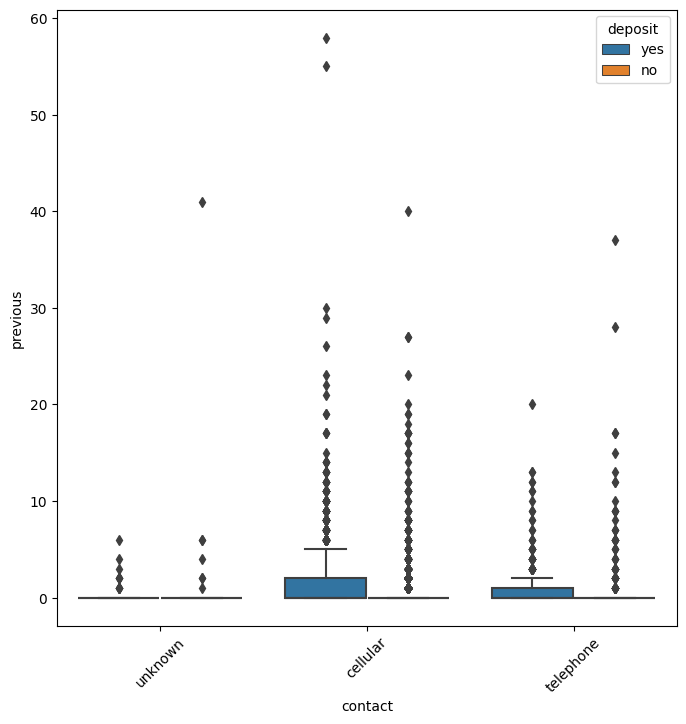

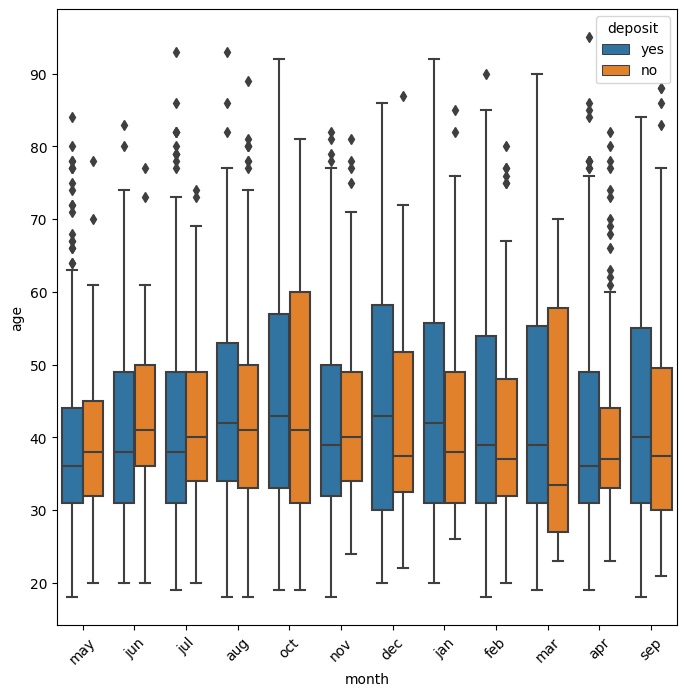

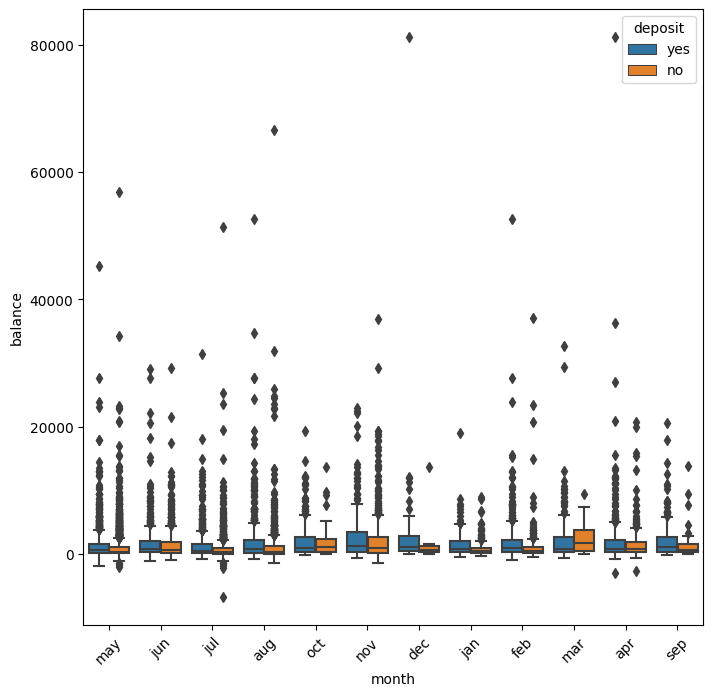

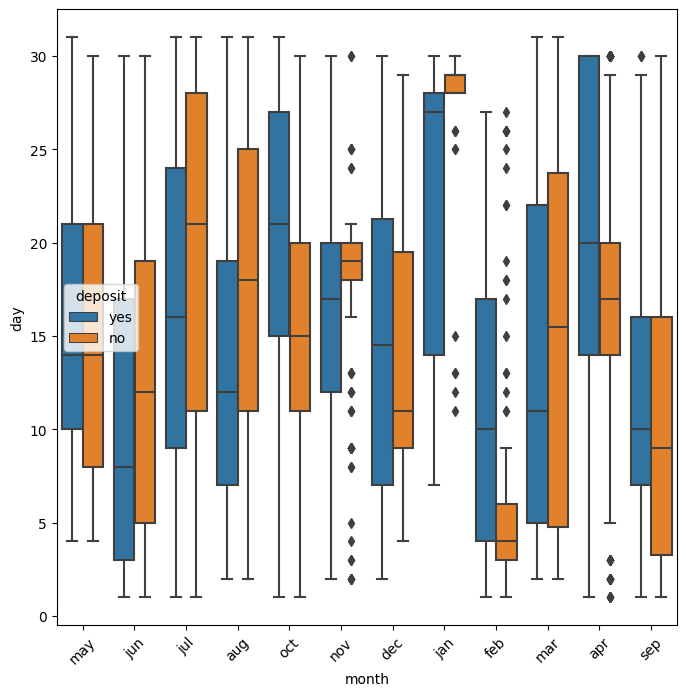

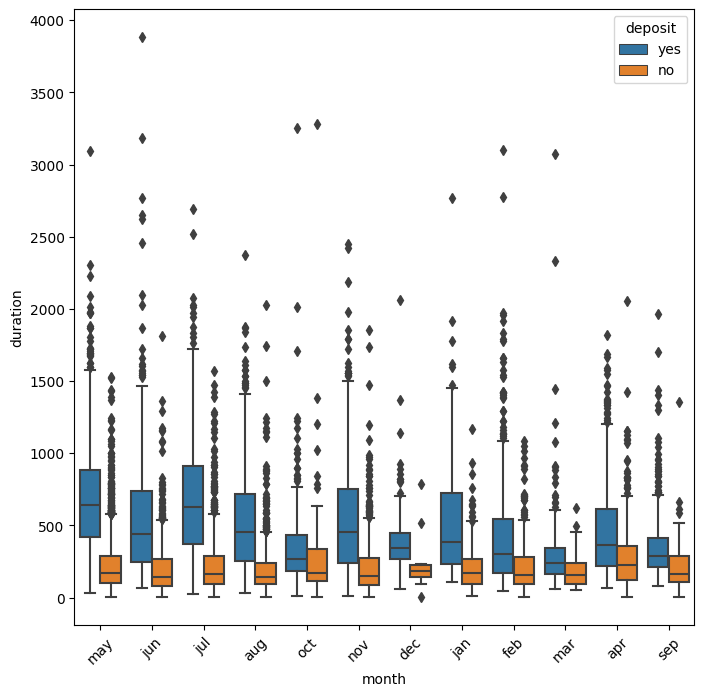

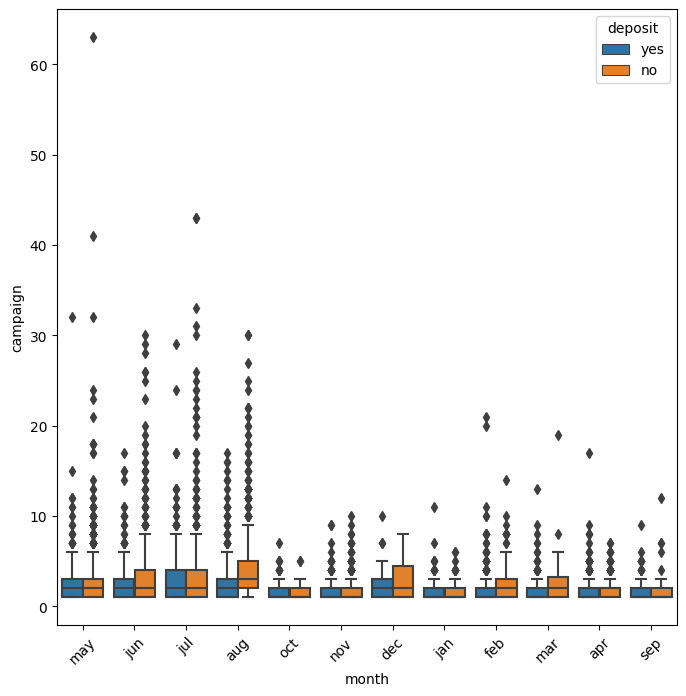

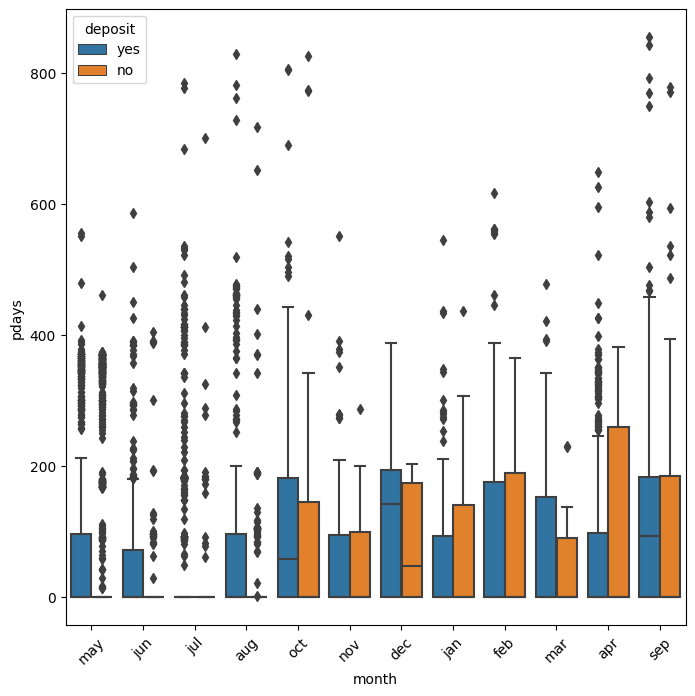

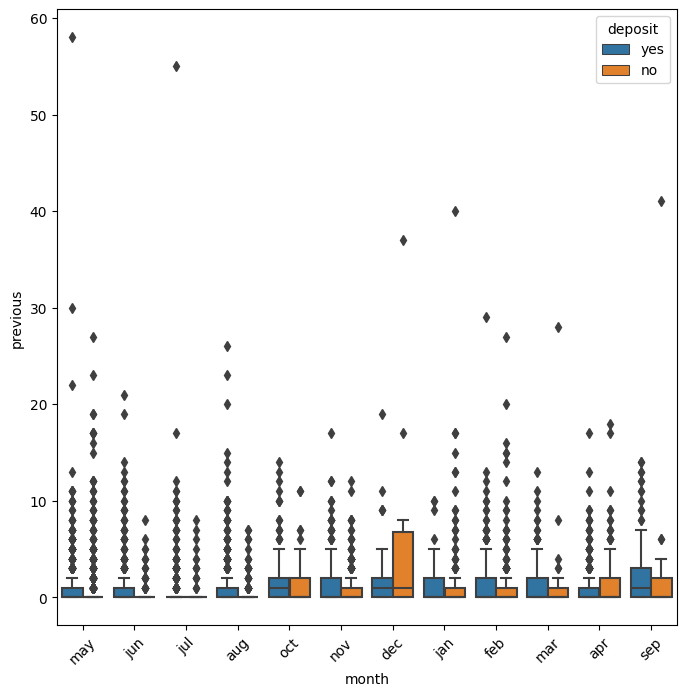

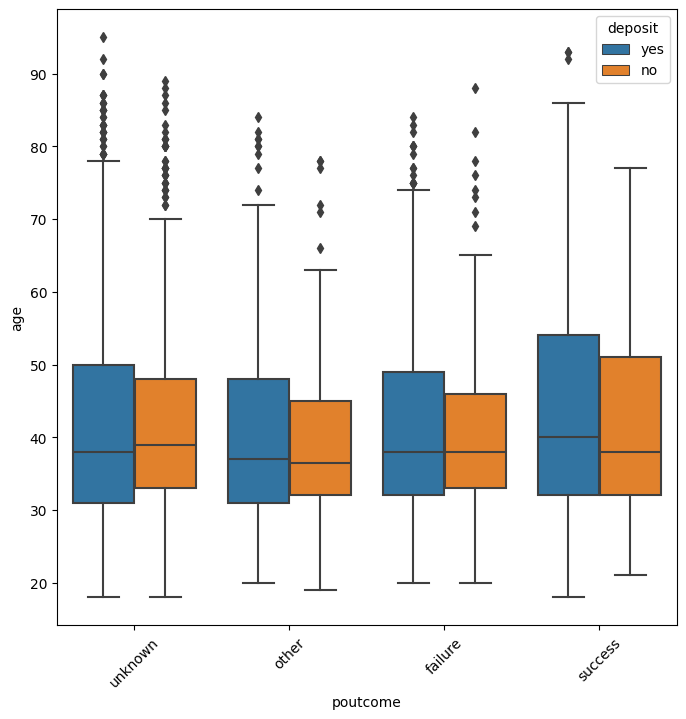

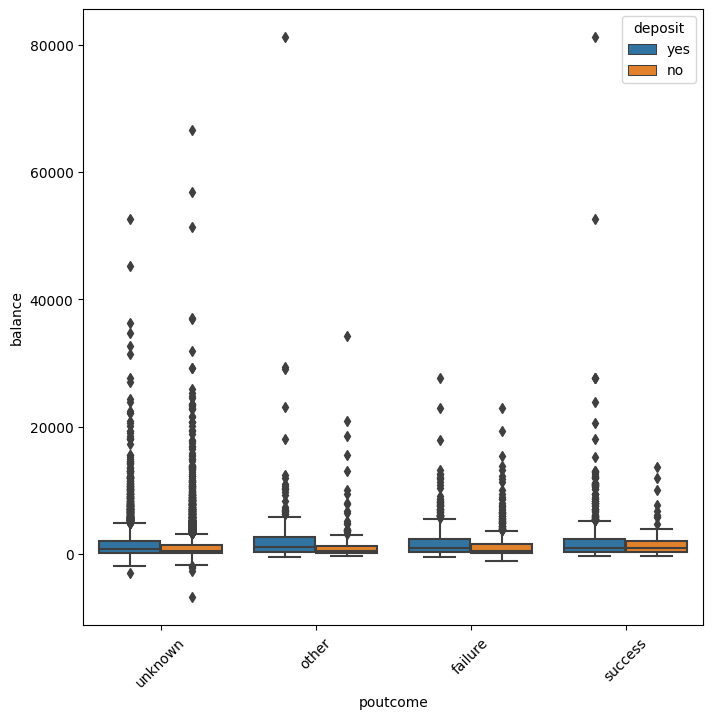

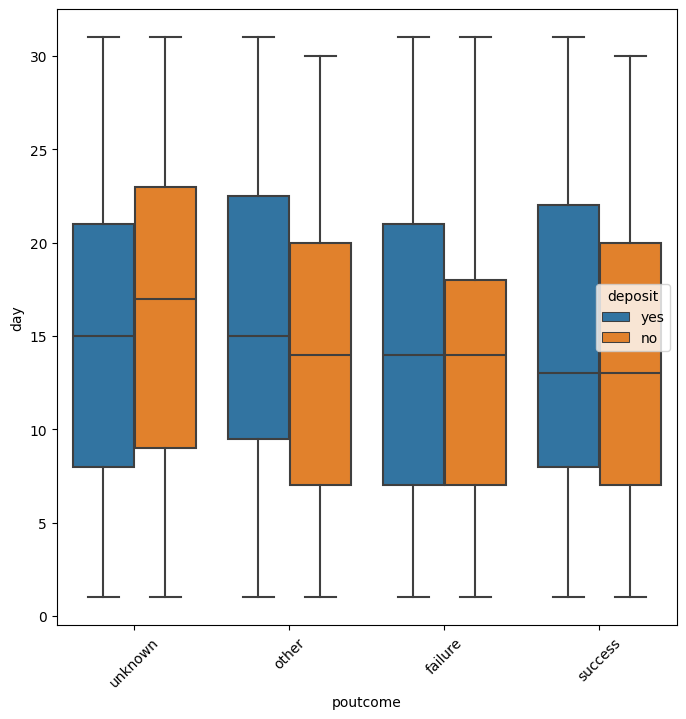

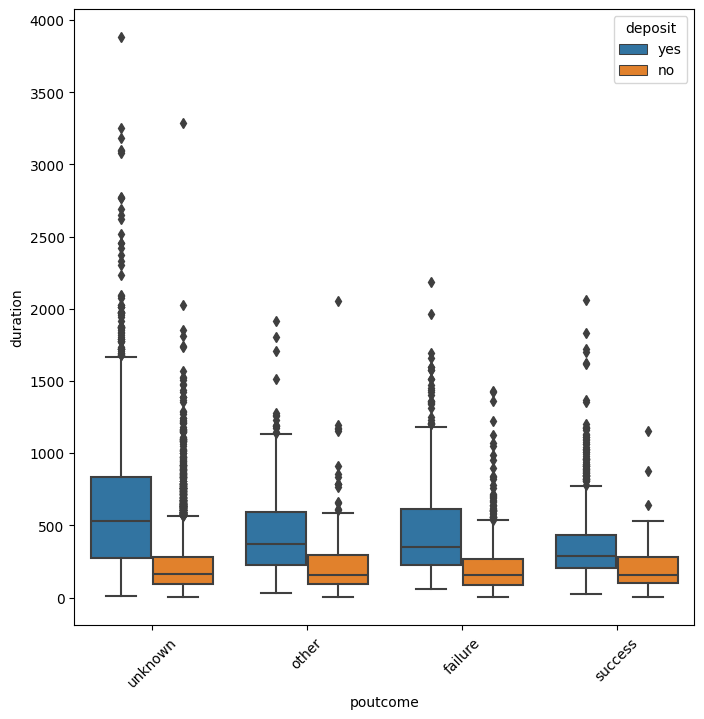

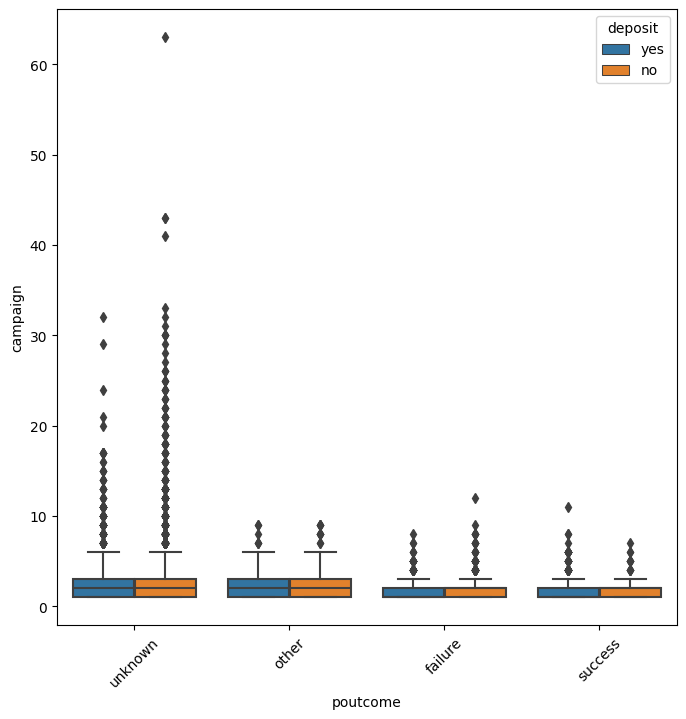

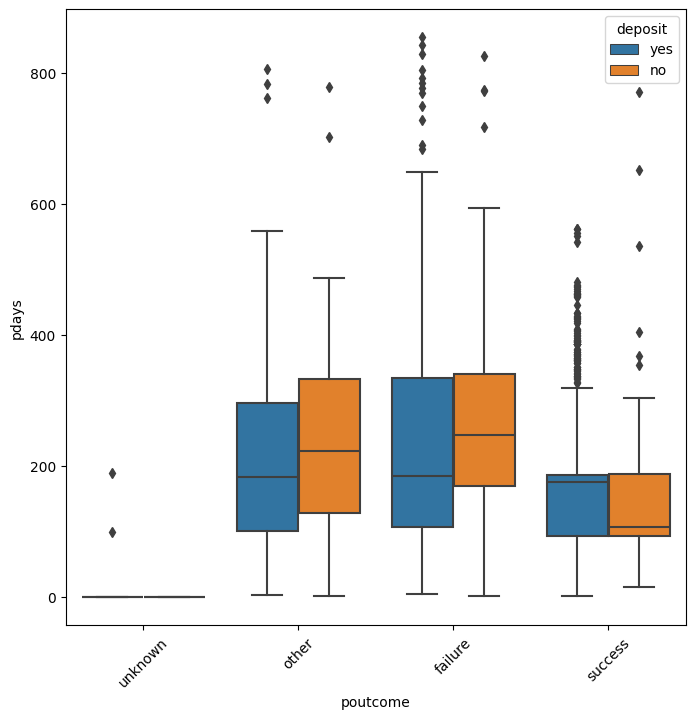

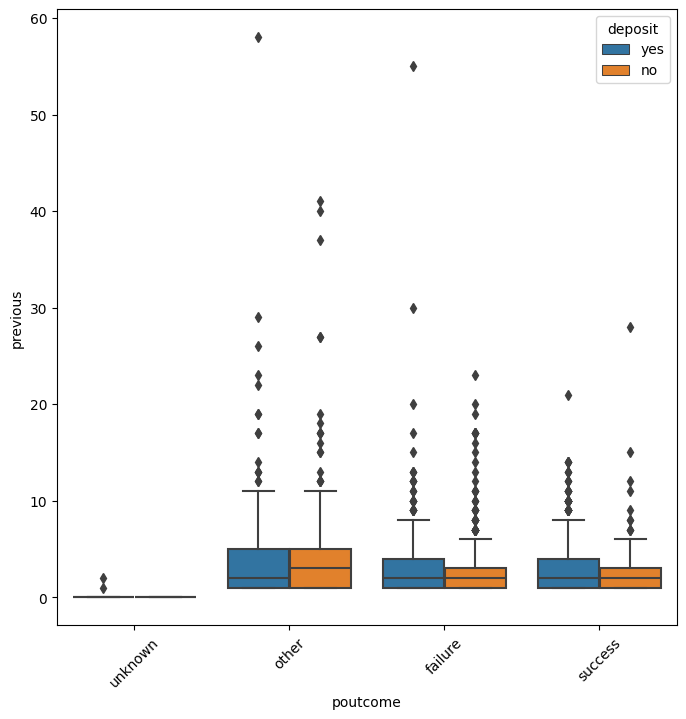

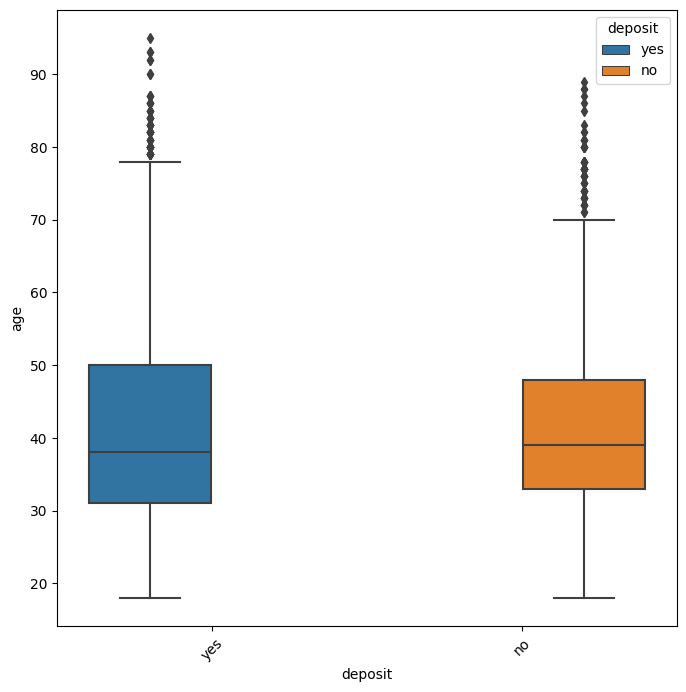

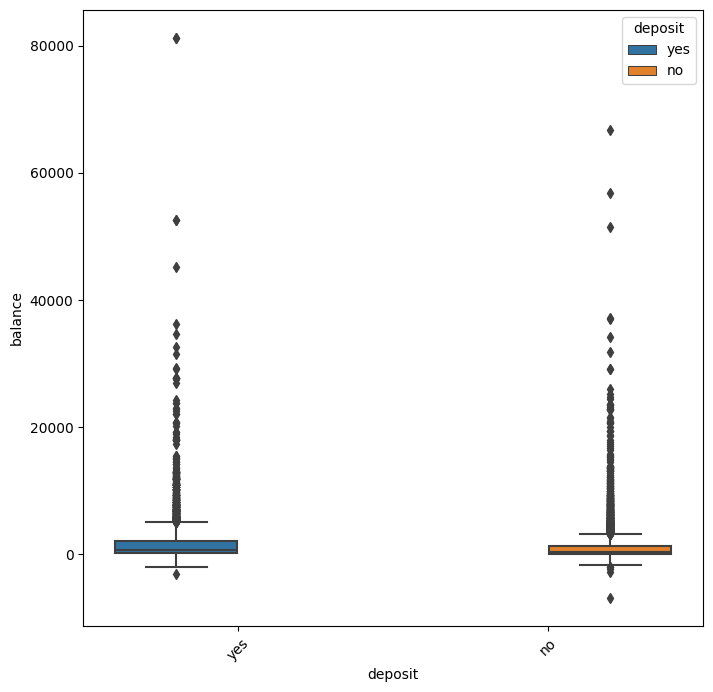

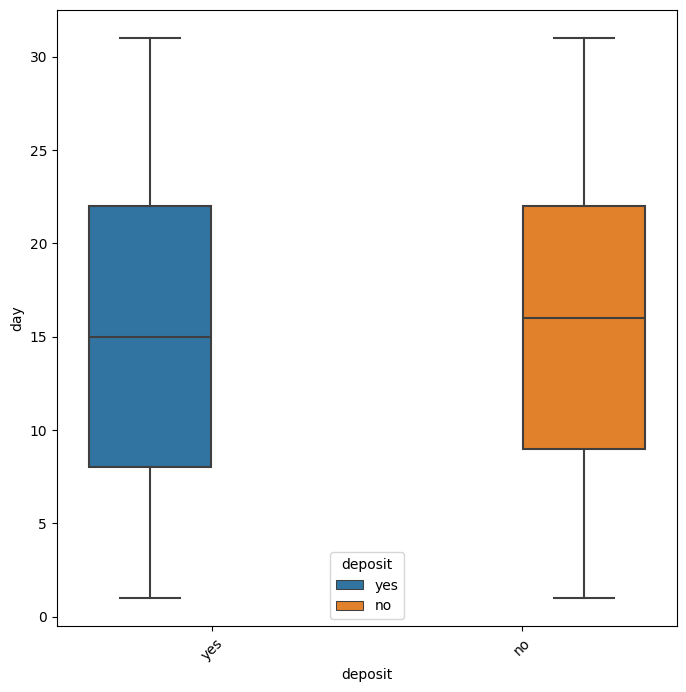

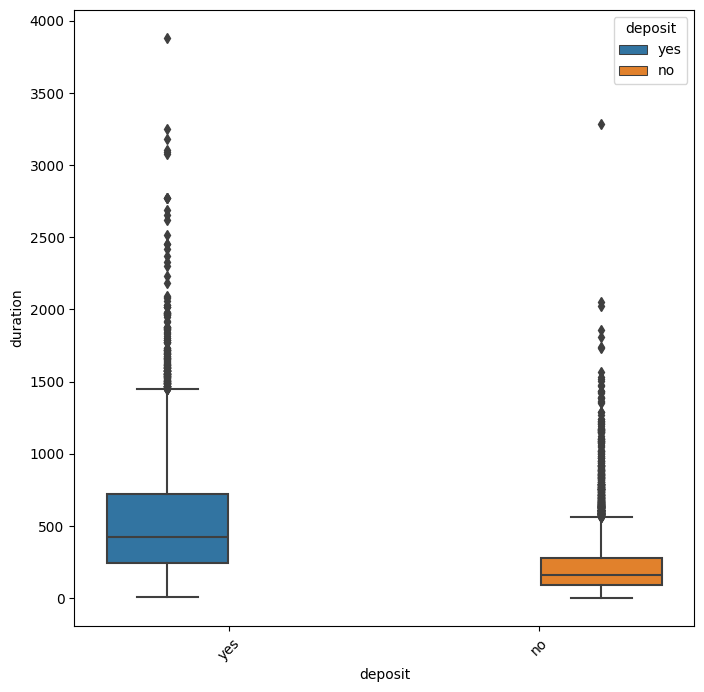

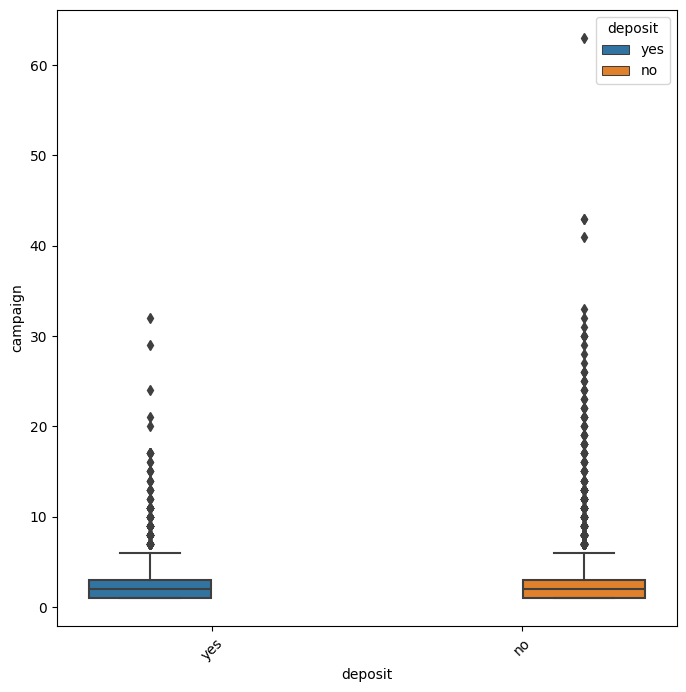

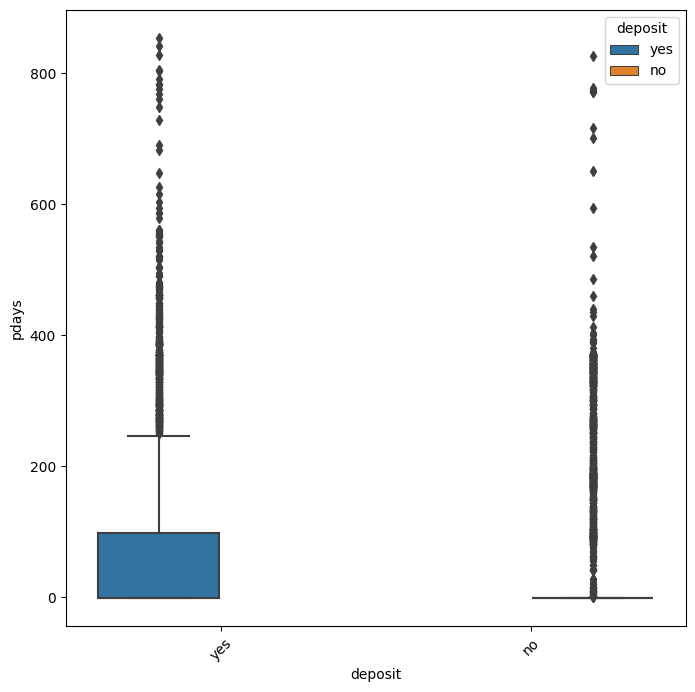

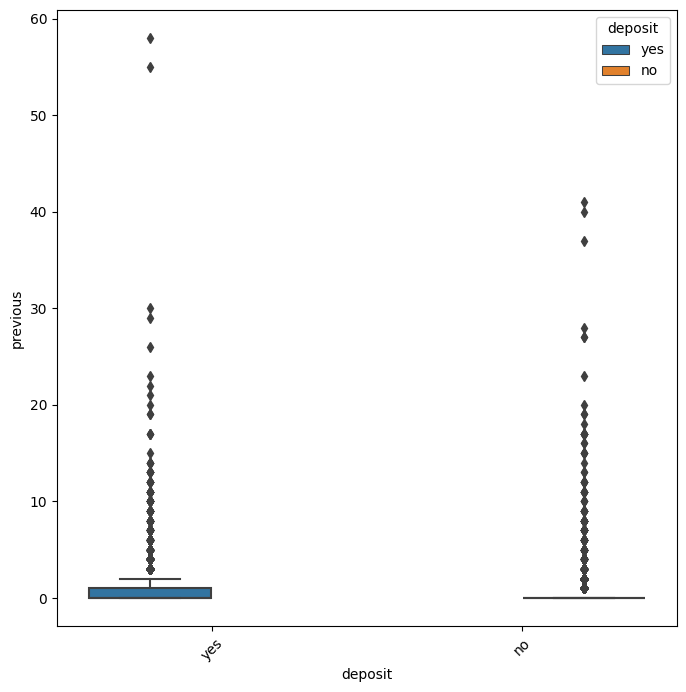

In [17]:
cat_int(data) 

In [18]:
def int_cible(dataframe) :
     contour = dataframe.select_dtypes("int").shape[1] if dataframe.select_dtypes("int").shape[1]%2==0 else dataframe.select_dtypes("int").shape[1]//2+1
     for i, col in enumerate(dataframe.select_dtypes("int")) :
          plt.figure(figsize=(9,9))
          sn.boxplot(x=dataframe["deposit"],y=dataframe[col])
      
           

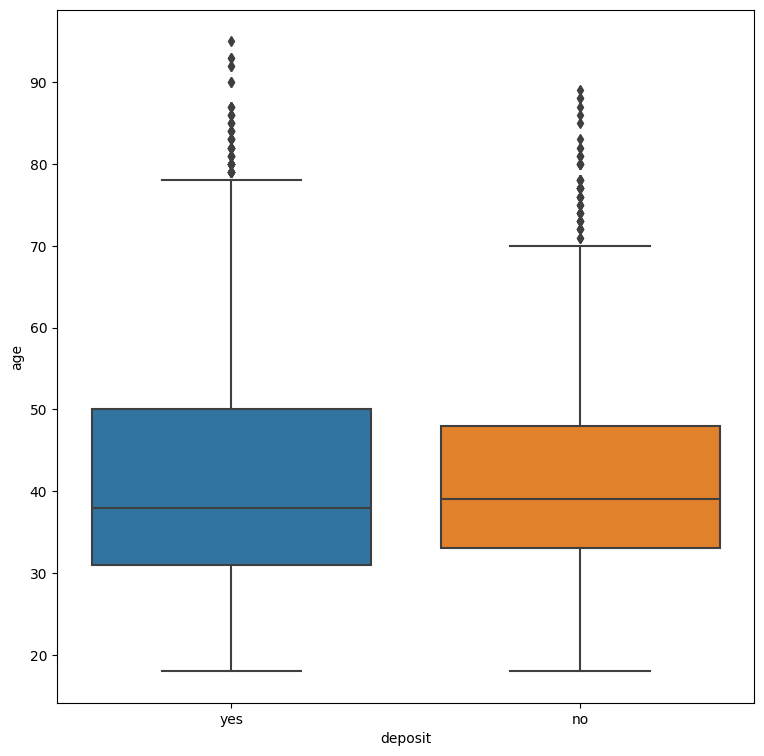

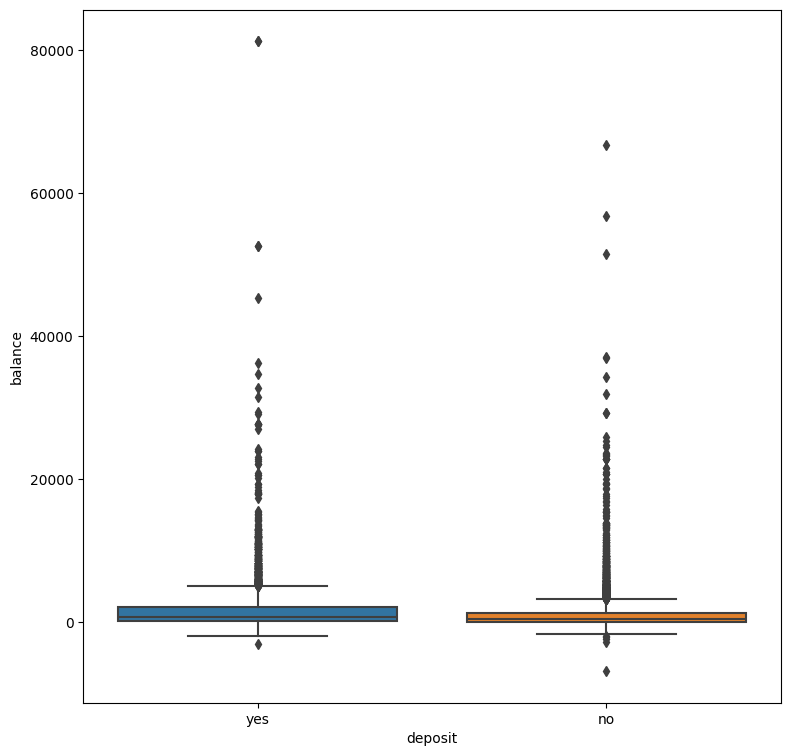

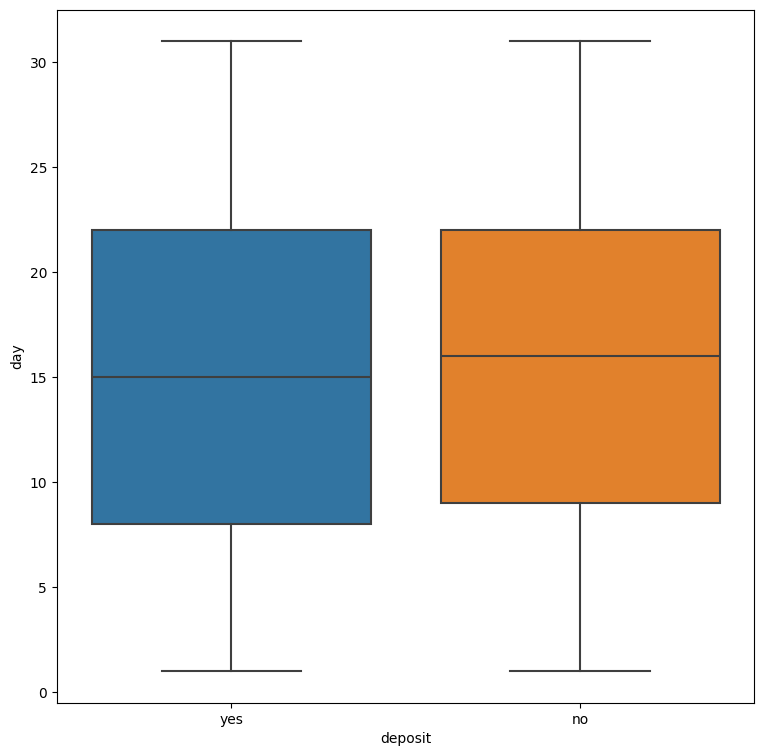

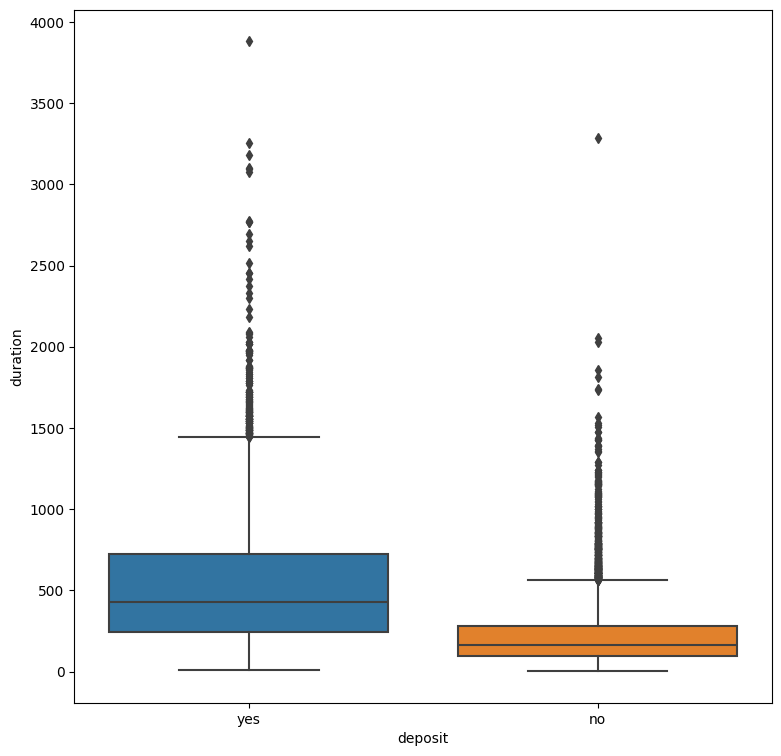

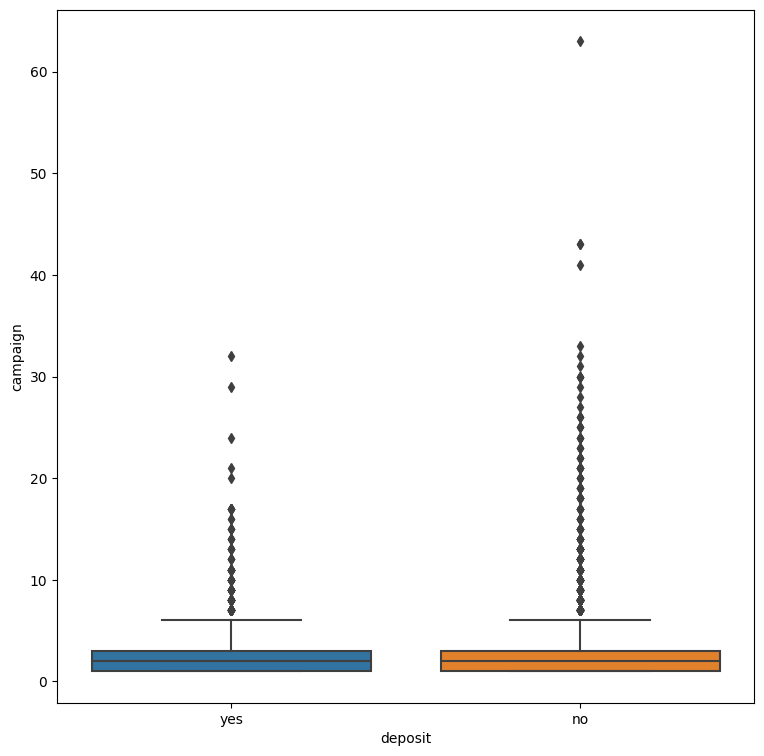

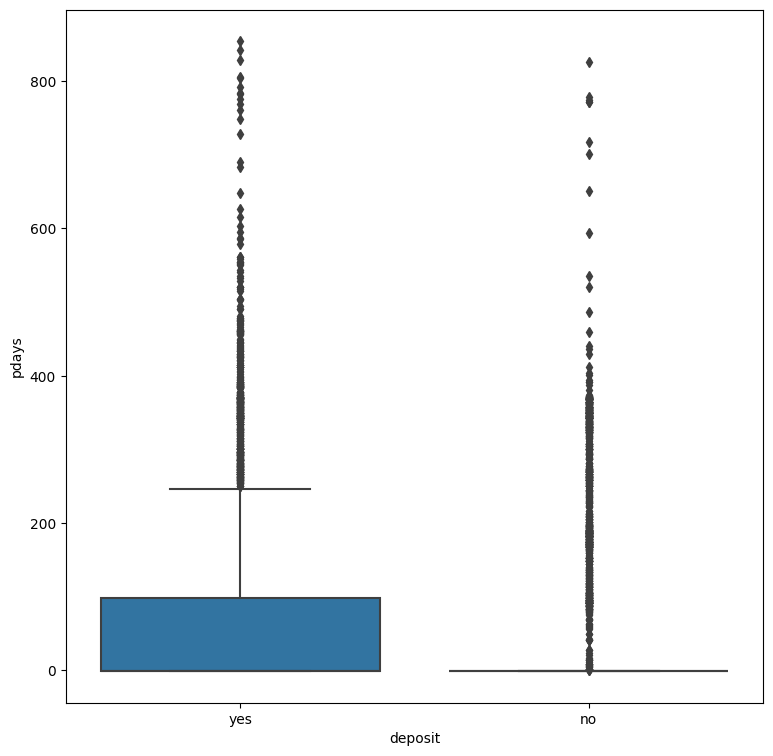

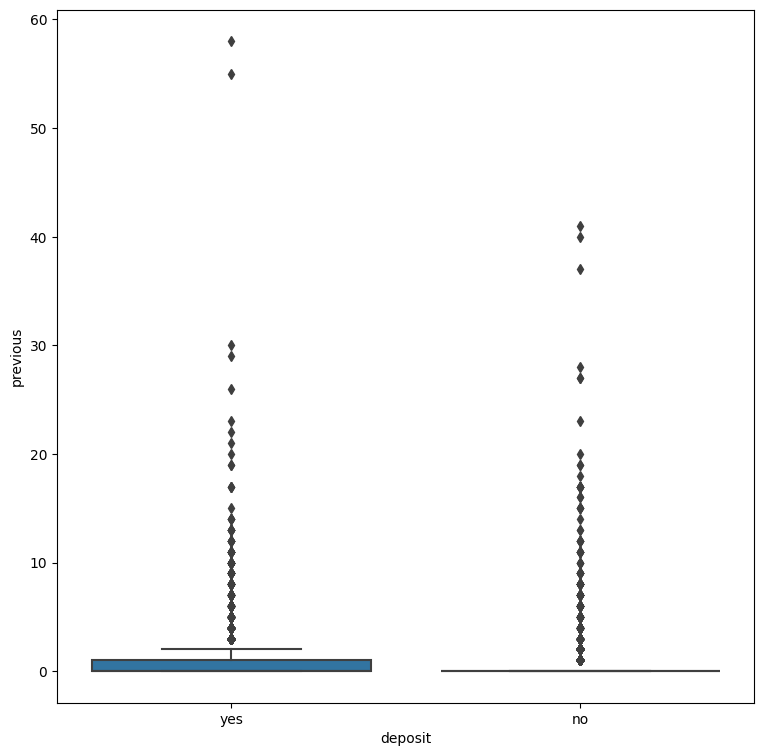

In [19]:
int_cible(data)

In [20]:
data.select_dtypes("int").corr(method="spearman").style.background_gradient()

### 3.  Pretraitement

In [21]:
from sklearn.pipeline import make_pipeline,make_union 
from sklearn.feature_selection import f_classif,chi2,mutual_info_classif,SelectKBest,RFECV,VarianceThreshold 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,power_transform,RobustScaler
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.model_selection import train_test_split,learning_curve,LearningCurveDisplay


In [22]:
colint= data.select_dtypes(exclude="object").columns.tolist()

In [33]:
def codage(dataframe) :
    for col in dataframe.select_dtypes("object") :
        dataframe[col] = dataframe[col].astype("category").cat.codes
    x= dataframe.copy()
    y=x.pop("deposit")

    return x,y
  

In [34]:
df =data.copy()
def repartition() :
    x,y =codage(df)
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)
    return x_train,x_test,y_train,y_test

In [35]:
def selection() :
    variance= VarianceThreshold(0.05)
    x_train,x_test,y_train,y_test=repartition()
    x_train=variance.fit_transform(x_train)
    x_test=variance.fit_transform(x_test)
    return x_train,x_test

 


In [36]:
def info() :
    x_train,x_test,y_train,y_test=repartition() 
    print(f"le shape de doonnees train:{x_train.shape}")
    print(f"le shape de doonnees test:{x_test.shape}")
    print(f"le shape de doonnees cible test:{y_test.shape}")
    print(f"le shape de doonnees cible train:{x_test.shape}")
info()



le shape de doonnees train:(8929, 16)
le shape de doonnees test:(2233, 16)
le shape de doonnees cible test:(2233,)
le shape de doonnees cible train:(2233, 16)


In [37]:
x_train,x_test,y_train,y_test=repartition()

### 4.  evaluation du model

In [41]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,StackingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [42]:
def evaluation(ba) :
    model= ba.fit(x_train,y_train)
    print(f"accuracy sur les données d'entrainement {model.score(x_train,y_train)}")
    ypred= model.predict(x_test)
    print(classification_report(y_test,ypred))
    cm=confusion_matrix(y_test,ypred,labels=model.classes_)
    dist=ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    dist.plot()
    N,train,val=learning_curve(model,x_train,y_train,train_sizes=pn.linspace(0.1,1.0,10),cv=5,scoring='f1')
    plt.figure(figsize=(10,10))
    plt.plot(N,train.mean(axis=1),label="train")
    plt.plot(N,val.mean(axis=1),label="validation")
    plt.legend()

In [45]:
arbre =DecisionTreeClassifier()
foret=RandomForestClassifier()
xbg=XGBClassifier()
grad= GradientBoostingClassifier()
logi=LogisticRegression()
knn=KNeighborsClassifier()


In [47]:
models={"arbre":arbre,"foret":foret,"xgb":xbg,"grad":grad,"logi":logi,"knn":knn}

arbre
accuracy sur les données d'entrainement 1.0
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1175
           1       0.77      0.76      0.77      1058

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233

foret
accuracy sur les données d'entrainement 1.0
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1175
           1       0.82      0.86      0.84      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.84      2233
weighted avg       0.85      0.85      0.85      2233

xgb
accuracy sur les données d'entrainement 0.9618098331280098
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1175
           1       0.83      0.86      0.85      1058

    accuracy       

c:\Users\laurediekabala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\laurediekabala\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

knn
accuracy sur les données d'entrainement 0.8143129129801769
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1175
           1       0.75      0.72      0.73      1058

    accuracy                           0.75      2233
   macro avg       0.75      0.75      0.75      2233
weighted avg       0.75      0.75      0.75      2233



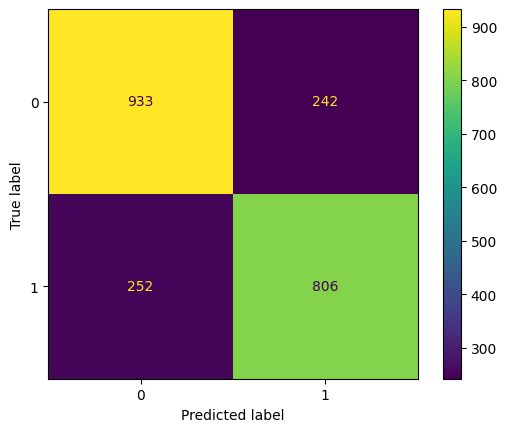

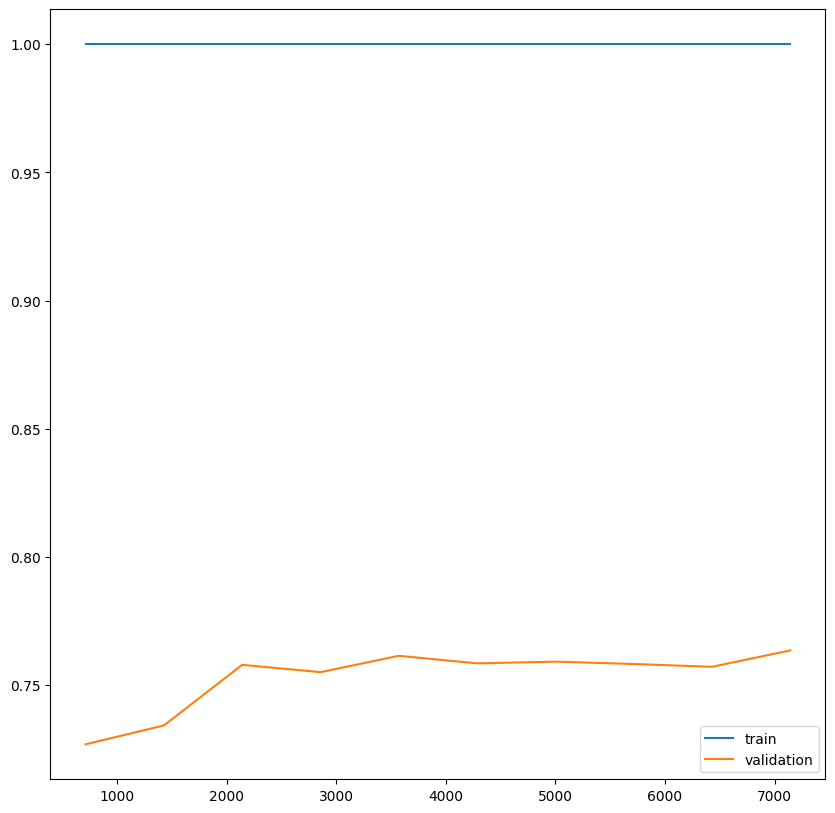

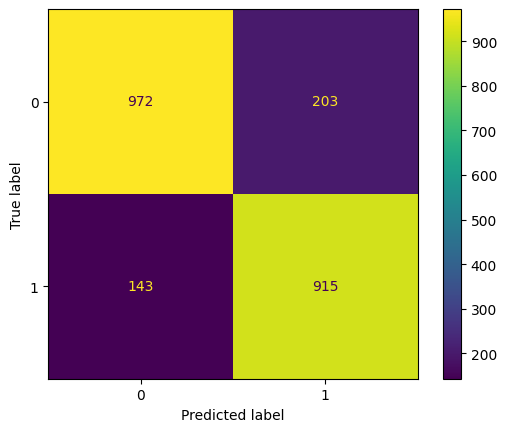

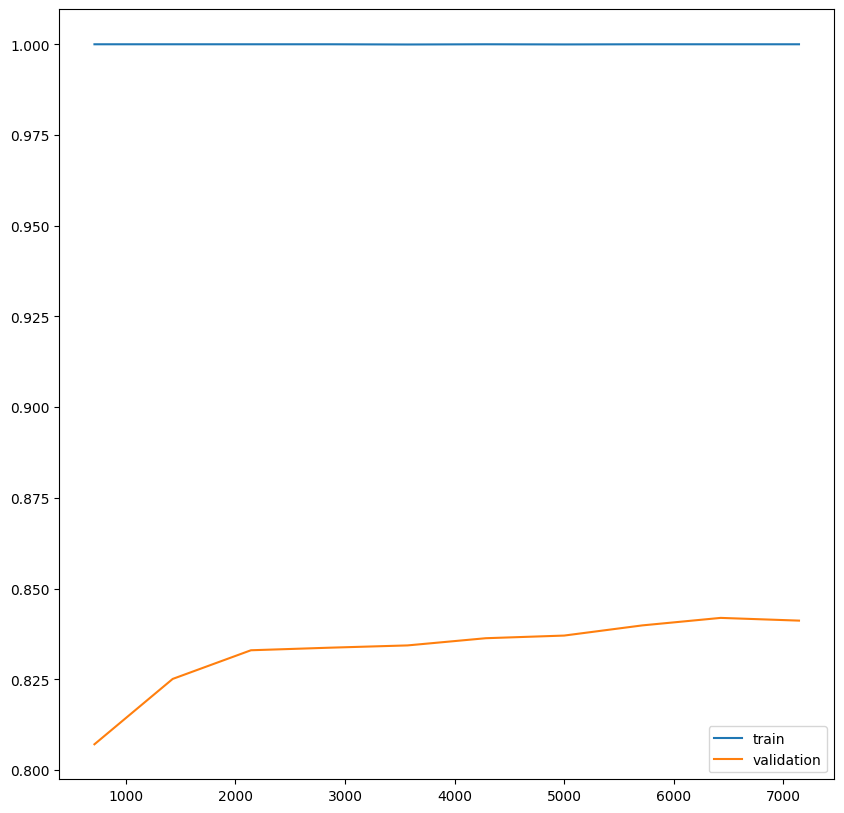

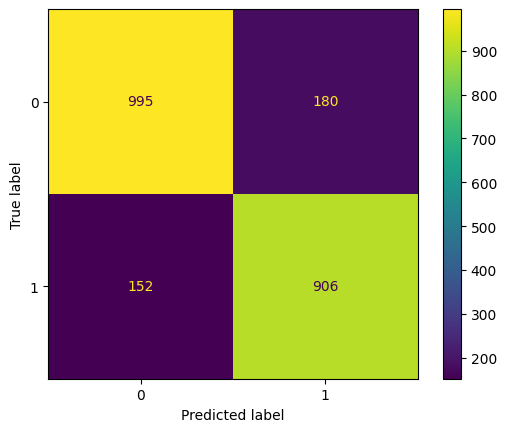

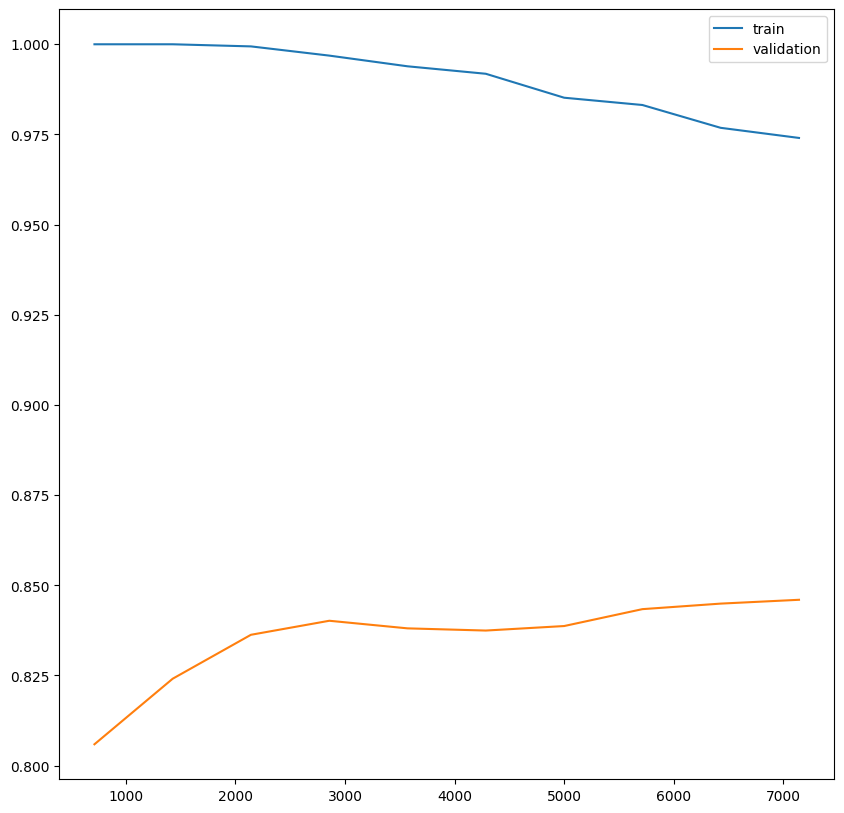

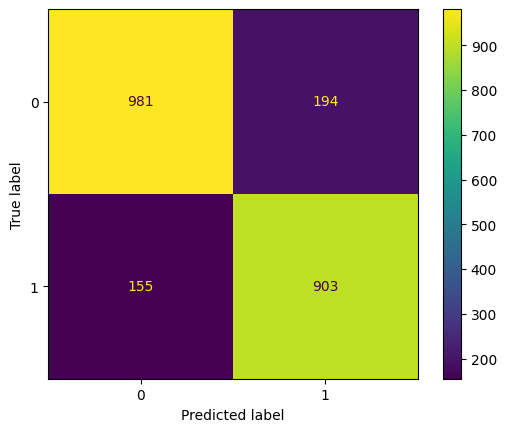

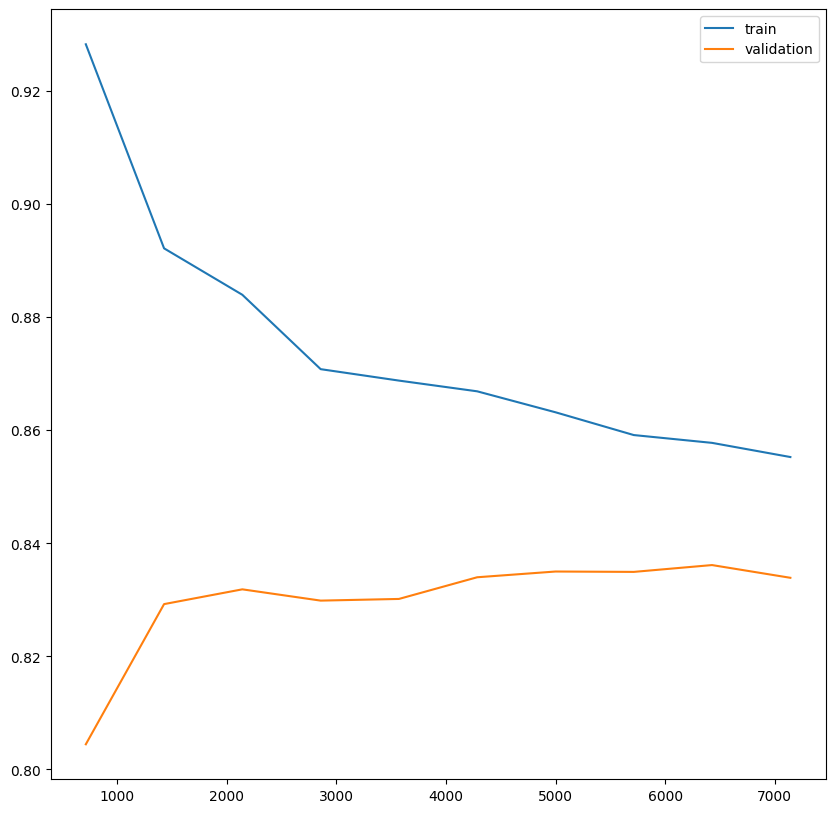

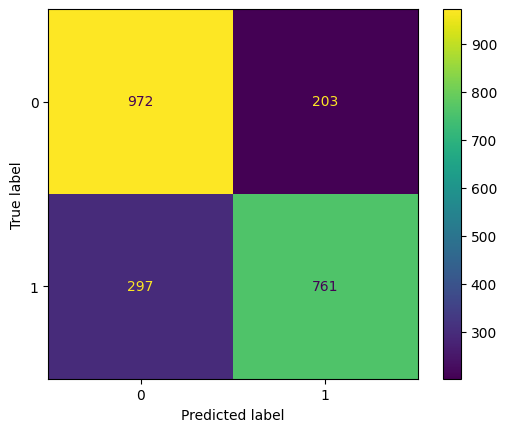

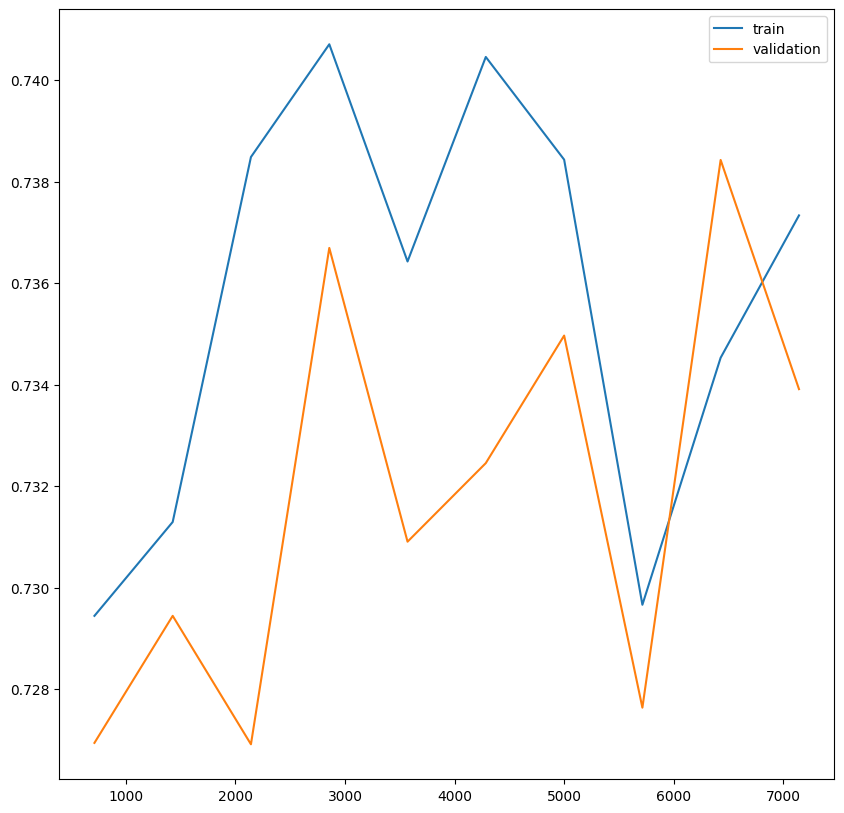

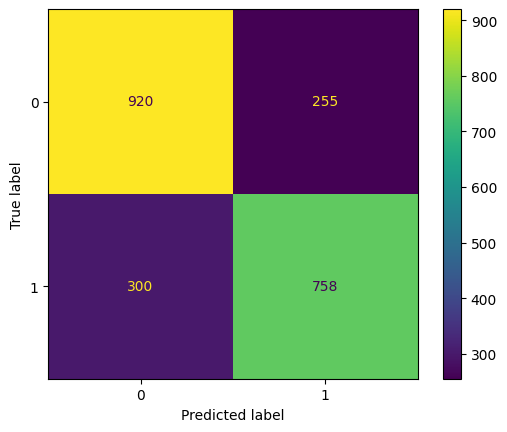

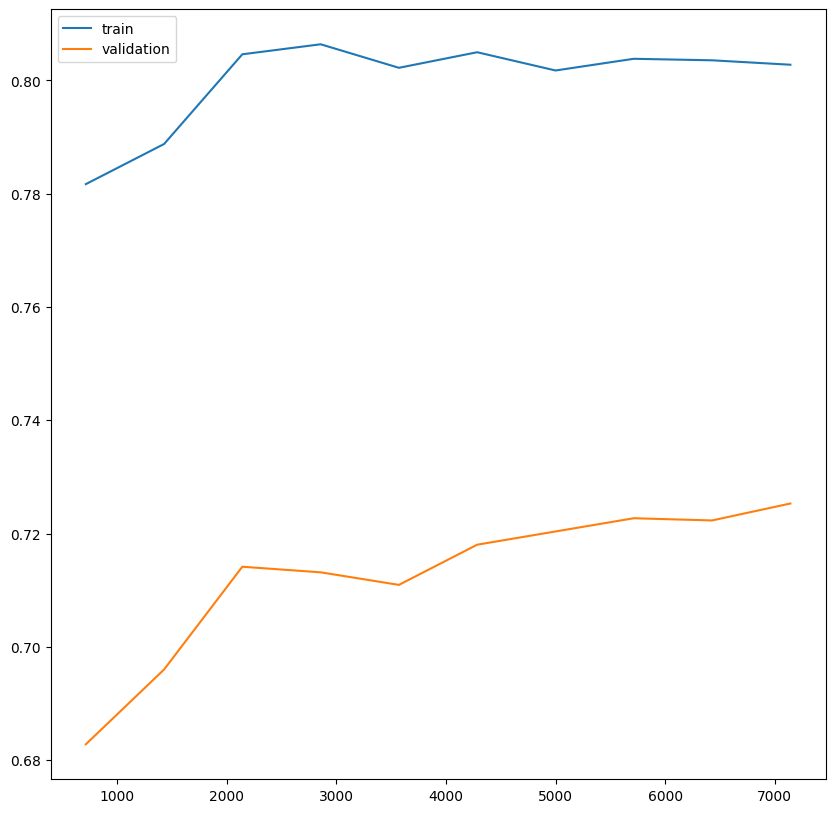

In [49]:
for name,model in models.items():
    print(name)
    evaluation(model)

accuracy sur les données d'entrainement 1.0
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1175
           1       0.78      0.76      0.77      1058

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



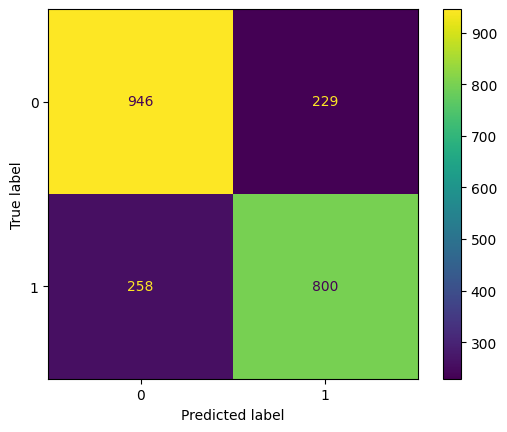

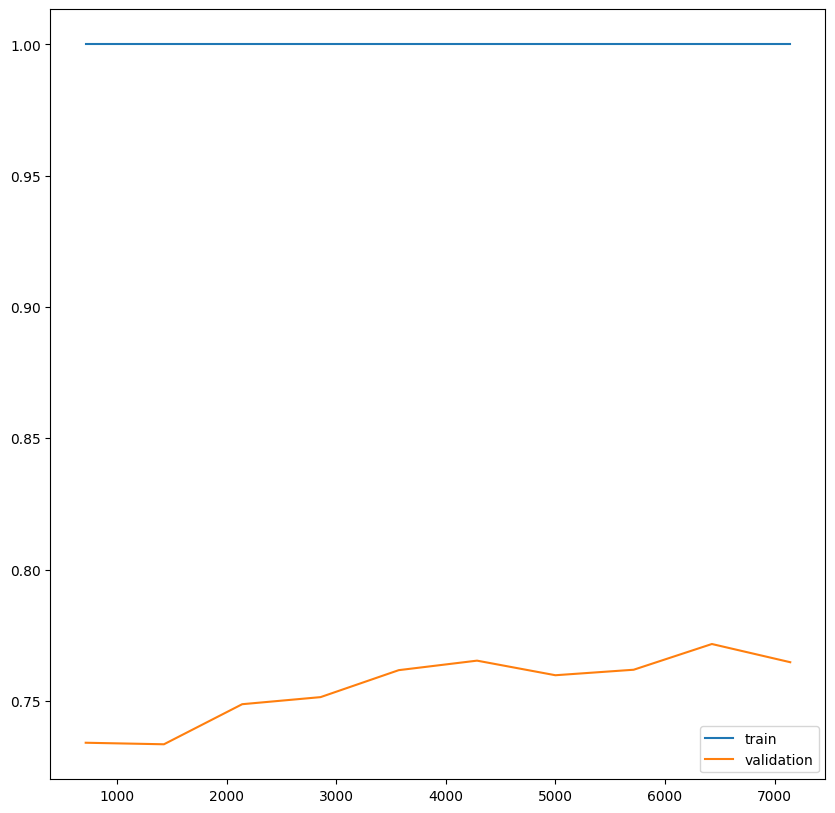

In [31]:
evaluation(arbre)

<Axes: >

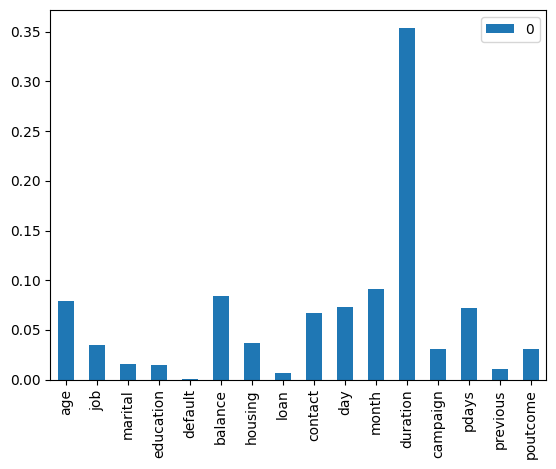

In [32]:
pd.DataFrame(arbre.feature_importances_,index=x_train.columns).plot.bar()